In [ ]:
import pandas as pd
import os
from glob import glob
from natsort import natsorted
# import geopandas as gpd
from tqdm import tqdm
from scipy import signal
from scipy.signal import find_peaks
import numpy as np

In [2]:
school_enroll_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\highschool_school_placekey.csv"

school_enroll_df = pd.read_csv(school_enroll_fname).set_index('Placekey').fillna(0)
# school_placekeys = school_key_df['Placekey'].to_list()
school_enroll_df['total_middle_students'] = school_enroll_df['Students_6'] + school_enroll_df['Students_7'] + school_enroll_df['Students_8']
school_enroll_df['total_high_students'] = school_enroll_df['Students_9'] + school_enroll_df['Students_10'] + school_enroll_df['Students_11'] + school_enroll_df['Students_12']
school_enroll_df['total_teachers'] = school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']
school_enroll_df['total_phone'] =  school_enroll_df['Students_11'] + school_enroll_df['Students_12']  + school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']
school_enroll_df['total_people'] =  school_enroll_df['total_middle_students'] + school_enroll_df['total_high_students']  + school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']


# high_school_enroll_df = school_enroll_df.query("total_phone > 200 ").query("total_middle_students < 50 ")
high_school_enroll_df = school_enroll_df.query("total_phone > 0 ")#.query("total_middle_students < 50 ")

print("Loaded school placekeys:", len(school_enroll_df))
print("filtered high schools:", len(high_school_enroll_df))
school_enroll_df

C:\tmp\ipykernel_36488\822072639.py:3: DtypeWarning: Columns (2,13,29,32,33,75,76,77,87,88,89,90,91,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  school_enroll_df = pd.read_csv(school_enroll_fname).set_index('Placekey').fillna(0)


Loaded school placekeys: 31531
filtered high schools: 31531


Nces_Id          School_Level  \
Placekey                                                  
zzw-222@8gm-ms3-pn5  1.000050e+10             Secondary   
222-222@8gm-mzc-rkz  1.000060e+10  Combined or Ungraded   
zzy-223@8gm-n94-8jv  1.000060e+10             Secondary   
222-224@8gm-nwk-gkz  1.000060e+10             Secondary   
zzw-222@8gm-p3m-z9f  1.000060e+10  Combined or Ungraded   
...                           ...                   ...   
zzw-222@5z8-f95-3qz  0.000000e+00  Combined or Ungraded   
223-223@8t2-fkh-fj9  0.000000e+00  Combined or Ungraded   
223-223@5py-nkk-hnq  0.000000e+00  Combined or Ungraded   
222-224@5qv-x75-7wk  0.000000e+00  Combined or Ungraded   
zzw-222@8fc-fhq-wkz  0.000000e+00  Combined or Ungraded   

                                      School_District  \
Placekey                                                
zzw-222@8gm-ms3-pn5  Albertville City School District   
222-222@8gm-mzc-rkz   Marshall County School District   
zzy-223@8gm-n94-8jv   Marshall County School District   
222-224@8gm-nwk-gkz   Marshall County School District   
zzw-222@8gm-p3m-z9f   Marshall County School District   
...                                               ...   
zzw-222@5z8-f95-3qz                                 0   
223-223@8t2-fkh-fj9                                 0   
223-223@5py-nkk-hnq                                 0   
222-224@5qv-x75-7wk                                 0   
zzw-222@8fc-fhq-wkz                                 0   

                                                    School_Name  \
Placekey                                                          
zzw-222@8gm-ms3-pn5                     Albertville High School   
222-222@8gm-mzc-rkz                          Asbury High School   
zzy-223@8gm-n94-8jv                         Douglas High School   
222-224@8gm-nwk-gkz                Kate D Smith Dar High School   
zzw-222@8gm-p3m-z9f               Brindlee Mountain High School   
...                                                         ...   
zzw-222@5z8-f95-3qz                    Coastal Christian School   
223-223@8t2-fkh-fj9                            Hyde Park School   
223-223@5py-nkk-hnq                                Sayre School   
222-224@5qv-x75-7wk                 Fort Worth Christian School   
zzw-222@8fc-fhq-wkz  The Kinkaid School - Head of School Office   

                              School_County           Phone  \
Placekey                                                      
zzw-222@8gm-ms3-pn5         Marshall County  (256) 894-5000   
222-222@8gm-mzc-rkz         Marshall County  (256) 878-4068   
zzy-223@8gm-n94-8jv         Marshall County  (256) 593-2810   
222-224@8gm-nwk-gkz         Marshall County  (256) 728-4238   
zzw-222@8gm-p3m-z9f         Marshall County  (256) 753-2800   
...                                     ...             ...   
zzw-222@5z8-f95-3qz  San Luis Obispo County  (805) 489-1213   
223-223@8t2-fkh-fj9           Travis County  (512) 465-8338   
223-223@5py-nkk-hnq          Fayette County  (859) 254-1361   
222-224@5qv-x75-7wk          Tarrant County  (817) 520-6200   
zzw-222@8fc-fhq-wkz           Harris County  (713) 243-5031   

                                   Address                  City State    Zip  \
Placekey                                                                        
zzw-222@8gm-ms3-pn5       402 E McCord Ave           Albertville    AL  35950   
222-222@8gm-mzc-rkz         1990 Asbury Rd           Albertville    AL  35951   
zzy-223@8gm-n94-8jv        225 Eagle Drive               Douglas    AL  35964   
222-224@8gm-nwk-gkz           6077 Main St                 Grant    AL  35747   
zzw-222@8gm-p3m-z9f    994 Scant City Road          Guntersville    AL  35976   
...                                    ...                   ...   ...    ...   
zzw-222@5z8-f95-3qz     1005 Oak Park Blvd           Pismo Beach    CA  93449   
223-223@8t2-fkh-fj9       3901 Speedway Dr                Austin    TX  78751   
223-223@5py-nk

In [3]:
# load state info
import geopandas as gpd
state_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_state_20m.zip'
state_gdf = gpd.read_file(state_fname)
state_gdf.rename(columns={'NAME':'STATE_NAME'}, inplace=True)


county_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_county_20m.zip'
county_gdf = gpd.read_file(county_fname)
county_gdf['county_FIPS'] = county_gdf['STATEFP'] + county_gdf['COUNTYFP']
county_gdf.rename(columns={'NAME':'COUNTY_NAME'}, inplace=True)

county_gdf = county_gdf.merge(state_gdf[['STATEFP','STATE_NAME', 'STUSPS']], on='STATEFP', how='left', validate='m:1', indicator=True)
# validate='m:1' asserts each county matches at most one state (many counties to one state); if the source breaks that, merge raises an error instead of silently duplicating rows. Huan: doesn't seem to happen here.
# indicator=True adds a _merge column showing whether the state match came from both dataframes or not, handy for spotting counties that failed to match.
county_gdf

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID  COUNTY_NAME LSAD  \
0         29      227  00758566  0500000US29227  29227        Worth   06   
1         31      061  00835852  0500000US31061  31061     Franklin   06   
2         36      013  00974105  0500000US36013  36013   Chautauqua   06   
3         37      181  01008591  0500000US37181  37181        Vance   06   
4         47      183  01639799  0500000US47183  47183      Weakley   06   
...      ...      ...       ...             ...    ...          ...  ...   
3215      40      091  01101836  0500000US40091  40091     McIntosh   06   
3216      40      095  01101832  0500000US40095  40095     Marshall   06   
3217      48      225  01383898  0500000US48225  48225      Houston   06   
3218      48      407  01383989  0500000US48407  48407  San Jacinto   06   
3219      48      395  01383983  0500000US48395  48395    Robertson   06   

           ALAND      AWATER  \
0      690564983      493903   
1     1491355860      487899   
2     2746047476  1139407865   
3      653713542    42178610   
4     1503107848     3707114   
...          ...         ...   
3215  1601359179   242867678   
3216   962443215   143430766   
3217  3188278910    14435337   
3218  1474332268   151949233   
3219  2214719307    26358041   

                                               geometry county_FIPS  \
0     POLYGON ((-94.63203 40.57176, -94.53388 40.570...       29227   
1     POLYGON ((-99.1794 40.35068, -98.72683 40.3504...       31061   
2     POLYGON ((-79.76195 42.26986, -79.62748 42.324...       36013   
3     POLYGON ((-78.49773 36.51467, -78.45728 36.541...       37181   
4     POLYGON ((-88.94916 36.4101, -88.81642 36.4107...       47183   
...                                                 ...         ...   
3215  POLYGON ((-95.98151 35.28978, -95.98146 35.376...       40091   
3216  POLYGON ((-96.96842 34.17268, -96.9335 34.1727...       40095   
3217  POLYGON ((-95.7287 31.16406, -95.72523 31.2710...       48225   
3218  POLYGON ((-95.32748 30.85955, -95.25238 30.906...       48407   
3219  POLYGON ((-96.82912 31.10587, -96.59686 31.220...       48395   

          STATE_NAME STUSPS _merge  
0           Missouri     MO   both  
1           Nebraska     NE   both  
2           New York     NY   both  
3     North Carolina     NC   both  
4          Tennessee     TN   both  
...              ...    ...    ...  
3215        Oklahoma     OK   both  
3216        Oklahoma     OK   both  
3217           Texas     TX   both  
3218           Texas     TX   both  
3219           Texas     TX   both  

[3220 rows x 14 columns]

In [4]:
# load all_weeks_highschools_2022.parquet to duckdb
import duckdb
import random

school_fname = r"D:\Data\Advan\Weekly_Patterns\extracted_schools_2022\all_weeks_highschools_2022.parquet"


con = duckdb.connect()

con.execute(f"""
    CREATE TABLE highschools AS
    SELECT * FROM read_parquet('{school_fname}')
""")

# get the row count
con.execute(f"""
    SELECT COUNT(*) FROM highschools
""")
row_count = con.fetchone()[0]
print(f"Row count: {row_count}")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Row count: 1513203


In [6]:
# pick a random 100 rows
import random
needed_cnt = 100
offset = random.randint(0, row_count - needed_cnt)

# con = duckdb.connect()
con.execute(f"""            
    SELECT * FROM highschools
    LIMIT {needed_cnt} offset {offset};
""")
# visits_df = con.fetchdf()
# visits_df

In [7]:
# show all school hourly visits columns

# get all school placekeys
con.execute(f"""
    SELECT DISTINCT placekey FROM highschools
            WHERE raw_visitor_counts > 0
            ORDER BY poi_cbg
""")
all_school_keys = con.fetchall()
all_school_keys = [k[0] for k in all_school_keys]
print(f"Total unique school placekeys: {len(all_school_keys)}")

Total unique school placekeys: 28298


In [7]:
high_school_enroll_df = high_school_enroll_df[high_school_enroll_df.index.isin(all_school_keys) ]
high_school_enroll_df

Nces_Id          School_Level  \
Placekey                                                  
zzw-222@8gm-ms3-pn5  1.000050e+10             Secondary   
222-222@8gm-mzc-rkz  1.000060e+10  Combined or Ungraded   
zzy-223@8gm-n94-8jv  1.000060e+10             Secondary   
222-224@8gm-nwk-gkz  1.000060e+10             Secondary   
zzw-222@8gm-p3m-z9f  1.000060e+10  Combined or Ungraded   
...                           ...                   ...   
zzw-222@5z8-f95-3qz  0.000000e+00  Combined or Ungraded   
223-223@8t2-fkh-fj9  0.000000e+00  Combined or Ungraded   
223-223@5py-nkk-hnq  0.000000e+00  Combined or Ungraded   
222-224@5qv-x75-7wk  0.000000e+00  Combined or Ungraded   
zzw-222@8fc-fhq-wkz  0.000000e+00  Combined or Ungraded   

                                      School_District  \
Placekey                                                
zzw-222@8gm-ms3-pn5  Albertville City School District   
222-222@8gm-mzc-rkz   Marshall County School District   
zzy-223@8gm-n94-8jv   Marshall County School District   
222-224@8gm-nwk-gkz   Marshall County School District   
zzw-222@8gm-p3m-z9f   Marshall County School District   
...                                               ...   
zzw-222@5z8-f95-3qz                                 0   
223-223@8t2-fkh-fj9                                 0   
223-223@5py-nkk-hnq                                 0   
222-224@5qv-x75-7wk                                 0   
zzw-222@8fc-fhq-wkz                                 0   

                                                    School_Name  \
Placekey                                                          
zzw-222@8gm-ms3-pn5                     Albertville High School   
222-222@8gm-mzc-rkz                          Asbury High School   
zzy-223@8gm-n94-8jv                         Douglas High School   
222-224@8gm-nwk-gkz                Kate D Smith Dar High School   
zzw-222@8gm-p3m-z9f               Brindlee Mountain High School   
...                                                         ...   
zzw-222@5z8-f95-3qz                    Coastal Christian School   
223-223@8t2-fkh-fj9                            Hyde Park School   
223-223@5py-nkk-hnq                                Sayre School   
222-224@5qv-x75-7wk                 Fort Worth Christian School   
zzw-222@8fc-fhq-wkz  The Kinkaid School - Head of School Office   

                              School_County           Phone  \
Placekey                                                      
zzw-222@8gm-ms3-pn5         Marshall County  (256) 894-5000   
222-222@8gm-mzc-rkz         Marshall County  (256) 878-4068   
zzy-223@8gm-n94-8jv         Marshall County  (256) 593-2810   
222-224@8gm-nwk-gkz         Marshall County  (256) 728-4238   
zzw-222@8gm-p3m-z9f         Marshall County  (256) 753-2800   
...                                     ...             ...   
zzw-222@5z8-f95-3qz  San Luis Obispo County  (805) 489-1213   
223-223@8t2-fkh-fj9           Travis County  (512) 465-8338   
223-223@5py-nkk-hnq          Fayette County  (859) 254-1361   
222-224@5qv-x75-7wk          Tarrant County  (817) 520-6200   
zzw-222@8fc-fhq-wkz           Harris County  (713) 243-5031   

                                   Address                  City State    Zip  \
Placekey                                                                        
zzw-222@8gm-ms3-pn5       402 E McCord Ave           Albertville    AL  35950   
222-222@8gm-mzc-rkz         1990 Asbury Rd           Albertville    AL  35951   
zzy-223@8gm-n94-8jv        225 Eagle Drive               Douglas    AL  35964   
222-224@8gm-nwk-gkz           6077 Main St                 Grant    AL  35747   
zzw-222@8gm-p3m-z9f    994 Scant City Road          Guntersville    AL  35976   
...                                    ...                   ...   ...    ...   
zzw-222@5z8-f95-3qz     1005 Oak Park Blvd           Pismo Beach    CA  93449   
223-223@8t2-fkh-fj9       3901 Speedway Dr                Austin    TX  78751   
223-223@5py-nk

# helper functions

Aim: select a week can be used to identify the sampling rate of visits. 
Main idea: If the the sampling rate is 1, i.e., every visit is recorded, the first hour of a highschool, the visit count and device count should be the same. In fact, the device count is about 2 - 4 times to the visit count in a week. In the Monthly Patterns, the monthly visit count is about 1 - 2 times as the hourly visit count in Weekly Patterns, and the device count is double. Note the that daily visit in Monthly only count a time for a device, meaning that the hourly visit does not reflect the device count. The Monthly device count is about 2 times as the Weekly Patterns device count, it means that the Weekly device count is not reflect the all device. However, the Monthly device count may count the device and visit for non-school hour event.
We need to exclude the offschool hours, as they have not events that may distort the visit/device distribution.

Rule 1: choose the week has 4 - 5 school days. One school day needs > 30 visits.
Rule 2: choose the week has no weekend events.
Rule 3: choose the week has least after-school events.

## for all schools

  0%|          | 0/28298 [00:00<?, ?it/s]

Processing placekey: 222-222@5s8-25b-nqz
Processing placekey: 222-222@5s8-25b-nqz, school name: Marshfield High, county: Wood, FIPS: 55141, State: Wisconsin, Timezone: UTC-06:00
Months [2, 3, 4, 5] visit baseline (median of weekdays): 86
Months [9, 10, 11] visit baseline (median of weekdays): 118
semester_baseline_spring: 85
semester_baseline_fall: 117
Saved plot for 222-222@5s8-25b-nqz


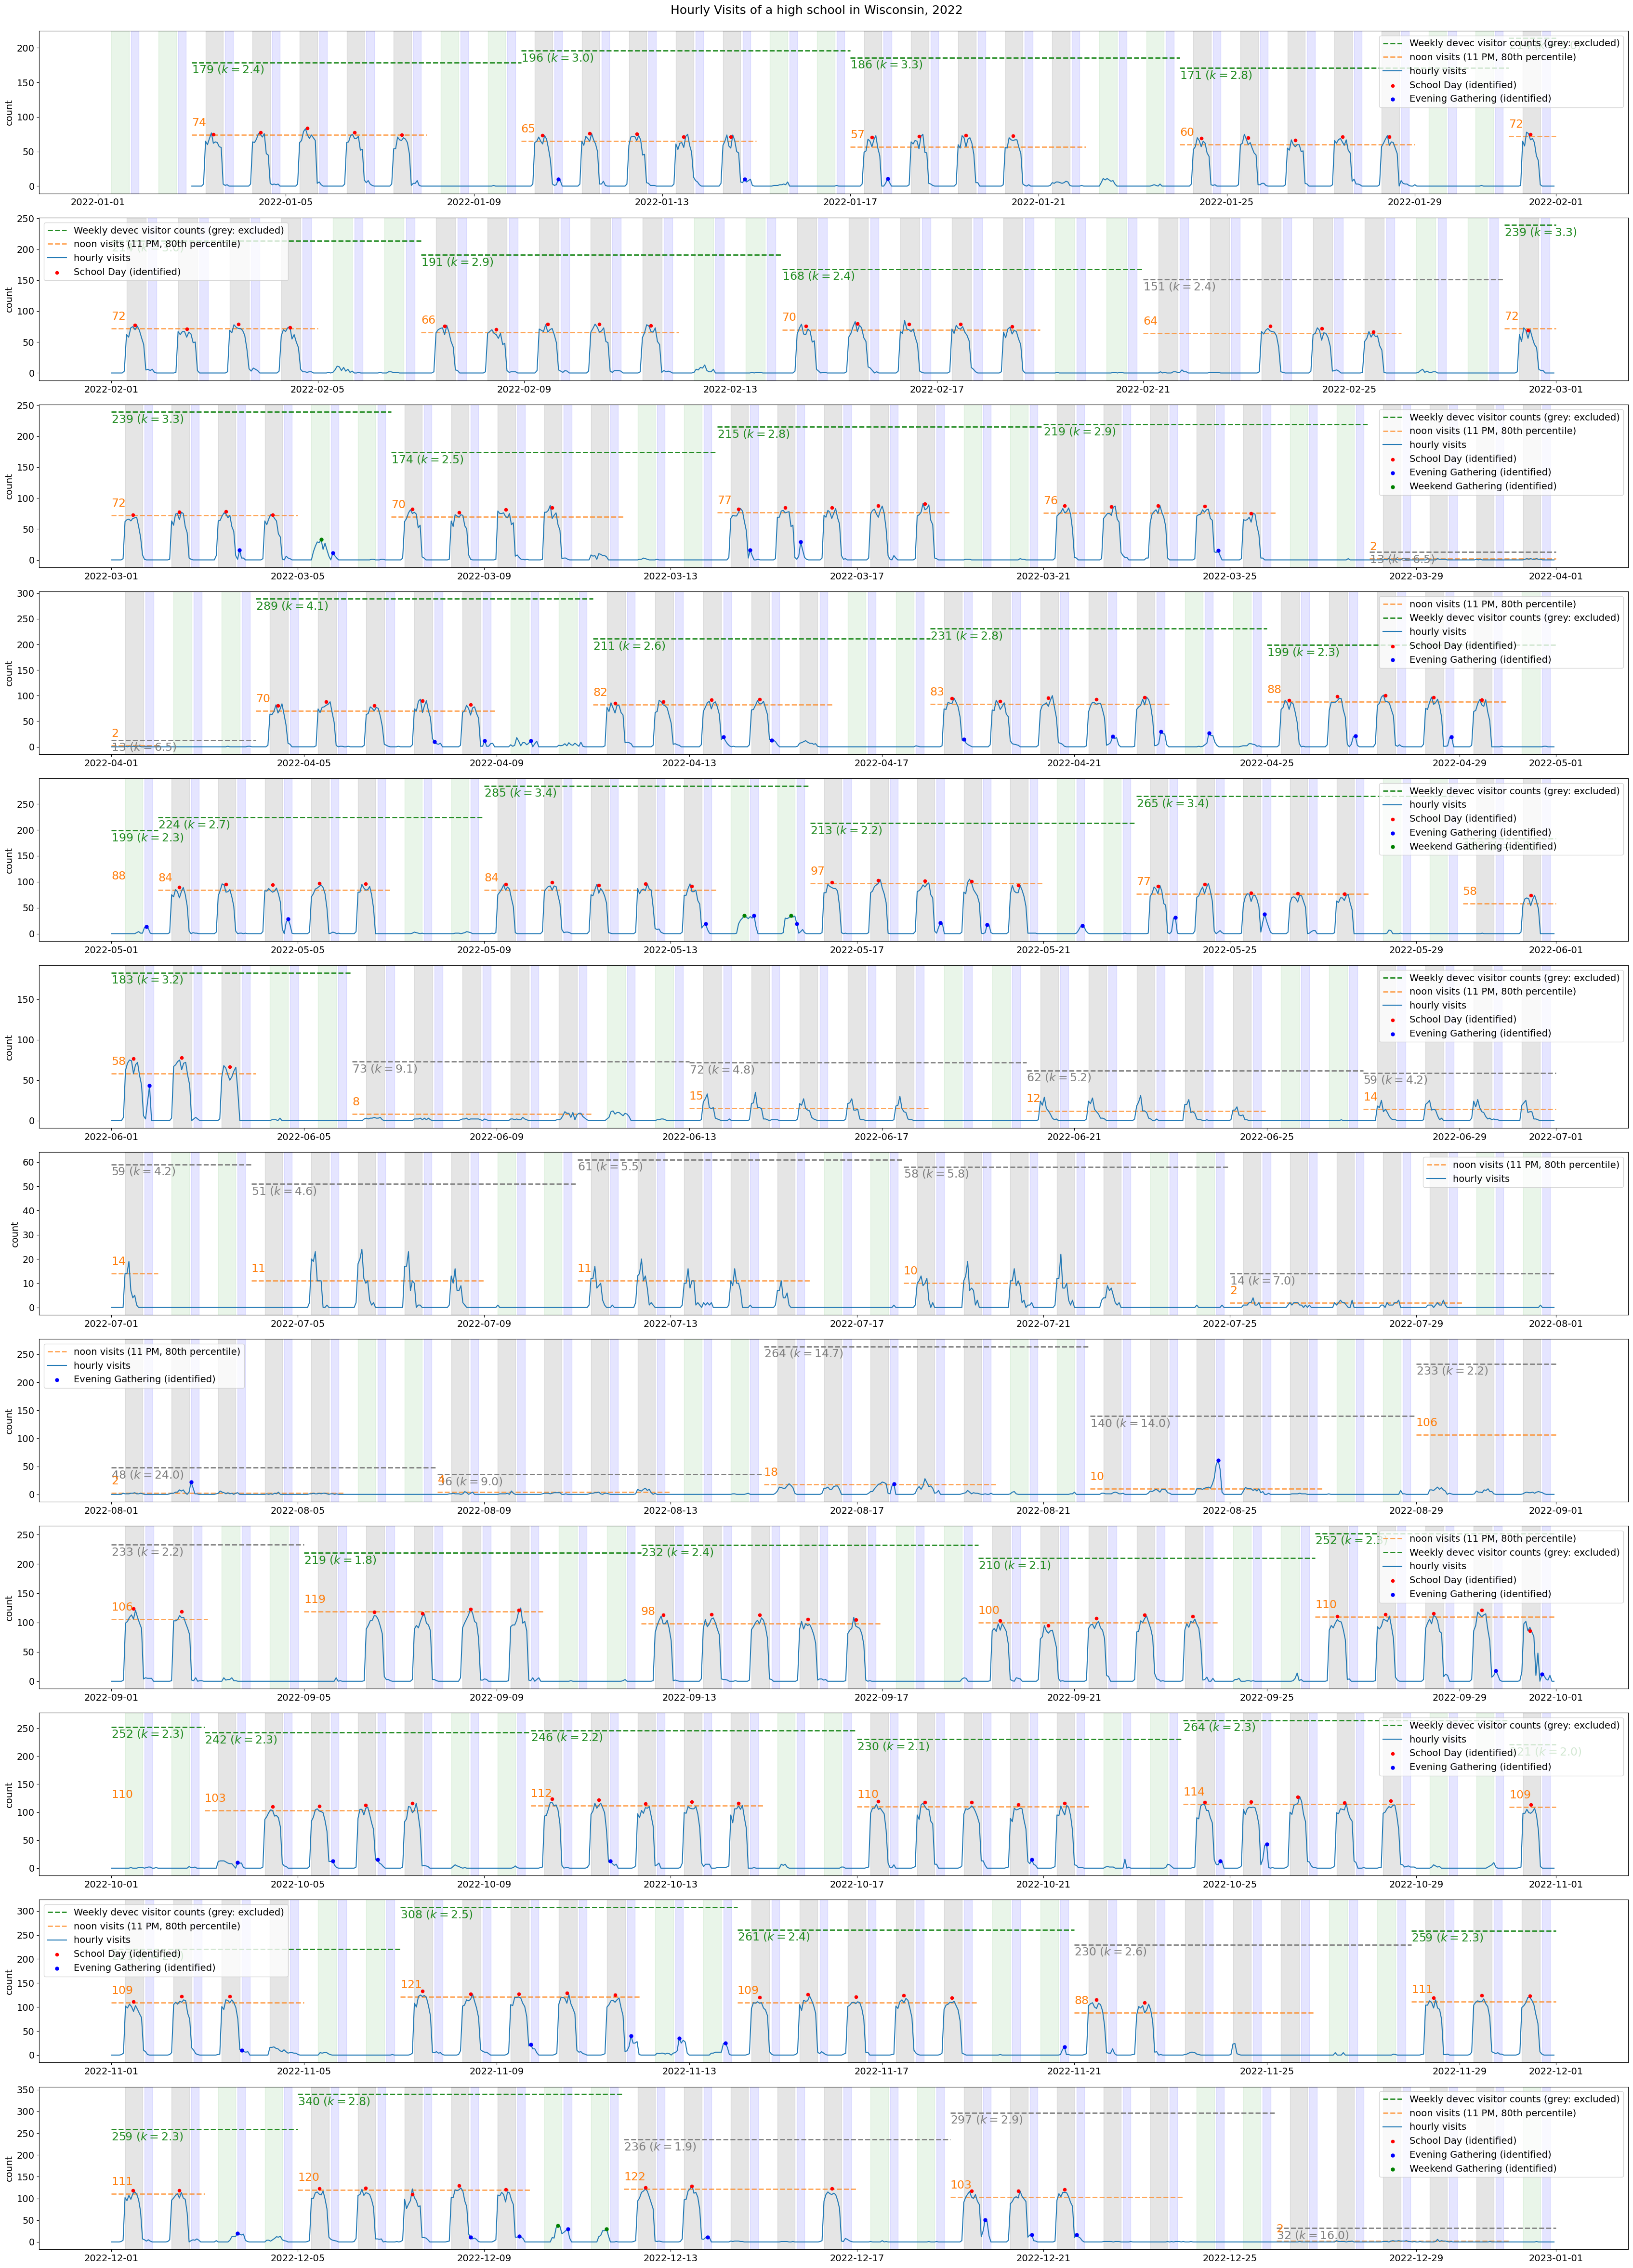

  0%|          | 0/28298 [00:15<?, ?it/s]


In [ ]:
%load_ext autoreload
%autoreload 2
import helper
import sys
if "helper" in sys.modules:
    del sys.modules["helper"]

import helper
import gc
import matplotlib.pyplot as plt
import pandas as pd
import ast
import random
import matplotlib.dates as mdates
import os
from tqdm import tqdm
 
from IPython.display import clear_output
clear_output(wait=True)


save_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\Figures\school_weekly_plots_for_paper_figure"
os.makedirs(save_dir, exist_ok=True)

ranked_weed_csv_save_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\ranked_weeks_CSV_v2"
os.makedirs(ranked_weed_csv_save_dir, exist_ok=True)

all_school_keys = random.sample(all_school_keys, len(all_school_keys))
# --- Main loop ---
for placekey in tqdm(all_school_keys[:], total=len(all_school_keys)):  
    # placekey = random.choice(all_school_keys)
    # placekey = '222-222@63t-yvt-92k'
    # placekey = 'zzw-222@5qy-y4p-j35'
    # placekey = 'zzw-222@5s7-27j-2x5'
    # placekey = '222-222@5z4-rfy-grk'  # many half days in June
    # placekey = 'zzw-222@8g6-ygq-nt9'  # parent drop off/pickup pattern 
    # placekey = '222-222@63k-9w6-fxq'  # after school hour test. cannot detect 5.12 evening gathering, aother days ok
    # placekey = r'222-222@62j-qv3-psq'  # after school hour test for small afterschool peak
    # placekey = r'222-222@8sz-wr3-pn5'  # after school hour test for mis-identified evnening gathering, peak is 17:00 then drops
    # placekey = r'zzw-222@65y-x4m-yn5'   # seems error, cannot filter weekday < 5??
    # placekey = r'222-222@8f2-rbw-hbk'   # challenge in Fall
    # placekey = r'222-222@628-dk5-jgk'   # for testing, showing wrong results of school days. Bugs fixed (Nov. 29, 2025)
    # placekey = r'222-222@63j-927-9j9'   #  good example for testing.
    # placekey = r'zzw-222@8f6-txj-5xq'  # no gatherings, good example for testing
    # placekey = r'zzw-222@63v-zsx-dqf'  # many half days, good example for testing
    # placekey = r'zzw-222@63f-kjp-fpv'  # mess parent drop-off/pickup pattern 
    # placekey = r'zzw-222@8gm-zc9-649'  # Error processing placekey zzw-222@8gm-zc9-649: cannot convert float NaN to integer
    placekey = r'222-222@5s8-25b-nqz'  # for paper figures
    # placekey = r'zzw-222@8f6-t

    try:

        con.execute(f"""
            SELECT *
            FROM highschools
            WHERE placekey = '{placekey}'
        """)
        school_df = con.fetchdf()
        if school_df['raw_visitor_counts'].median() < 50:
            continue
        school_df['poi_cbg'] = school_df['poi_cbg'].str.replace(".0", "").str.zfill(12)
        school_name = school_df.iloc[0]['location_name']
        county_FIPS = school_df.iloc[0]['poi_cbg'][:5]

        # Richland county FIPS = 45079, South Carolina
        # Fulton county, GA, FIPS = 13121
        # if county_FIPS !=  "13121":  #  "13135" Georgia Gwinnett county, "42027" Pennsylvania Central county
        #     # print("Invalid county FIPS for placekey:", placekey)
            # continue

        try:
            State_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'STATE_NAME'].values[0]
        except IndexError:
            State_name = ""
            print("State name not found for STATEFP:", county_FIPS)

        try:
            county_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'COUNTY_NAME'].values[0]
        except IndexError:
            county_name = ""
            print("County name not found for COUNTYFP:", county_FIPS)
        
        fname = os.path.join(ranked_weed_csv_save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}.csv")
        print(f"Processing placekey: {placekey}")
        # if os.path.exists(fname):
        #     print(f"Ranked week CSV already exists for {placekey}, skipping.")
        #     continue

        school_df = school_df[school_df['visits_by_each_hour'].notna()].copy()
        school_df['date_range_start'] = pd.to_datetime(school_df['date_range_start'], errors='coerce')
        school_df['date_range_end']   = pd.to_datetime(school_df['date_range_end'], errors='coerce')
        
        # 
        
        # Expand hourly visits
        hourly_dfs = school_df.apply(helper.get_hourly_visits_in_a_row, axis=1).to_list()
        school_hourly_df = pd.concat(hourly_dfs, ignore_index=True)
        
        school_hourly_df['year'] = school_hourly_df['hour_local'].dt.year
        school_hourly_df['month'] = school_hourly_df['hour_local'].dt.month
        school_hourly_df['weekday'] = school_hourly_df['hour_local'].dt.weekday
        school_hourly_df['hour'] = school_hourly_df['hour_local'].dt.hour
        school_hourly_df['week'] = school_hourly_df['hour_local'].dt.isocalendar().week
        school_hourly_df['week_start_year'] = pd.to_datetime(school_hourly_df['date_range_start']).dt.year
        
        school_hourly_df = school_hourly_df[school_hourly_df['hour_local'].dt.year == 2022]
        school_hourly_df = school_hourly_df[school_hourly_df['week_start_year'] == 2022]
        ts = pd.to_datetime(school_hourly_df['hour_local'].iloc[0])
        tz = ts.tzinfo
        # print("Timezone:", tz)
        print(f"Processing placekey: {placekey}, school name: {school_name}, county: {county_name}, FIPS: {county_FIPS}, State: {State_name}, Timezone: {tz}")

        school_hourly_df = helper.identify_school_day(school_hourly_df)
        # print("Okay here 0")
        school_hourly_df = helper.identity_school_hour_median_visits(school_hourly_df)

        

        # get the evening gathering info
        afterschool_total_visits, school_hourly_df = helper.analyze_after_school_hourly_visits(school_hourly_df)
        evening_gatherings = afterschool_total_visits.query("is_evening_gathering == 1")

        # get the weekend gathering info and rank weeks
        weekend_gatherings, school_hourly_df = helper.analyze_weekend_visits(school_hourly_df)
        # week_gathering_df, school_hourly_df = helper.get_non_school_hour_peak_visits(school_hourly_df)
        
        ranked_week_df, day_to_week_df, day_df, school_hourly_df = helper.ranking_weeks(school_hourly_df)
        ranked_week_df['placekey'] = placekey
        ranked_week_df['school_name'] = school_name
        ranked_week_df['county_FIPS'] = county_FIPS
        ranked_week_df['county_name'] = county_name
        ranked_week_df['State_name'] = State_name
        # save CSV
        if len(ranked_week_df) > 0:
            fname = os.path.join(ranked_weed_csv_save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}.csv")
            ranked_week_df.to_csv(fname, index=False)   
            fname = os.path.join(ranked_weed_csv_save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}_days.csv")
            day_df.to_csv(fname, index=True)

        # clean cell output
        # clear_output(wait=True)
                          
        # print("Okay here")
        # continue
         
        # is_plotting = False
        is_plotting = True
        if not is_plotting:
            clear_output(wait=True)
            continue
 
        # --- Step 4. Figure layout (12 rows × 1 col for months) ---
        fig = plt.figure(figsize=(34, 48))   # tall figure for 12 months
        gs = fig.add_gridspec(12, 1)         # 12 rows, 1 column

        # print("Okay here 0")
        # Monthly plots
        for m in range(1, 13):
            ax = fig.add_subplot(gs[m-1, 0])

            df_month = school_df[
                school_df['date_range_start'].dt.month == m
            ]
            hours_m  = school_hourly_df[
                school_hourly_df['hour_local'].dt.month == m
            ].set_index('hour_local')#['visits']

            if df_month.empty and hours_m.empty:
                ax.set_title(f"Month {m} (no data)")
                ax.axis('off')
            else:
                helper.overlay_weekly_lines(ax, df_month, hours_m, f"Month {m}", month=m, year=2022, ranked_week_df=ranked_week_df)
                

            # draw school days as dots
            school_day_visits = hours_m[hours_m['is_school_day'] == 1].query("is_smooth_peak == 1").query("weekday < 5").copy()
            if not school_day_visits.empty:
                ax.scatter(school_day_visits.index, school_day_visits['visits_smooth_peak'], color='red', s=20, label='School Day (identified)', zorder=5)
            # print("school_day_visits:", school_day_visits)
            # print the annotations ontop of the dots
        #     for idx, row in school_day_visits.iterrows():
        #         ax.annotate(text=round(row['visits_smooth_peak']),
        # xy=(idx, row['visits_smooth_peak']), xytext=(0,10), textcoords="offset points", ha='center', color='red', fontsize=12)
                 
            # draw evening gatherings as dots    
            evening_gathering_month = hours_m.query("is_afterschool_peak == 1 and has_evening_gathering == 1").copy() 
            value_list = evening_gathering_month['visits'].values
            if value_list.size > 0:
                ax.scatter(evening_gathering_month.index, value_list, marker='.', color='blue', s=100, label='Evening Gathering (identified)', zorder=6)
                # for idx, row in evening_gathering_month.iterrows():
                    # event_time = pd.to_datetime(f"{row['date']} 19:00:00").tz_localize(tz)
                    # print("evening event_time:", event_time)
                    # event_visits = hours_m.loc[hours_m.index == event_time, 'visits']                                    
                    # ax.annotate(text=round(row['visits']), xy=(idx, row['visits']), xytext=(0,10), textcoords="offset points", ha='center', color='blue', fontsize=12)
            
            # draw weekend gatherings as green dots
            weekend_gathering_month = hours_m.query("is_weekend_peak == 1 and has_weekend_daytime_gathering == 1").copy() 
            value_list = weekend_gathering_month['visits'].values
            if value_list.size > 0:
                ax.scatter(weekend_gathering_month.index, value_list, marker='.', color='green', s=100, label='Weekend event (identified)', zorder=7)
                # draw annotations
                # for idx, row in weekend_gathering_month.iterrows():
                #     ax.annotate(text=round(row['visits']), xy=(idx, row['visits']), xytext=(0,10), textcoords="offset points", ha='center', color='green', fontsize=12)
            
            if m == 1:
                semester_baseline_spring = -9999
                if len(school_day_visits.dropna(subset=['semester_baseline'])) > 0:
                    try:
                        semester_baseline_spring = school_day_visits.dropna(subset=['semester_baseline'])['semester_baseline'].iloc[0]
                    except Exception as e:
                        print(f"Error getting spring semester baseline: {e}")
                        # pass
                # print("Okay here 0")  
                print("semester_baseline_spring:", int(semester_baseline_spring))
                # ax.annotate(text="Spring semester baseline: " + str(round(semester_baseline_spring)),
        # xy=(hours_m.index[0], semester_baseline_spring+10), xytext=(0,10), textcoords="offset points", ha='center', color='red', fontsize=12)
                  
                # print("m == 1")
                # print("hours_m index 0:", hours_m.index[0], "semester_baseline:", semester_baseline)
            if m == 9:
                semester_baseline_fall = -9999
                if len(school_day_visits.dropna(subset=['semester_baseline'])) > 0:
                    try:
                        semester_baseline_fall = school_day_visits.dropna(subset=['semester_baseline'])['semester_baseline'].iloc[-1]
                    except Exception as e:
                        print(f"Error getting fall semester baseline: {e}")
                        # pass
                print("semester_baseline_fall:", int(semester_baseline_fall))
                if semester_baseline_spring < 0 and  semester_baseline_fall < 0:
                    print("No semester baselines found, skipping annotation.")
                    continue
                # ax.annotate(text="Fall semester baseline: " + str(round(semester_baseline_fall)),
        # xy=(hours_m.index[0], semester_baseline_fall+20), xytext=(0,10), textcoords="offset points", ha='center', color='red', fontsize=12)
                # print("m == 7")
                # print("hours_m index 0:", hours_m.index[0], "semester_baseline:", semester_baseline)
            ax.legend( fontsize=14)

        # fig.suptitle(f"Weekly Hourly Visits for {school_name} ({placekey}) in 2022\n{county_name} County, {State_name}", fontsize=16)
        # fig.suptitle(f"Hourly Visits of a high school in {State_name}, 2022", fontsize=18)
        plt.tight_layout(rect=[0, 0, 1, 0.98])  

        plt.savefig(os.path.join(save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}.png"), dpi=300)
        print(f"Saved plot for {placekey}")
        plt.show()
        # plt.clf()
        # plt.close(fig)
        # plt.close('all')

        # del school_df, school_hourly_df, hourly_dfs, fig, gs, ax
        # gc.collect()
        # clear_output(wait=True)
        
        break
        
    except Exception as e:
        print(f"Error processing placekey {placekey}: {e}")
        clear_output(wait=True)
        continue

# ranked_week_df

# for paper figures

  0%|          | 0/28298 [00:00<?, ?it/s]

Processing placekey: zzw-222@8sz-fbr-rff
Processing placekey: zzw-222@8sz-fbr-rff, school name: East View H S, county: Williamson, FIPS: 48491, State: Texas, Timezone: UTC-06:00
Months [2, 3, 4, 5] visit baseline (median of weekdays): 155
Months [9, 10, 11] visit baseline (median of weekdays): 228
semester_baseline_spring: 154
semester_baseline_fall: 228
Saved plot for zzw-222@8sz-fbr-rff


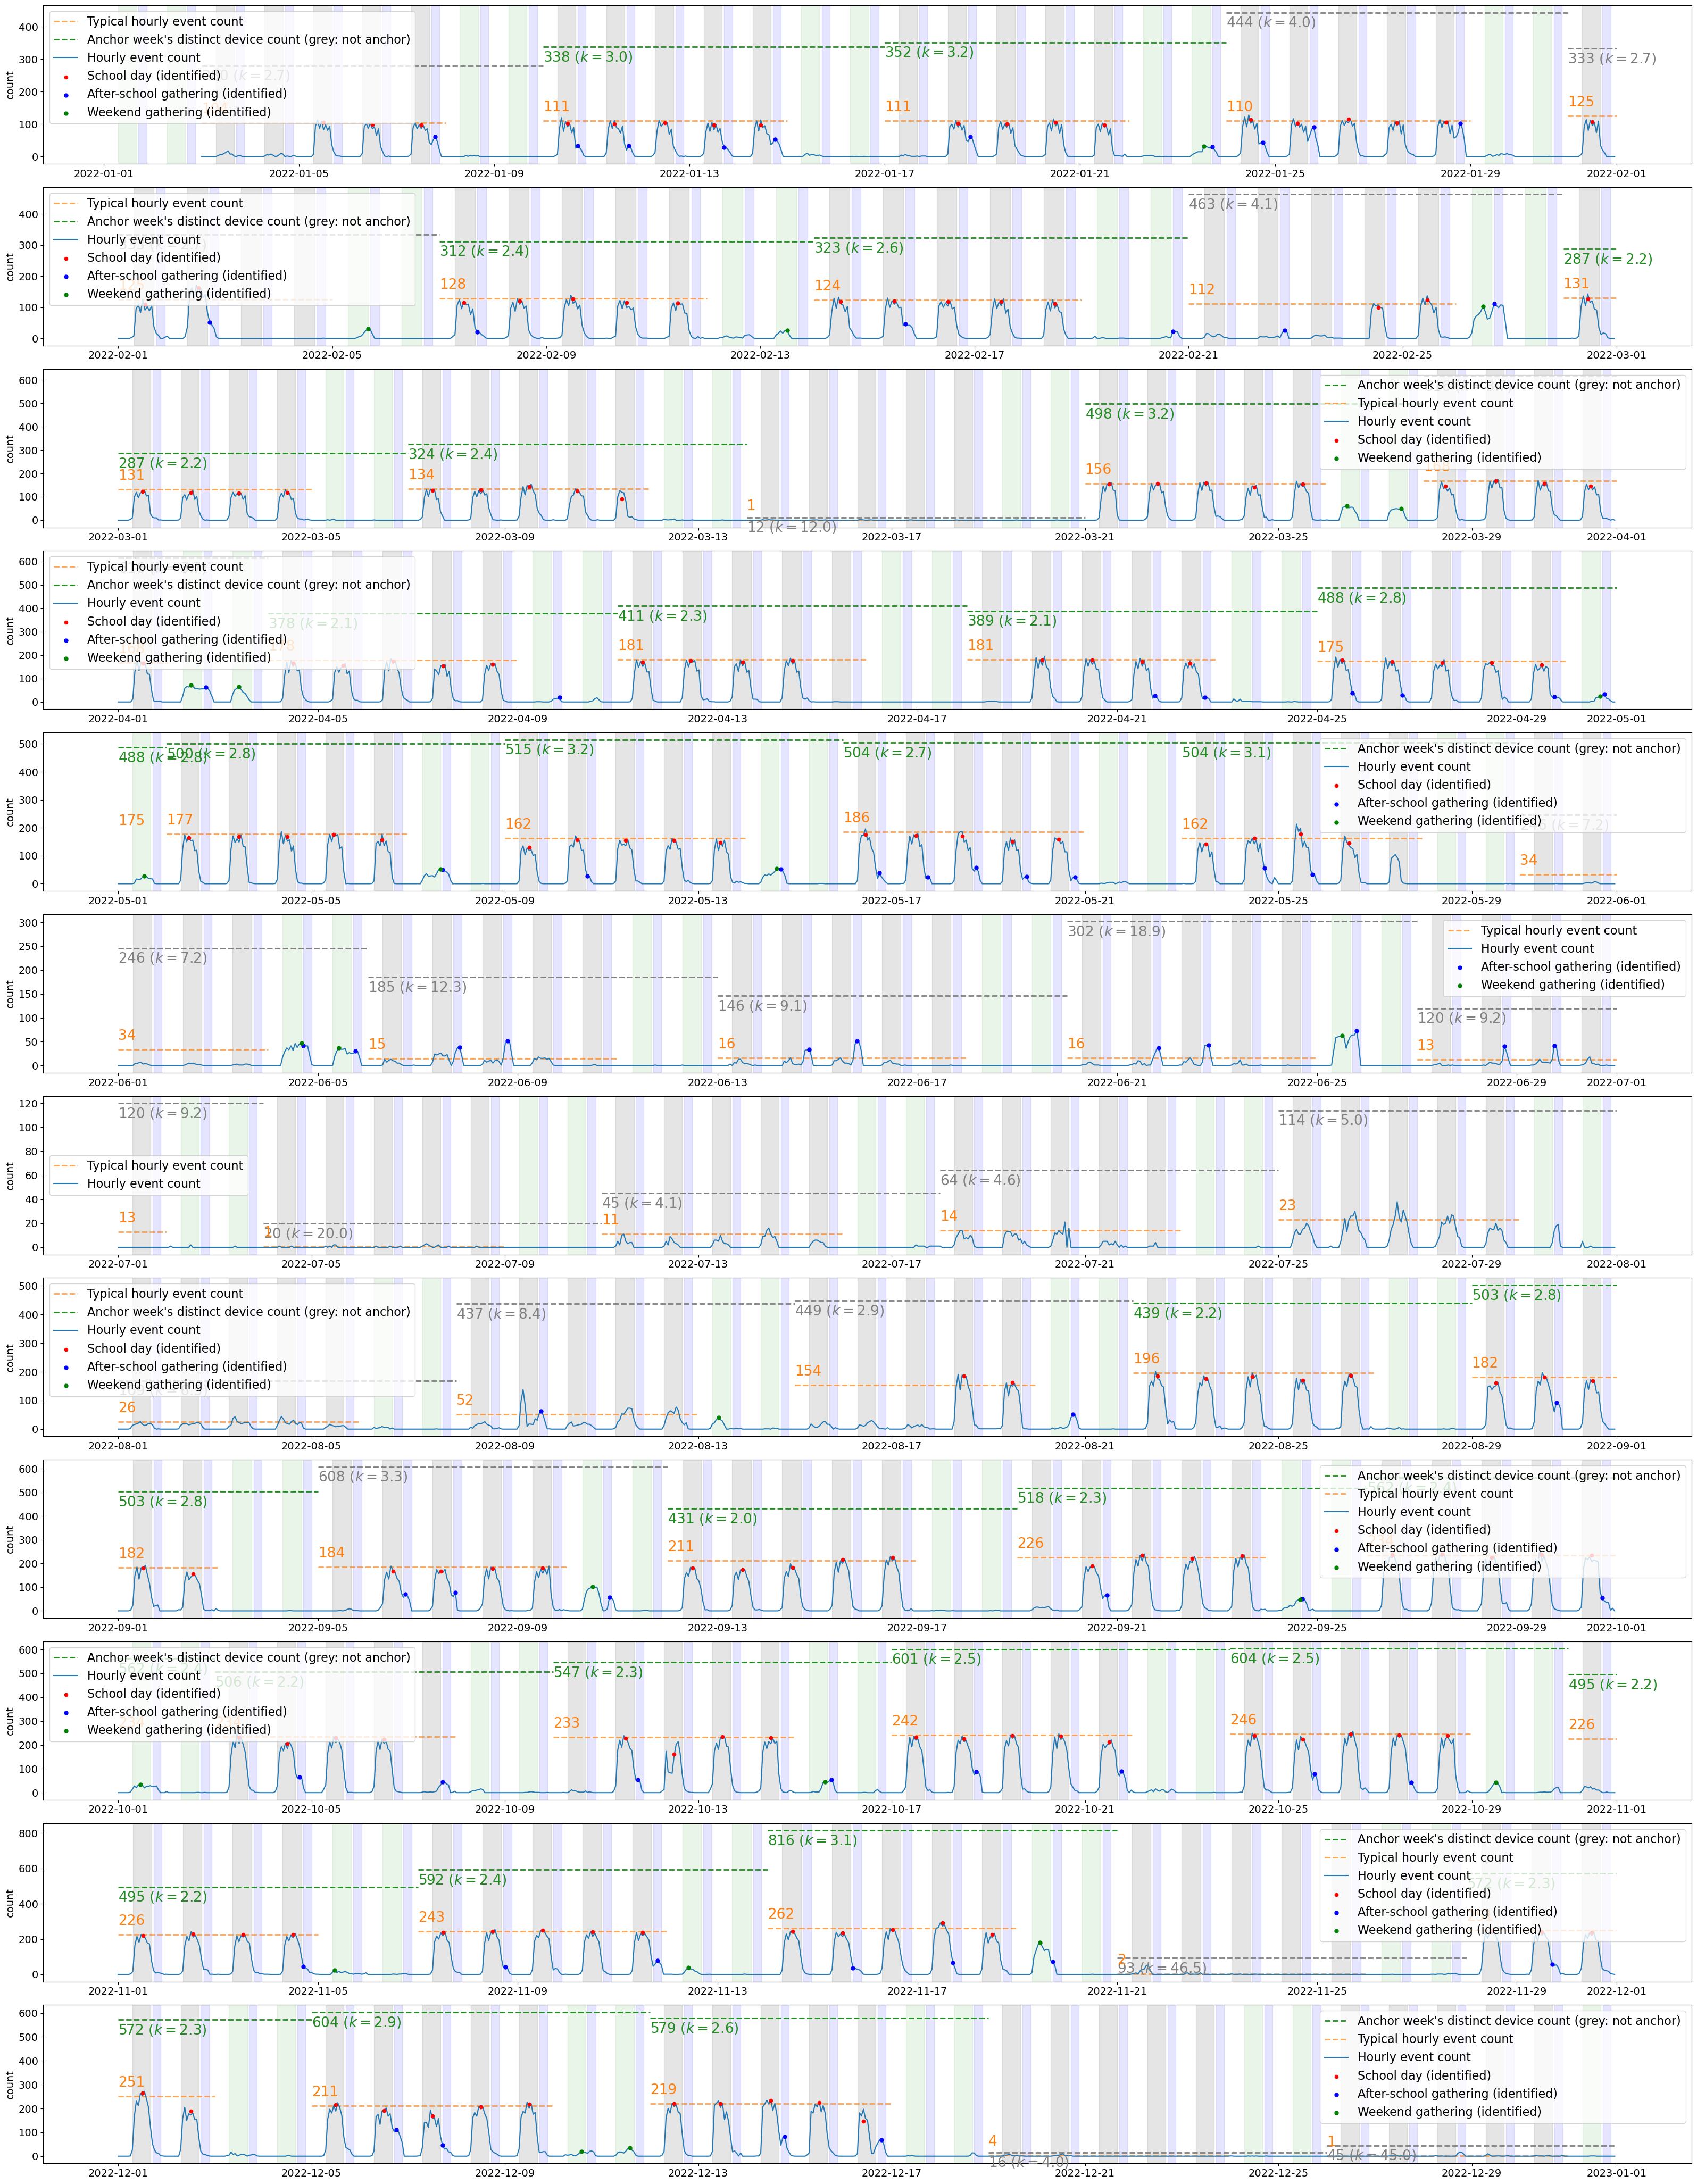

  0%|          | 0/28298 [00:14<?, ?it/s]


In [ ]:
# for paper figure only

%load_ext autoreload
%autoreload 2
import helper
import sys
if "helper" in sys.modules:
    del sys.modules["helper"]

import helper
import gc
import matplotlib.pyplot as plt
import pandas as pd
import ast
import random
import matplotlib.dates as mdates
import os
from tqdm import tqdm
 
from IPython.display import clear_output
clear_output(wait=True)


save_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\Figures\school_weekly_plots_for_paper_figure"
os.makedirs(save_dir, exist_ok=True)

ranked_weed_csv_save_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\ranked_weeks_CSV_v2"
os.makedirs(ranked_weed_csv_save_dir, exist_ok=True)

all_school_keys = random.sample(all_school_keys, len(all_school_keys))
# --- Main loop ---
for placekey in tqdm(all_school_keys[:], total=len(all_school_keys)):  
    # placekey = random.choice(all_school_keys)
    # placekey = '222-222@63t-yvt-92k'
    # placekey = 'zzw-222@5qy-y4p-j35'
    # placekey = 'zzw-222@5s7-27j-2x5'
    # placekey = '222-222@5z4-rfy-grk'  # many half days in June
    # placekey = 'zzw-222@8g6-ygq-nt9'  # parent drop off/pickup pattern 
    # placekey = '222-222@63k-9w6-fxq'  # after school hour test. cannot detect 5.12 evening gathering, aother days ok
    # placekey = r'222-222@62j-qv3-psq'  # after school hour test for small afterschool peak
    # placekey = r'222-222@8sz-wr3-pn5'  # after school hour test for mis-identified evnening gathering, peak is 17:00 then drops
    # placekey = r'zzw-222@65y-x4m-yn5'   # seems error, cannot filter weekday < 5??
    # placekey = r'222-222@8f2-rbw-hbk'   # challenge in Fall
    # placekey = r'222-222@628-dk5-jgk'   # for testing, showing wrong results of school days. Bugs fixed (Nov. 29, 2025)
    # placekey = r'222-222@63j-927-9j9'   #  good example for testing.
    # placekey = r'zzw-222@8f6-txj-5xq'  # no gatherings, good example for testing
    # placekey = r'zzw-222@63v-zsx-dqf'  # many half days, good example for testing
    # placekey = r'zzw-222@63f-kjp-fpv'  # mess parent drop-off/pickup pattern 
    # placekey = r'zzw-222@8gm-zc9-649'  # Error processing placekey zzw-222@8gm-zc9-649: cannot convert float NaN to integer
    placekey = r'222-222@5s8-25b-nqz'  # for paper figures
    placekey = r'222-222@645-z9n-mzf'  # for paper figures
    placekey = r'zzw-222@83s-d6c-4y9'  # for paper figures
    placekey = r'222-222@5sb-4b9-x5z'  # for paper figures
    placekey = r'zzw-222@8sz-fbr-rff'  # for paper figures
    # placekey = r'zzw-222@8f6-t

    try:

        con.execute(f"""
            SELECT *
            FROM highschools
            WHERE placekey = '{placekey}'
        """)
        school_df = con.fetchdf()
        if school_df['raw_visitor_counts'].median() < 50:
            continue
        school_df['poi_cbg'] = school_df['poi_cbg'].str.replace(".0", "").str.zfill(12)
        school_name = school_df.iloc[0]['location_name']
        county_FIPS = school_df.iloc[0]['poi_cbg'][:5]

        # Richland county FIPS = 45079, South Carolina
        # Fulton county, GA, FIPS = 13121
        # if county_FIPS !=  "13121":  #  "13135" Georgia Gwinnett county, "42027" Pennsylvania Central county
        #     # print("Invalid county FIPS for placekey:", placekey)
            # continue

        try:
            State_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'STATE_NAME'].values[0]
        except IndexError:
            State_name = ""
            print("State name not found for STATEFP:", county_FIPS)

        try:
            county_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'COUNTY_NAME'].values[0]
        except IndexError:
            county_name = ""
            print("County name not found for COUNTYFP:", county_FIPS)
        
        fname = os.path.join(ranked_weed_csv_save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}.csv")
        print(f"Processing placekey: {placekey}")
        # if os.path.exists(fname):
        #     print(f"Ranked week CSV already exists for {placekey}, skipping.")
        #     continue

        school_df = school_df[school_df['visits_by_each_hour'].notna()].copy()
        school_df['date_range_start'] = pd.to_datetime(school_df['date_range_start'], errors='coerce')
        school_df['date_range_end']   = pd.to_datetime(school_df['date_range_end'], errors='coerce')
        
        # 
                # Expand hourly visits
        hourly_dfs = school_df.apply(helper.get_hourly_visits_in_a_row, axis=1).to_list()
        school_hourly_df = pd.concat(hourly_dfs, ignore_index=True)
        
        school_hourly_df['year'] = school_hourly_df['hour_local'].dt.year
        school_hourly_df['month'] = school_hourly_df['hour_local'].dt.month
        school_hourly_df['weekday'] = school_hourly_df['hour_local'].dt.weekday
        school_hourly_df['hour'] = school_hourly_df['hour_local'].dt.hour
        school_hourly_df['week'] = school_hourly_df['hour_local'].dt.isocalendar().week
        school_hourly_df['week_start_year'] = pd.to_datetime(school_hourly_df['date_range_start']).dt.year
        
        school_hourly_df = school_hourly_df[school_hourly_df['hour_local'].dt.year == 2022]
        school_hourly_df = school_hourly_df[school_hourly_df['week_start_year'] == 2022]
        ts = pd.to_datetime(school_hourly_df['hour_local'].iloc[0])
        tz = ts.tzinfo
        # print("Timezone:", tz)
        print(f"Processing placekey: {placekey}, school name: {school_name}, county: {county_name}, FIPS: {county_FIPS}, State: {State_name}, Timezone: {tz}")

        school_hourly_df = helper.identify_school_day(school_hourly_df)
        # print("Okay here 0")
        school_hourly_df = helper.identity_school_hour_median_visits(school_hourly_df)

        

        # get the evening gathering info
        afterschool_total_visits, school_hourly_df = helper.analyze_after_school_hourly_visits(school_hourly_df)
        evening_gatherings = afterschool_total_visits.query("is_evening_gathering == 1")

        # get the weekend gathering info and rank weeks
        weekend_gatherings, school_hourly_df = helper.analyze_weekend_visits(school_hourly_df)
        # week_gathering_df, school_hourly_df = helper.get_non_school_hour_peak_visits(school_hourly_df)
        
        ranked_week_df, day_to_week_df, day_df, school_hourly_df = helper.ranking_weeks(school_hourly_df)
        ranked_week_df['placekey'] = placekey
        ranked_week_df['school_name'] = school_name
        ranked_week_df['county_FIPS'] = county_FIPS
        ranked_week_df['county_name'] = county_name
        ranked_week_df['State_name'] = State_name
        # save CSV
        if len(ranked_week_df) > 0:
            fname = os.path.join(ranked_weed_csv_save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}.csv")
            ranked_week_df.to_csv(fname, index=False)   
            fname = os.path.join(ranked_weed_csv_save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}_days.csv")
            day_df.to_csv(fname, index=True)

        # clean cell output
        # clear_output(wait=True)
                          
        # print("Okay here")
        # continue
         
        # is_plotting = False
        is_plotting = True
        if not is_plotting:
            clear_output(wait=True)
            continue
 
        # --- Step 4. Figure layout (12 rows × 1 col for months) ---
        fig = plt.figure(figsize=(32, 42))   # tall figure for 12 months
        gs = fig.add_gridspec(12, 1)         # 12 rows, 1 column

        # print("Okay here 0")
        # Monthly plots
        for m in range(1, 13):
            ax = fig.add_subplot(gs[m-1, 0])

            df_month = school_df[
                school_df['date_range_start'].dt.month == m
            ]
            hours_m  = school_hourly_df[
                school_hourly_df['hour_local'].dt.month == m
            ].set_index('hour_local')#['visits']

            if df_month.empty and hours_m.empty:
                # ax.set_title(f"Month {m} (no data)")
                ax.axis('off')
            else:
                helper.overlay_weekly_lines(ax, df_month, hours_m, f"Month {m}", month=m, year=2022, ranked_week_df=ranked_week_df)
                

            # draw school days as dots
            school_day_visits = hours_m[hours_m['is_school_day'] == 1].query("is_smooth_peak == 1").query("weekday < 5").copy()
            if not school_day_visits.empty:
                ax.scatter(school_day_visits.index, school_day_visits['visits_smooth_peak'], color='red', s=20, label='School day (identified)', zorder=5)
            # print("school_day_visits:", school_day_visits)
            # print the annotations ontop of the dots
        #     for idx, row in school_day_visits.iterrows():
        #         ax.annotate(text=round(row['visits_smooth_peak']),
        # xy=(idx, row['visits_smooth_peak']), xytext=(0,10), textcoords="offset points", ha='center', color='red', fontsize=12)
                 
            # draw evening gatherings as dots    
            evening_gathering_month = hours_m.query("is_afterschool_peak == 1 and has_evening_gathering == 1").copy() 
            value_list = evening_gathering_month['visits'].values
            if value_list.size > 0:
                ax.scatter(evening_gathering_month.index, value_list, marker='.', color='blue', s=100, label='After-school gathering (identified)', zorder=6)
                # for idx, row in evening_gathering_month.iterrows():
                #     # event_time = pd.to_datetime(f"{row['date']} 19:00:00").tz_localize(tz)
                #     # print("evening event_time:", event_time)
                #     # event_visits = hours_m.loc[hours_m.index == event_time, 'visits']                                    
                #     ax.annotate(text=round(row['visits']), xy=(idx, row['visits']), xytext=(0,10), textcoords="offset points", ha='center', color='blue', fontsize=14)
            
            # draw weekend gatherings as green dots
            weekend_gathering_month = hours_m.query("is_weekend_peak == 1 and has_weekend_daytime_gathering == 1").copy() 
            value_list = weekend_gathering_month['visits'].values
            if value_list.size > 0:
                ax.scatter(weekend_gathering_month.index, value_list, marker='.', color='green', s=100, label='Weekend gathering (identified)', zorder=7)
                # draw annotations
                # for idx, row in weekend_gathering_month.iterrows():
                #     ax.annotate(text=round(row['visits']), xy=(idx, row['visits']), xytext=(0,10), textcoords="offset points", ha='center', color='green', fontsize=14)
            
            if m == 1:
                semester_baseline_spring = -9999
                if len(school_day_visits.dropna(subset=['semester_baseline'])) > 0:
                    try:
                        semester_baseline_spring = school_day_visits.dropna(subset=['semester_baseline'])['semester_baseline'].iloc[0]
                    except Exception as e:
                        print(f"Error getting spring semester baseline: {e}")
                        # pass
                # print("Okay here 0")  
                print("semester_baseline_spring:", int(semester_baseline_spring))
                # ax.annotate(text="Spring semester baseline: " + str(round(semester_baseline_spring)),
        # xy=(hours_m.index[0], semester_baseline_spring+10), xytext=(0,10), textcoords="offset points", ha='center', color='red', fontsize=14)
                  
                # print("m == 1")
                # print("hours_m index 0:", hours_m.index[0], "semester_baseline:", semester_baseline)
            if m == 9:
                semester_baseline_fall = -9999
                if len(school_day_visits.dropna(subset=['semester_baseline'])) > 0:
                    try:
                        semester_baseline_fall = school_day_visits.dropna(subset=['semester_baseline'])['semester_baseline'].iloc[-1]
                    except Exception as e:
                        print(f"Error getting fall semester baseline: {e}")
                        # pass
                print("semester_baseline_fall:", int(semester_baseline_fall))
                if semester_baseline_spring < 0 and  semester_baseline_fall < 0:
                    print("No semester baselines found, skipping annotation.")
                    continue
                # ax.annotate(text="Fall semester baseline: " + str(round(semester_baseline_fall)),
        # xy=(hours_m.index[0], semester_baseline_fall+20), xytext=(0,10), textcoords="offset points", ha='center', color='red', fontsize=12)
                # print("m == 7")
                # print("hours_m index 0:", hours_m.index[0], "semester_baseline:", semester_baseline)
            if m == 9:
                # ax.legend( fontsize=16, loc='upper right')
                pass
            else:
                ax.legend( fontsize=16)
            # ax.set_xlabel("", fontsize=14)
            # ax.set_ylabel("",fontsize=14)
        # fig.suptitle(f"Weekly Hourly Visits for {school_name} ({placekey}) in 2022\n{county_name} County, {State_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.98])  

        plt.savefig(os.path.join(save_dir, f"{State_name}_{county_name}_{county_FIPS}_{school_name}_{placekey}.png"), dpi=300)
        print(f"Saved plot for {placekey}")
        plt.show()
        # plt.clf()
        # plt.close(fig)
        # plt.close('all')

        # del school_df, school_hourly_df, hourly_dfs, fig, gs, ax
        # gc.collect()
        # clear_output(wait=True)
        
        break
        
    except Exception as e:
        print(f"Error processing placekey {placekey}: {e}")
        clear_output(wait=True)
        continue

# ranked_week_df

In [10]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
ranked_week_df#['visit_scaling_factor'].describe()
day_to_week_df

In [ ]:
%load_ext autoreload
%autoreload 2
import helper
import sys
if "helper" in sys.modules:
    del sys.modules["helper"]

import helper
day_df, week_df = helper.ranking_weeks(school_hourly_df)

# week_df['visit_scaling_factor'] = week_df['weekly_raw_visitor_counts'] / week_df['expected_noon_visits']
week_df[['date_range_start', 'school_day_cnt', 'total_evening_gathering_cnt', 'school_day_evening_gathering_cnt','weekend_evening_gathering_cnt', 'weekend_daytime_gathering_cnt', 'non_school_visit_to_school_visit_ratio', 'visit_scaling_factor']] 
# week_df

In [ ]:
week_df.columns

In [ ]:
# school_hourly_df['date'] = pd.to_datetime(school_hourly_df['date'])  # .query("is_afterschool_peak == 1 and has_evening_gathering == 1 ")
import datetime
school_hourly_df.query("date == @datetime.date(2022, 1, 4)")

In [ ]:
day_df

In [ ]:
day_df.index = pd.to_datetime(day_df.index)
day_df.loc['2022-01-04']

In [ ]:
afterschool_total_visits, school_hourly_df = helper.analyze_after_school_hourly_visits(school_hourly_df)
afterschool_total_visits.query("is_evening_gathering == 1")

In [ ]:
school_hourly_df

In [ ]:
random_week = random.randint(1,53)
print("Random week selected:", random_week)
school_hourly_df.query(f"week == {random_week}").sample(10)

In [ ]:
school_hourly_df.columns

# Testing week selection

In [ ]:
school_hourly_df.sample(5)

# Get spring/fall expected school-day visit

= the median of the weekday of the semester

In [ ]:
school_hourly_df['date']

In [ ]:
school_hourly_df['date'] < pd.Timestamp('2022-07-01')


In [ ]:
# get the baseline of the noon visits across all spring/fall semesters

%load_ext autoreload
%autoreload 2
import helper
import sys
if "helper" in sys.modules:
    del sys.modules["helper"]

import helper
spring_months = [2,3,4,5]
fall_months = [9,10,11]

import datetime


 


school_hourly_df.sample(10)

In [ ]:
# get the baseline of the noon visits across all spring/fall semesters
spring_months = [2,3,4,5]
fall_months = [9,10,11]

spring_noon_expected_visit_cnt = school_hourly_df[school_hourly_df['month'].isin(spring_months)]['noon_visit_80quantile'].median()
print("Spring semester noon visit 80th quantile stats:", spring_noon_expected_visit_cnt)
 
fall_noon_expected_visit_cnt = school_hourly_df[school_hourly_df['month'].isin(fall_months)]['noon_visit_80quantile'].median()
print("Fall semester noon visit 80th quantile stats:", fall_noon_expected_visit_cnt)

# get the shool days: 
def is_school_day(school_hourly_df, thres_cnt):
    try:
        school_hourly_df.set_index('hour_local', inplace=True)
    except KeyError:
        pass
    school_hourly_df['is_school_day'] = 0
    noon_visit_df = school_hourly_df[school_hourly_df['hour'] == 11][['visits']]
    mask = noon_visit_df > thres_cnt
    dates = noon_visit_df[mask]['date'].unique()
    school_hourly_df[school_hourly_df['date'].isin(dates)]['is_school_day'] = 1

    print("thres_cnt:", thres_cnt)

    return school_hourly_df

is_school_day(school_hourly_df[school_hourly_df['month']<7], thres_cnt=spring_noon_expected_visit_cnt/2).sample(10)
# school_hourly_df.index.date

In [ ]:
# ! pip install statsmodels

def pick_a_month_data(school_hourly_df, month=1, year=2022):
    month_df = school_hourly_df[
        (school_hourly_df['hour_local'].dt.month == month) &
        (school_hourly_df['hour_local'].dt.year == year)
    ].set_index('hour_local')
    return month_df

school_hourly_df['month'] = school_hourly_df['hour_local'].dt.month
school_hourly_df['weekday'] = school_hourly_df['hour_local'].dt.weekday
school_hourly_df['hour'] = school_hourly_df['hour_local'].dt.hour

# set the after school hour visits to 0
school_hourly_df.loc[school_hourly_df['hour'] > 17, 'visits'] = 0
t_df = school_hourly_df.query("hour_local > '2022-12-01 00:00:00-05:00'").set_index('hour_local')  # .sample(10)
t_df = t_df.query("hour_local < '2023-03-01 00:00:00-05:00'")
fig, ax = plt.subplots(figsize=(24, 3))
ax.plot(t_df['visits'])
# t_df.iloc[:1000]['visits'].plot(ax=ax)

In [ ]:
# school_hourly_df

In [ ]:
t_df = t_df.query("weekday < 5").reset_index()
fig, ax = plt.subplots(figsize=(24, 3))

ax.plot(t_df.query("weekday < 5")['visits'].reset_index()['visits'])


In [ ]:
# school_hourly_df['month']

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks, periodogram, correlate, savgol_coeffs
from datetime import timedelta
import numpy as np
from scipy.signal import butter, filtfilt

# draw all year data
fig, axs = plt.subplots(12, 1, figsize=(24, 48), sharex=True, sharey=True)

for month in range(1, 13):

    t_df = school_hourly_df.query(f"month == {month}").reset_index()  # .sample(10)

    y_smooth = signal.savgol_filter(t_df['visits'], window_length=13, polyorder=4, mode="nearest")
    y_smooth = np.clip(y_smooth, 0, None)
    t_df['visits_smooth'] = y_smooth

    t_df['residual'] = t_df['visits'] - t_df['visits_smooth']

    # coeffs = savgol_coeffs(13, 2)
    # print(coeffs)

    # fig, ax = plt.subplots(figsize=(24, 3))
    axs[month-1].plot(t_df['visits'], label='Original', alpha=0.5)
    axs[month-1].plot(y_smooth, label='Smoothed', alpha=0.6)
    # ax.plot(t_df['residual'], label='residual')
    # ax.set_title('Savitzy-Golay Smoothing, window=13, polyorder=2')
    axs[month-1].set_title(f'Month {month} - Savitzy-Golay Smoothing, window=13, polyorder=2')
    axs[month-1].legend()


 # save fig
plt.legend()
fig.savefig(r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\Figures\school_weekly_plots_v3\smoothing_example.png", dpi=150)
# t_df

In [ ]:
from scipy.signal import butter, filtfilt

t_df = school_hourly_df.query(f"month == {month}").query("weekday < 5").reset_index()  # .sample(10)

order = 2
fs = 1.0  # sampling frequency = 1 sample per hour
cutoff_hours = 4     # everything faster than 12 h will be smoothed out
Wn = 1/(2*cutoff_hours) / (0.5*fs)   # normalized cutoff = (1/(2*Tcutoff)) / (fs/2)
print("Normalized cutoff frequency:", Wn)
b, a = butter(N=order, Wn=Wn, btype='low', analog=False)   # cutoff frequency controls smoothness
y_smooth = filtfilt(b, a, t_df.query("weekday < 5")['visits'])
y_smooth = np.clip(y_smooth, 0, None)
t_df['visits_smooth'] = y_smooth
t_df['residual'] = t_df['visits'] - t_df['visits_smooth']

fig, ax = plt.subplots(figsize=(24, 3))
ax.plot(t_df['visits'], label='Original')
ax.plot(y_smooth, label='Smoothed with Butterworth filter')
ax.plot(t_df['residual'], label='residual')
ax.set_title(f'Butterworth Filter Smoothing, order={order}, Wn={Wn}')
ax.legend()

# save fig
fig.savefig(fr"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\Figures\school_weekly_plots_v3\butterworth_smoothing_{order}_{Wn:.3f}.png", dpi=150)

In [ ]:
from scipy.signal import periodogram
f, Pxx = periodogram(t_df['visits'], fs=1)  # fs=1 per hour
f, Pxx = periodogram(t_df['visits_smooth'], fs=1)  # fs=1 per hour

fig, ax = plt.subplots(figsize=(12, 6))
ax.semilogy(f, Pxx)
# Pxx
# f
# find the max frequency
np.argmax(Pxx)
print("Dominant frequency (per hour):", f[np.argmax(Pxx)])
# peaks, _ = find_peaks(Pxx, height=0)
# peak_freqs = f[peaks]
# peak_powers = Pxx[peaks]
# print("Peak Frequencies (per hour):", peak_freqs)

# print("Peak Powers:", peak_powers)

In [ ]:
from scipy.signal import welch, find_peaks

fs = 1.0
x0 = t_df['visits'] - np.mean(t_df['visits'])
x0 = x0.to_numpy().astype(float)  # just demean
x0 = np.nan_to_num(x0)

# Use slightly longer segments to improve low-freq resolution
f, Pxx = welch(x0, fs=fs, nperseg=24*5, noverlap=12*5) # , noverlap=84,   nfft=256

# identify peaks
from scipy.signal import find_peaks
pk, _ = find_peaks(Pxx, prominence=np.max(Pxx)*0.05)
for fi in f[pk]:
    print(f"Peak at f={fi:.4f}  -> period ≈ {1/fi:.1f} hours")



fig, ax = plt.subplots(figsize=(12, 6))
ax.semilogy(f, Pxx)

In [ ]:
len(f)

In [ ]:
# test the STL decomposition
import statsmodels.api as sm

from statsmodels.tsa.seasonal import STL
result = STL(school_hourly_df['visits'], period=24*7).fit()  # weekly periodicity for hourly data
trend = result.trend
seasonal = result.seasonal
resid = result.resid

In [ ]:
trend

# Get school hour peaks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
import random

# filter one week
date_range_starts = school_df['date_range_start'].unique()
week_idx = random.randint(0, len(date_range_starts)-1)
school_hourly_df['month'] = school_hourly_df['hour_local'].dt.month
# week_idx = 17
# weekly_visits = school_hourly_df[
#     school_hourly_df['date_range_start'] == date_range_starts[week_idx]
# ].set_index('hour_local')

# get a random month data
# month = random.randint(1, 13)
# weekly_visits = school_hourly_df[
#     school_hourly_df['month'] == month
# ].set_index('hour_local')
# 

weekly_visits = school_hourly_df.iloc[:].set_index('hour_local').copy()  # show all weeks
  

#  set the after school hours: 5PM to 9PM to zero visits
weekly_visits.loc[weekly_visits.index.hour >= 17, 'visits'] = 0
y_smooth = signal.savgol_filter(weekly_visits['visits'], window_length=13, polyorder=2, mode="nearest")
y_smooth = np.clip(y_smooth, 0, None)
weekly_visits['visits_smooth'] = y_smooth

# peak detection
peaks, props = find_peaks(
    # weekly_visits['visits_smooth'],
    weekly_visits['visits_smooth'],
    height=30,        # require a minimum height
    distance=12,      # ≥12 hours apart between peaks
    prominence=8,    # must rise at least 15 above surrounding
    width=3,
    wlen=None,
)

# measure widths at half height (default rel_height=0.5)
results_half = peak_widths(weekly_visits['visits_smooth'], peaks, rel_height=0.5)

# plot
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(weekly_visits.index, weekly_visits['visits'], label="visits")
ax.plot(weekly_visits.index, weekly_visits['visits_smooth'], label="smoothed visits", linewidth=1)
ax.plot(weekly_visits.index[peaks], weekly_visits['visits_smooth'].iloc[peaks], "rx", label="detected peaks")

# annotate peak values
for p in peaks:
    ax.annotate(f"{weekly_visits['visits_smooth'].iloc[p]:.0f}",
                (weekly_visits.index[p], weekly_visits['visits'].iloc[p]),
                textcoords="offset points", xytext=(0,10), ha='center')
    
# draw widths as horizontal green dashed lines
for peak_idx, left, right, height in zip(
    peaks, results_half[2], results_half[3], results_half[1]
):
    ax.hlines(y=height,
              xmin=weekly_visits.index[int(left)],
              xmax=weekly_visits.index[int(right)],
              colors="green", linestyles="--", label="width" if peak_idx == peaks[0] else "")

    # annotate width in hours
    width_hours = right - left
    ax.annotate(f"{width_hours:.1f}h",
                (weekly_visits.index[peak_idx], height),
                
                textcoords="offset points", xytext=(0,15), ha='center', color="green")

ax.set_title("Detected Peaks with Widths (half-height)")
ax.set_xlabel("Time")
ax.set_ylabel("Visits")
ax.legend()
plt.show()
print("week_idx:", week_idx)
print("month:", month)


In [ ]:
# weekly_visits.index.weekday

In [ ]:
spring_cutoff_day = 182 # day of the year, from Jan 1 to ~Jun 30
fall_cutoff_day = 210  # day of the year, from ~July 1 to ~Dec 30

peak_indices = weekly_visits.iloc[peaks].index
# weekly_visits.index.dayofyear
peak_indices

weekly_visit_weekday = weekly_visits[weekly_visits.index.weekday < 5]
weekly_visit_weekend = weekly_visits[weekly_visits.index.weekday >= 5]
weekly_visit_weekday
weekly_visit_weekend

In [ ]:
# create a dataframe of peak visits per week, to store the weekday and weekend peak counts
peak_visit_weekend_df = weekly_visit_weekend.reindex(peak_indices).dropna(how='all')
peak_weekend_week_counts = (
    peak_visit_weekend_df
    .groupby(peak_visit_weekend_df.index.isocalendar().week)
    .size()
    .to_frame(name='peak_count')
    .rename_axis('week')
)

peak_visit_weekday_df = weekly_visit_weekday.reindex(peak_indices).dropna(how='all')
peak_weekday_week_counts = (
    peak_visit_weekday_df
    .groupby(peak_visit_weekday_df.index.isocalendar().week)
    .size()
    .to_frame(name='peak_count')
    .rename_axis('week')
)

peak_weekend_week_counts
# peak_weekday_week_counts
school_hour_peak_week_count_df = pd.concat([peak_weekday_week_counts, peak_weekend_week_counts], axis=1, keys=['weekday', 'weekend']).fillna(0).astype(int)
school_hour_peak_week_count_df.columns = ['weekday_school_hour_peak_count', 'weekend_school_hour_peak_count']
school_hour_peak_week_count_df.sort_index(inplace=True)
school_hour_peak_week_count_df

In [ ]:
# create a dataframe of peak visits per month, to store the weekday and weekend peak counts
peak_visit_weekend_df = weekly_visit_weekend.reindex(peak_indices).dropna(how='all')
peak_weekend_month_counts = (
    peak_visit_weekend_df
    .groupby(peak_visit_weekend_df.index.month)
    .size()
    .to_frame(name='peak_count')
    .rename_axis('month')
)

peak_visit_weekday_df = weekly_visit_weekday.reindex(peak_indices).dropna(how='all')
peak_weekday_month_counts = (
    peak_visit_weekday_df
    .groupby(peak_visit_weekday_df.index.month)
    .size()
    .to_frame(name='peak_count')
    .rename_axis('month')
)

peak_weekend_month_counts
# peak_weekday_month_counts
peak_month_counts = pd.concat([peak_weekday_month_counts, peak_weekend_month_counts], axis=1, keys=['weekday', 'weekend']).fillna(0).astype(int)
peak_month_counts.columns = ['weekday_school_hour_peak_count', 'weekend_daytime_peak_count']
peak_month_counts

# get the after school hours (5PM to 9PM) peaks


In [ ]:
school_hourly_df.sample(5)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
import random

# filter one week
date_range_starts = school_df['date_range_start'].unique()
week_idx = random.randint(0, len(date_range_starts)-1)
# week_idx = 17
weekly_visits = school_hourly_df[
    school_hourly_df['date_range_start'] == date_range_starts[week_idx]
].set_index('hour_local').copy()

weekly_visits = school_hourly_df.iloc[:].set_index('hour_local')  # show all weeks
# weekly_visits = school_hourly_df[
#     school_hourly_df['date_range_start'] > "2022-12-01"
# ].set_index('hour_local')   # show 12/2022 onwards

# weekly_visits = school_hourly_df[
#     (school_hourly_df['date_range_start'] > "2022-06-30") & (school_hourly_df['date_range_start'] < "2022-08-01")
# ].set_index('hour_local')   # show 12/2022 onwards


#  set the after school hours: < 6PM to zero visits
weekly_visits.loc[weekly_visits.index.hour < 18, 'visits'] = 0

# peak detection
peaks, props = find_peaks(
    weekly_visits['visits'],
    height=10,        # require a minimum height
    distance=12,      # ≥12 hours apart between peaks
    prominence=5,    # must rise at least 15 above surrounding
    width=0.5,
    wlen=None,
)

# measure widths at half height (default rel_height=0.5)
results_half = peak_widths(weekly_visits['visits'], peaks, rel_height=0.5)

# plot
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(weekly_visits.index, weekly_visits['visits'], label="visits")
ax.plot(weekly_visits.index[peaks], weekly_visits['visits'].iloc[peaks], "rx", label="detected peaks")

# annotate peak values
for p in peaks:
    ax.annotate(weekly_visits['visits'].iloc[p],
                (weekly_visits.index[p], weekly_visits['visits'].iloc[p]),
                textcoords="offset points", xytext=(0,10), ha='center')
    
# draw widths as horizontal green dashed lines
for peak_idx, left, right, height in zip(
    peaks, results_half[2], results_half[3], results_half[1]
):
    ax.hlines(y=height,
              xmin=weekly_visits.index[int(left)],
              xmax=weekly_visits.index[int(right)],
              colors="green", linestyles="--", label="width" if peak_idx == peaks[0] else "")

    # annotate width in hours
    width_hours = right - left
    ax.annotate(f"{width_hours:.1f}h",
                (weekly_visits.index[peak_idx], height),
                
                textcoords="offset points", xytext=(0,15), ha='center', color="green")

ax.set_title("Detected Peaks with Widths (half-height)")
ax.set_xlabel("Time")
ax.set_ylabel("Visits")
ax.legend()
plt.show()
print("week_idx:", week_idx)


In [ ]:
# weekly_visits.loc
weekly_visits['visits']

In [ ]:
spring_cutoff_day = 182 # day of the year, from Jan 1 to ~Jun 30
fall_cutoff_day = 210  # day of the year, from ~July 1 to ~Dec 30

peak_indices = weekly_visits.iloc[peaks].index
# weekly_visits.index.dayofyear
peak_indices

weekly_visit_weekday = weekly_visits[weekly_visits.index.weekday < 5]
weekly_visit_weekend = weekly_visits[weekly_visits.index.weekday >= 5]
weekly_visit_weekday
weekly_visit_weekend
# weekly_visits

In [ ]:
# create a dataframe of peak visits per week, to store the weekday and weekend peak counts
# after_school_visits = weekly_visits.loc[weekly_visits.index.hour >= 18, 'visits']

peak_visit_weekday_df = weekly_visit_weekday.reindex(peak_indices).dropna(how='all')
peak_weekday_week_counts = (
    peak_visit_weekday_df
    .groupby(peak_visit_weekday_df.index.isocalendar().week)
    .size()
    .to_frame(name='peak_count')
    .rename_axis('week')
)


peak_visit_weekend_df = weekly_visit_weekend.reindex(peak_indices).dropna(how='all')
peak_weekend_week_counts = (
    peak_visit_weekend_df
    .groupby(peak_visit_weekend_df.index.isocalendar().week)
    .size()
    .to_frame(name='peak_count')
    .rename_axis('week')
)


# peak_weekend_week_counts
# # peak_weekday_week_counts
after_school_peak_week_count_df = pd.concat([peak_weekday_week_counts, peak_weekend_week_counts], axis=1, keys=['weekday', 'weekend']).fillna(0).astype(int)
after_school_peak_week_count_df.columns = ['weekday_after_school_peak_count', 'weekend_after_school_peak_count']
after_school_peak_week_count_df.sort_index(inplace=True)
after_school_peak_week_count_df

In [ ]:
pd.concat([peak_visit_weekend_df, peak_visit_weekday_df], axis=1, keys=['weekday', 'weekend'])
# peak_visit_weekend_df

In [ ]:
fall_range_expected_peak = weekly_visits[weekly_visits.index.dayofyear >= fall_cutoff_day].reindex(peak_indices).dropna(how='all')['visits'].quantile(0.3)
# spring_expected_peak.loc[peak_indices]
fall_range_expected_peak

In [ ]:


spring_expected_peak = weekly_visits[
    (weekly_visits.index.dayofyear >= spring_range[0]) &
    (weekly_visits.index.dayofyear <= spring_range[1])
].iloc[peaks]['visits'].median()

# fall_expected_peak = weekly_visits[
#     (weekly_visits.index.dayofyear >= fall_range[0]) &
#     (weekly_visits.index.dayofyear <= fall_range[1])
# ].iloc[peaks]['visits'].median()    

# print("Spring expected peak visits (median of detected peaks):", spring_expected_peak)
print("Fall expected peak visits (median of detected peaks):", fall_expected_peak)

In [ ]:
weekly_visits.iloc[peaks]['visits'].median()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks

# import random
# # filter one week
# date_range_starts = school_hourly_df['date_range_start'].unique()
# week_idx = random.randint(0, len(date_range_starts)-1)
# # week_idx = 33
# weekly_visits = school_hourly_df[
#     school_hourly_df['date_range_start'] == date_range_starts[week_idx]
# ].set_index('hour_local')


# # find how many weekdays in this week

# # set the after school hours: 5PM to 9PM to zero visits
# weekly_visits.loc[weekly_visits.index.hour >= 17, 'visits'] = 0
# peaks, properties = get_visit_peaks(weekly_visits)

# # plot
# fig, ax = plt.subplots(figsize=(24, 6))
# ax.plot(weekly_visits.index, weekly_visits['visits'], label="visits")
# ax.plot(weekly_visits.index[peaks], weekly_visits['visits'].iloc[peaks], "rx", label="detected peaks")

# # optional: annotate peak values
# for p in peaks:
#     ax.annotate(weekly_visits['visits'].iloc[p],
#                 (weekly_visits.index[p], weekly_visits['visits'].iloc[p]),
#                 textcoords="offset points", xytext=(0,10), ha='center')

# ax.set_title("Detected Peaks in Weekly Visits")
# ax.set_xlabel("Time")
# ax.set_ylabel("Visits")
# ax.legend()
# plt.show()

# school_days = weekly_visits.index[peaks]
# # school_days = [d for d in school_days if d.weekday() < 5]  # keep only weekdays
# print("Detected school days (peaks):", school_days)


In [ ]:
props

# previous work

  0%|          | 6/28298 [00:00<22:53, 20.60it/s]

Error processing placekey zzw-223@63m-tt7-249: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@5s5-ymn-85f: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@5z4-zcq-cyv: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-223@8fc-9cv-j9z: name 'overlay_weekly_lines' is not defined


  0%|          | 10/28298 [00:00<20:28, 23.03it/s]

Error processing placekey zzw-222@5qw-qw8-pjv: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@5py-ydd-rtv: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@63h-v2k-yy9: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@5qs-vh4-5mk: name 'overlay_weekly_lines' is not defined


  0%|          | 18/28298 [00:00<16:33, 28.48it/s]

Error processing placekey zzw-222@63v-6km-g8v: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@5sb-d2r-k75: name 'overlay_weekly_lines' is not defined


  0%|          | 22/28298 [00:00<18:34, 25.37it/s]

Error processing placekey zzw-222@627-s5b-9mk: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@63s-cqp-r6k: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-223@646-2fg-fvf: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-223@63h-r8w-8vz: name 'overlay_weekly_lines' is not defined


  0%|          | 28/28298 [00:01<22:46, 20.69it/s]

Error processing placekey zzw-222@5sc-gp2-vmk: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@63j-wdz-2hq: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@5z5-pxb-rc5: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@5vg-7qs-3bk: name 'overlay_weekly_lines' is not defined


  0%|          | 37/28298 [00:01<16:10, 29.12it/s]

Error processing placekey zzw-222@8fy-62s-7bk: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-224@5p7-j4n-b6k: name 'overlay_weekly_lines' is not defined


C:\tmp\ipykernel_10516\3892673224.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(32, 48))   # tall figure for 12 months
  0%|          | 45/28298 [00:01<16:17, 28.89it/s]

Error processing placekey 222-222@8gf-dy3-mrk: name 'overlay_weekly_lines' is not defined
Error processing placekey zzy-222@646-ff3-rtv: name 'overlay_weekly_lines' is not defined


  0%|          | 52/28298 [00:02<17:37, 26.71it/s]

Error processing placekey 222-223@63j-x52-4sq: name 'overlay_weekly_lines' is not defined
Error processing placekey zzy-229@5z9-t63-brk: name 'overlay_weekly_lines' is not defined


  0%|          | 58/28298 [00:02<20:08, 23.37it/s]

Error processing placekey 222-222@63p-hst-8vz: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@5v9-8rk-bc5: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@5px-xyr-n3q: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@8dy-m8w-gtv: name 'overlay_weekly_lines' is not defined


  0%|          | 64/28298 [00:02<18:37, 25.28it/s]

Error processing placekey zzw-222@5s8-g79-j9z: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@63v-tz5-p5f: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@63r-6p3-zxq: name 'overlay_weekly_lines' is not defined


  0%|          | 70/28298 [00:02<19:47, 23.76it/s]

Error processing placekey zzy-222@63p-rst-zs5: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@629-n6f-zs5: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@628-t5d-gzf: name 'overlay_weekly_lines' is not defined


  0%|          | 77/28298 [00:03<17:48, 26.41it/s]

Error processing placekey zzw-222@8fy-8jz-649: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@8tf-qt5-dy9: name 'overlay_weekly_lines' is not defined
Error processing placekey 226-222@63p-zty-t9z: name 'overlay_weekly_lines' is not defined


  0%|          | 85/28298 [00:03<15:19, 30.69it/s]

Error processing placekey 222-222@63t-sqv-q2k: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-222@8f6-cd9-b6k: name 'overlay_weekly_lines' is not defined


  0%|          | 93/28298 [00:03<16:47, 27.99it/s]

Error processing placekey zzw-222@628-pr5-nqz: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-226@63d-6xy-gzf: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@8sy-qvx-xt9: name 'overlay_weekly_lines' is not defined


  0%|          | 99/28298 [00:03<17:57, 26.18it/s]

Error processing placekey zzw-222@5z6-96j-mff: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@8fz-gkz-yd9: name 'overlay_weekly_lines' is not defined


  0%|          | 105/28298 [00:04<17:41, 26.57it/s]

Error processing placekey zzw-223@5t5-r5d-qcq: name 'overlay_weekly_lines' is not defined
Error processing placekey zzy-222@5pt-wdx-gzf: name 'overlay_weekly_lines' is not defined


  0%|          | 111/28298 [00:04<17:33, 26.74it/s]

Error processing placekey zzw-222@8gc-7nh-yn5: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@5sb-kqh-fj9: name 'overlay_weekly_lines' is not defined


  0%|          | 119/28298 [00:04<17:15, 27.20it/s]

Error processing placekey 222-222@5qw-vw6-99f: name 'overlay_weekly_lines' is not defined
Error processing placekey 222-224@628-xbw-52k: name 'overlay_weekly_lines' is not defined
Error processing placekey zzw-222@5qd-3pp-8jv: name 'overlay_weekly_lines' is not defined


  0%|          | 123/28298 [00:04<17:43, 26.49it/s]


KeyboardInterrupt: 

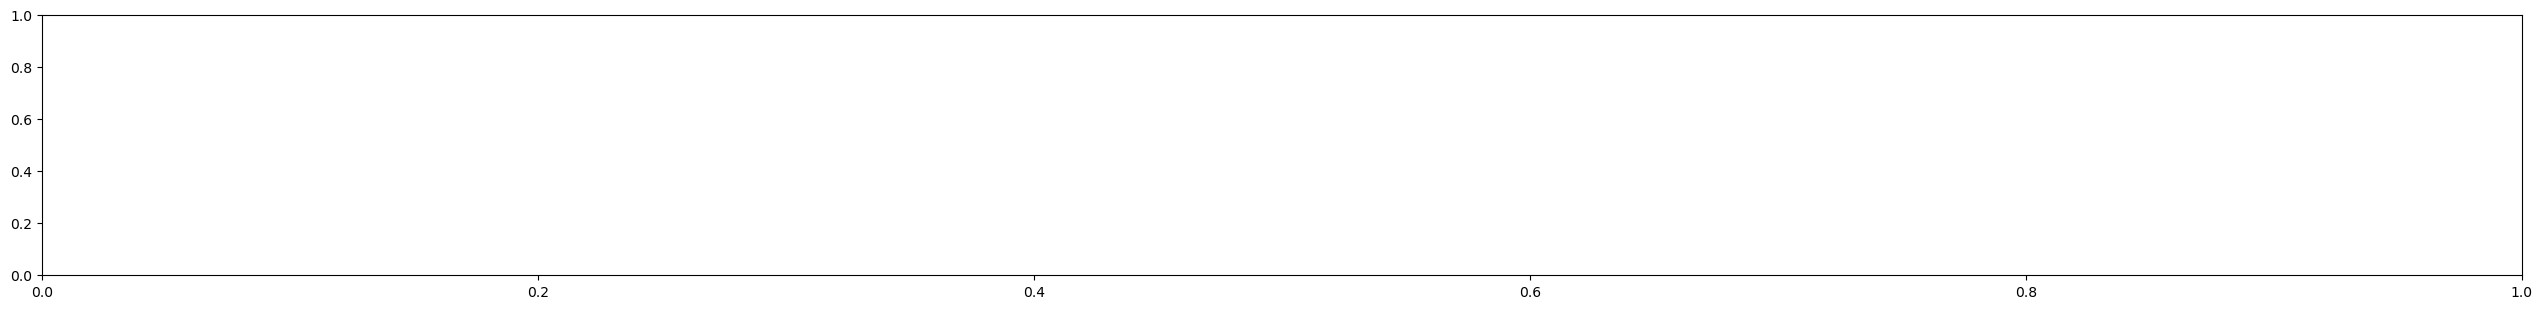

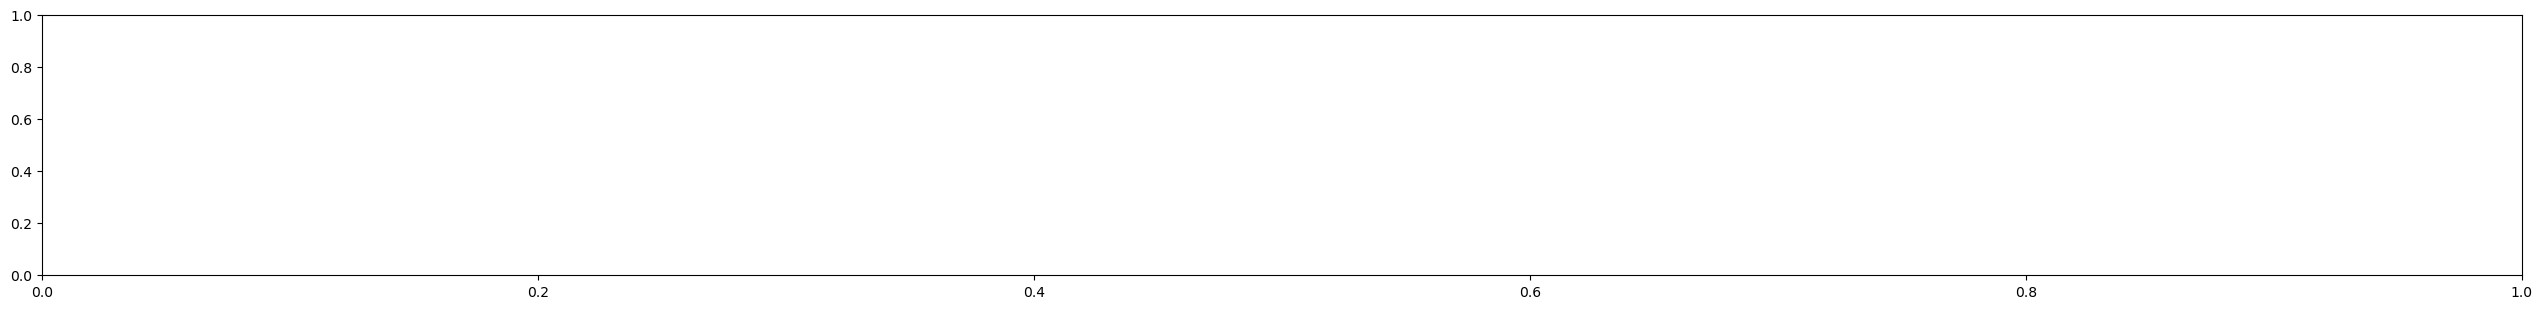

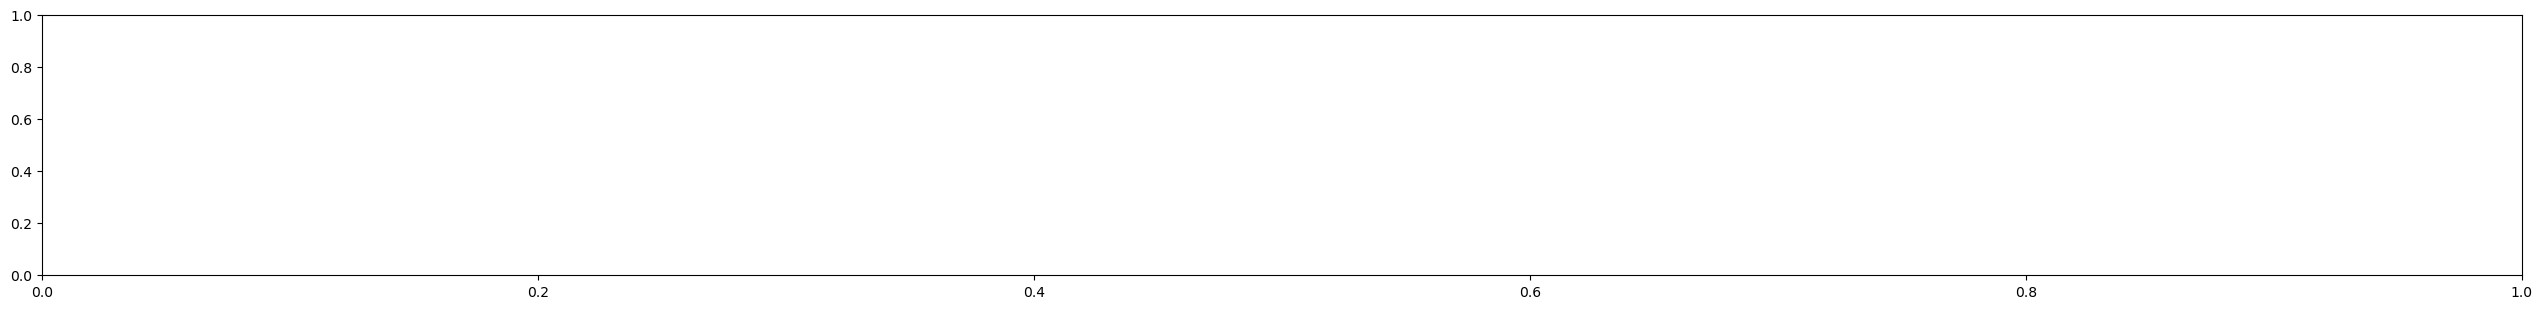

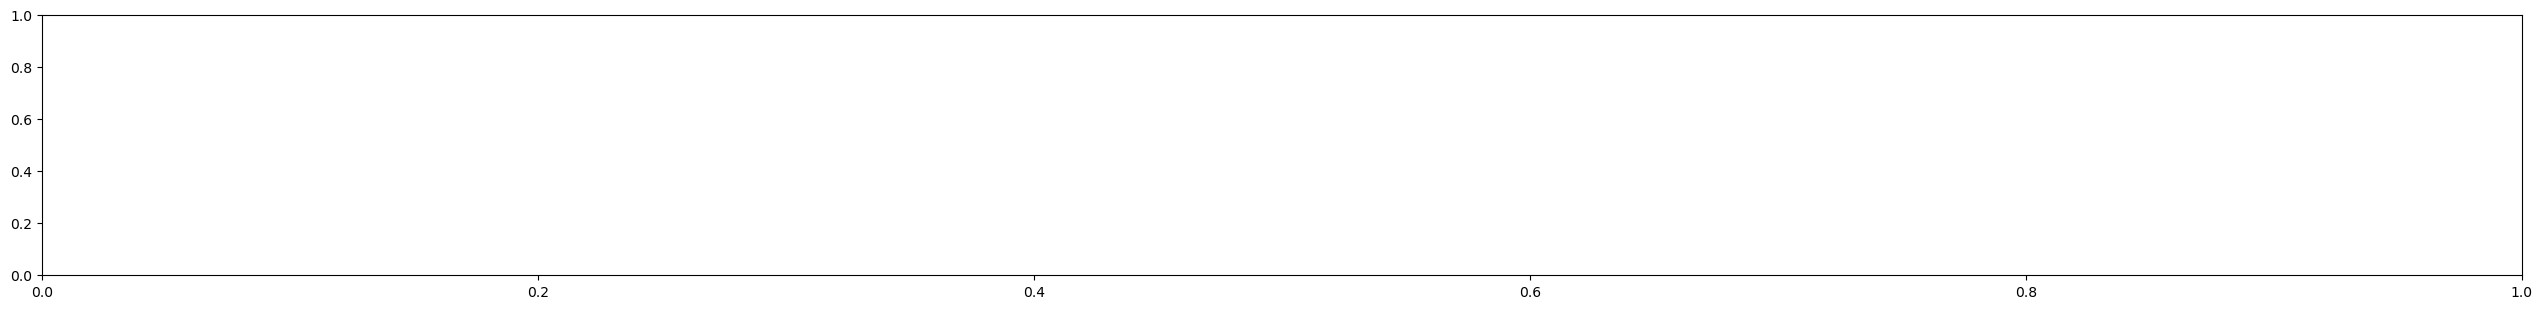

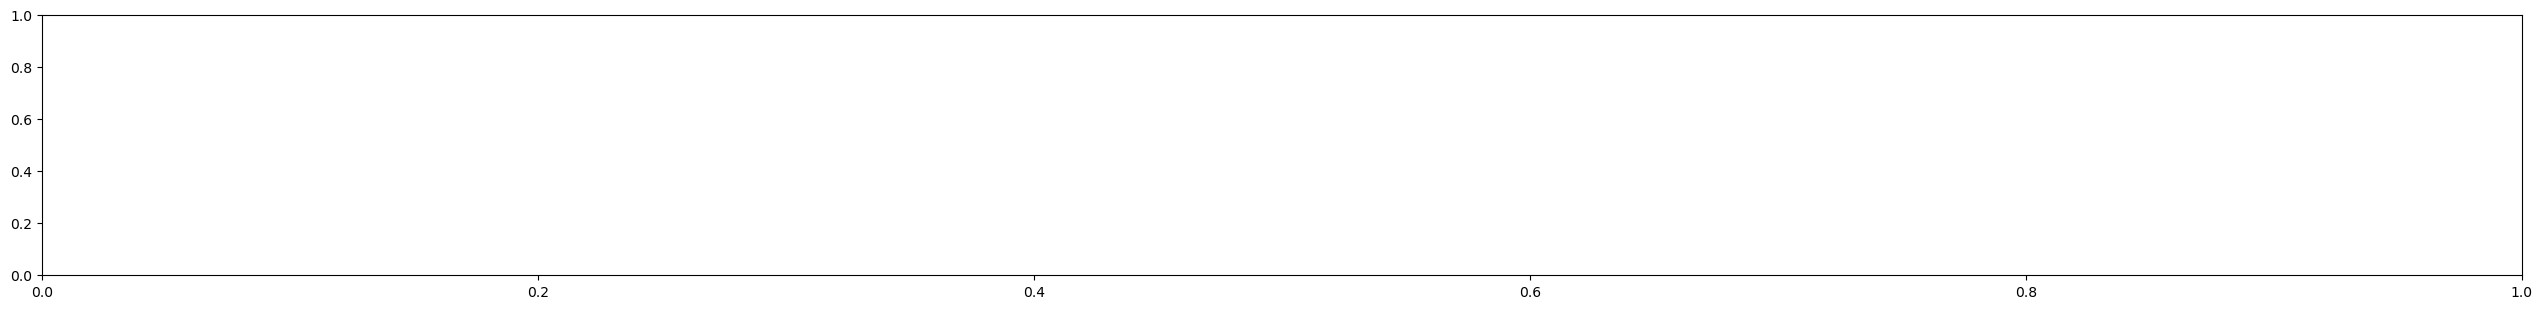

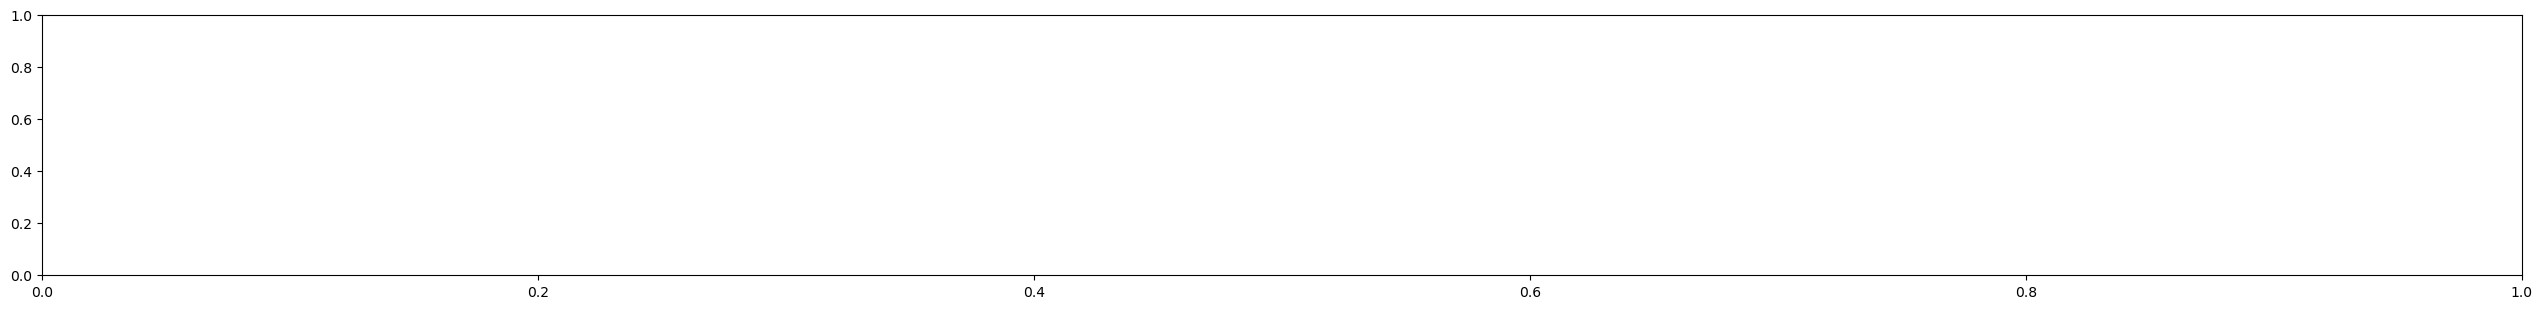

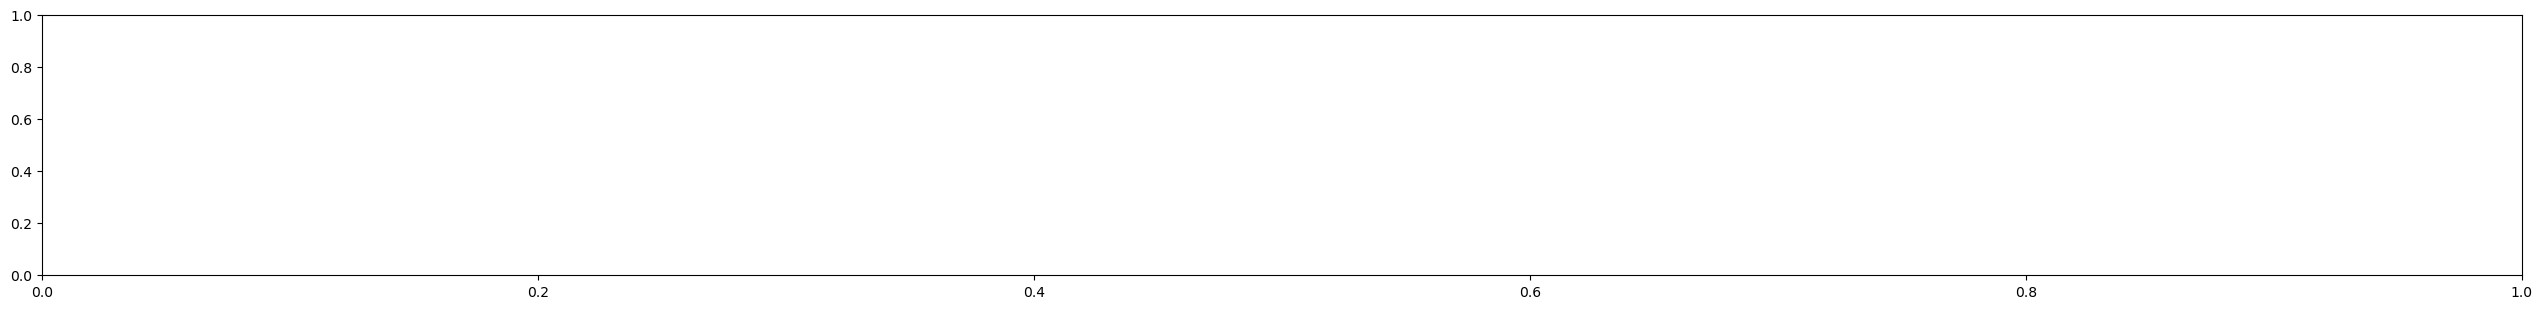

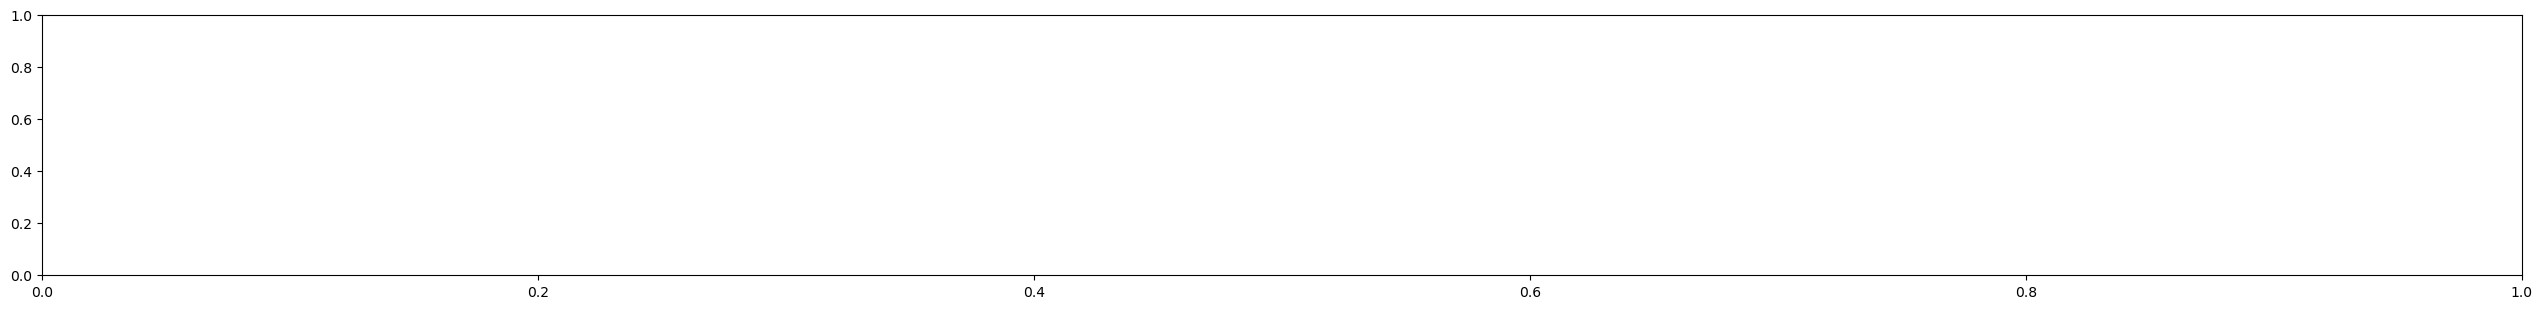

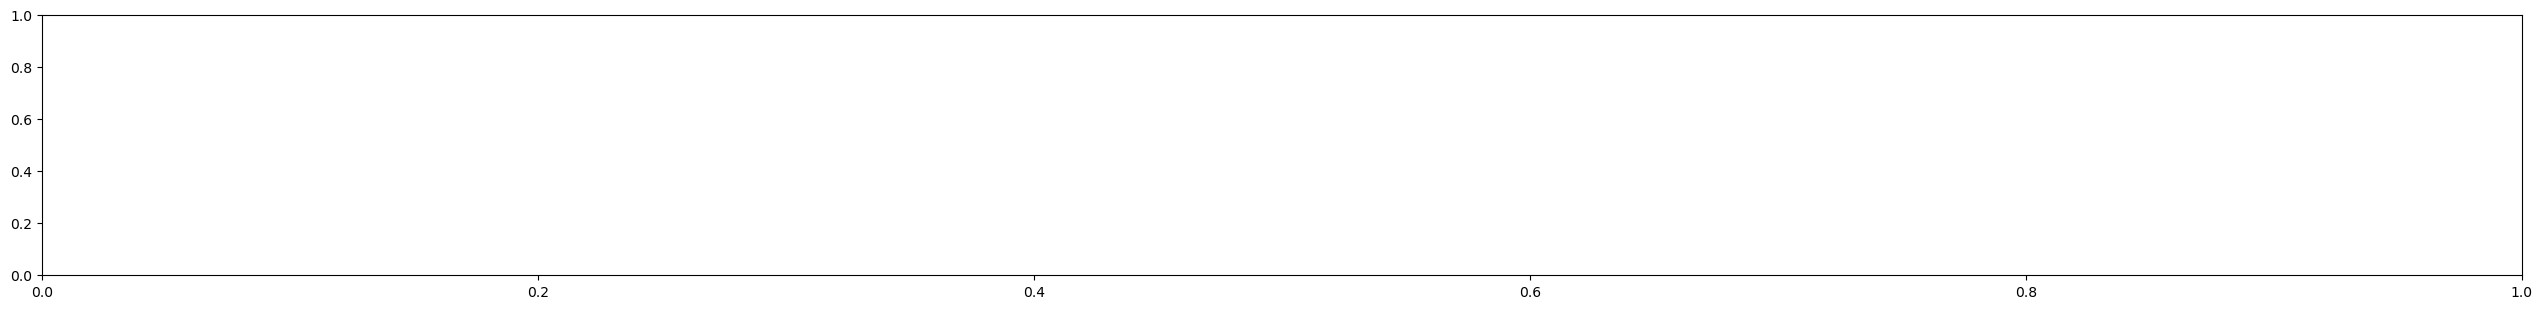

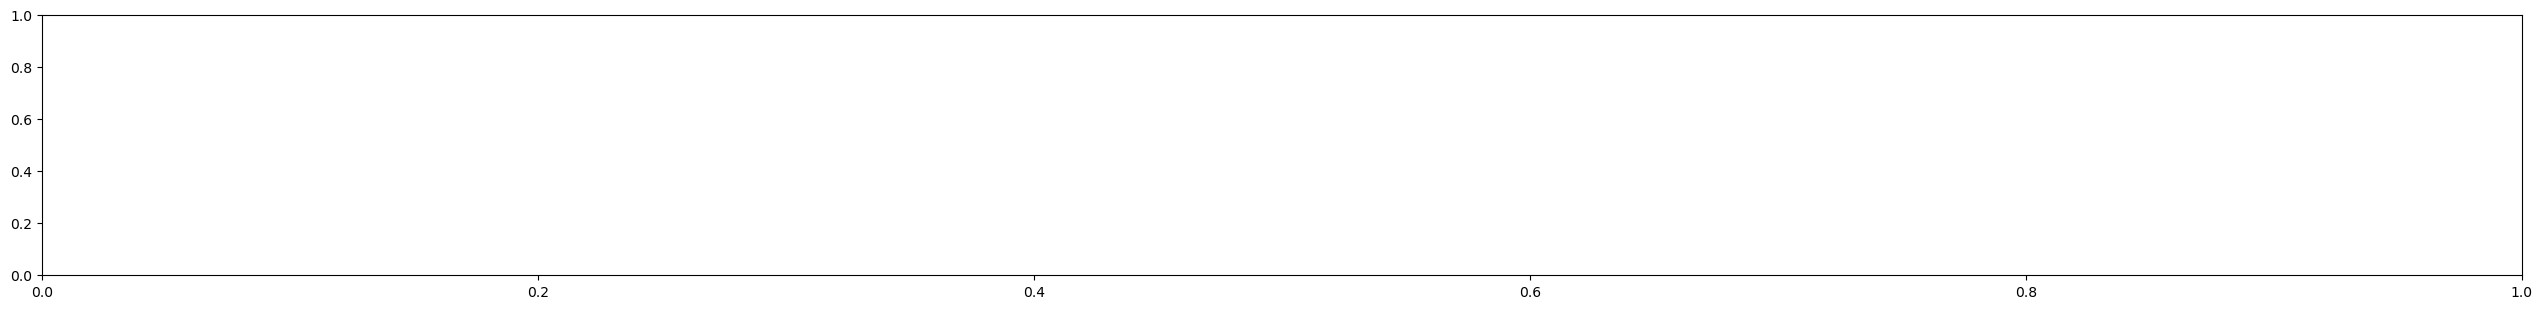

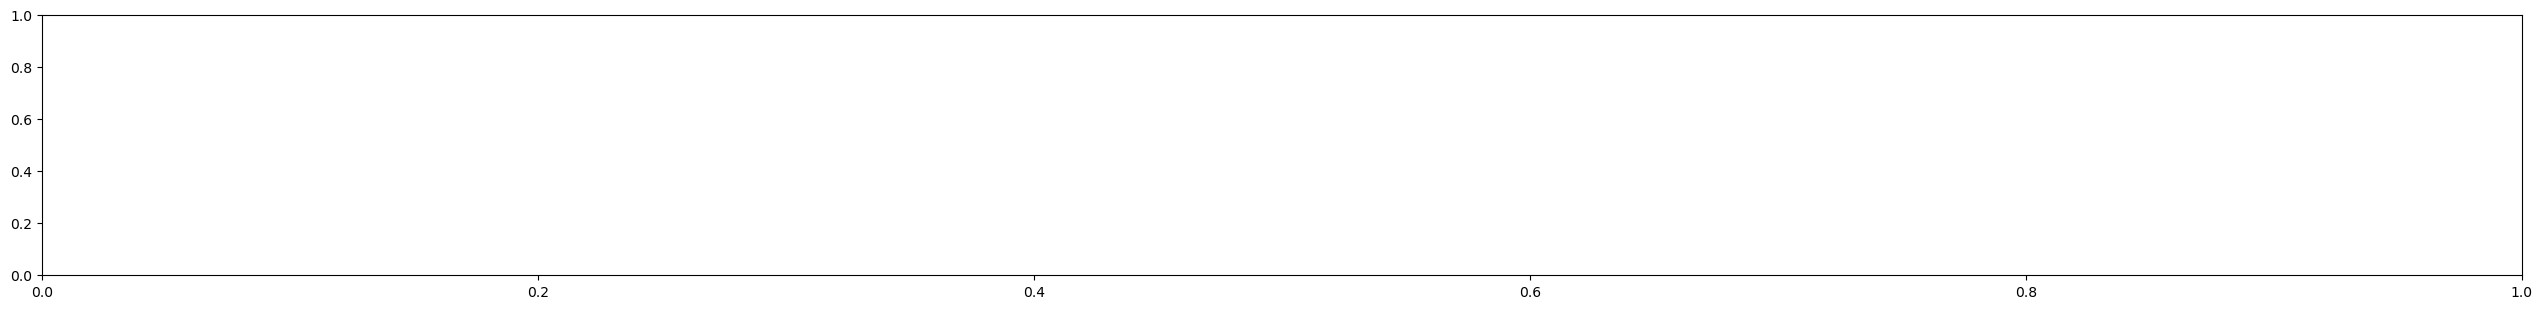

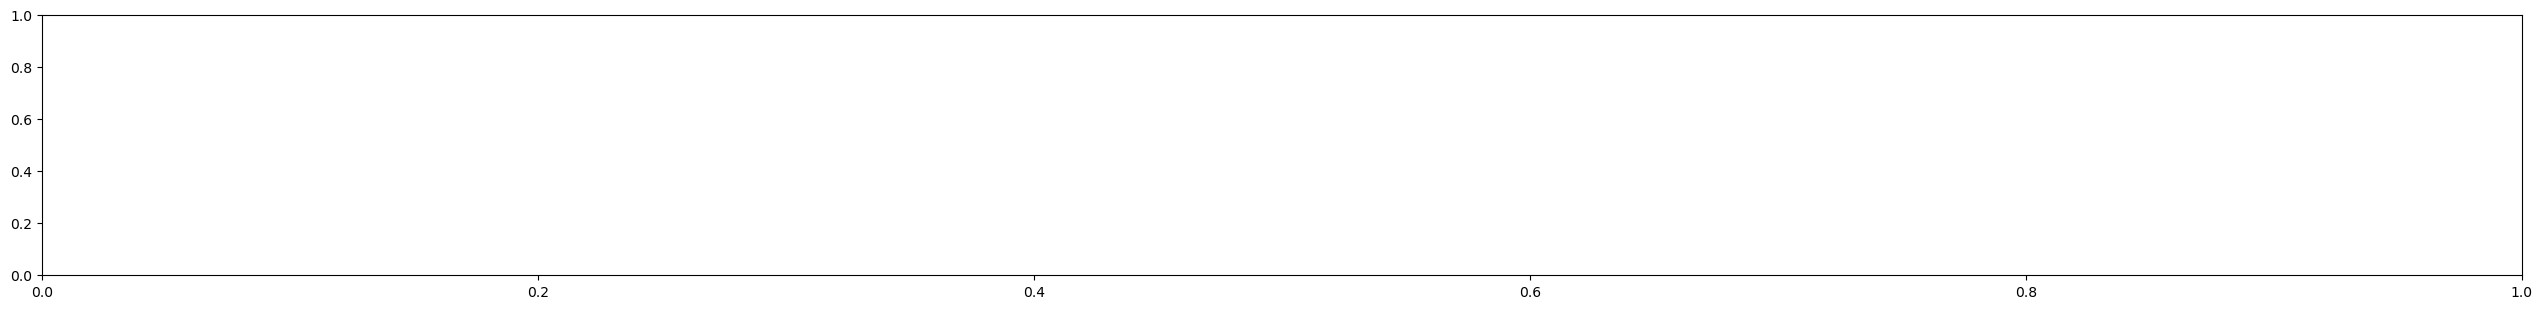

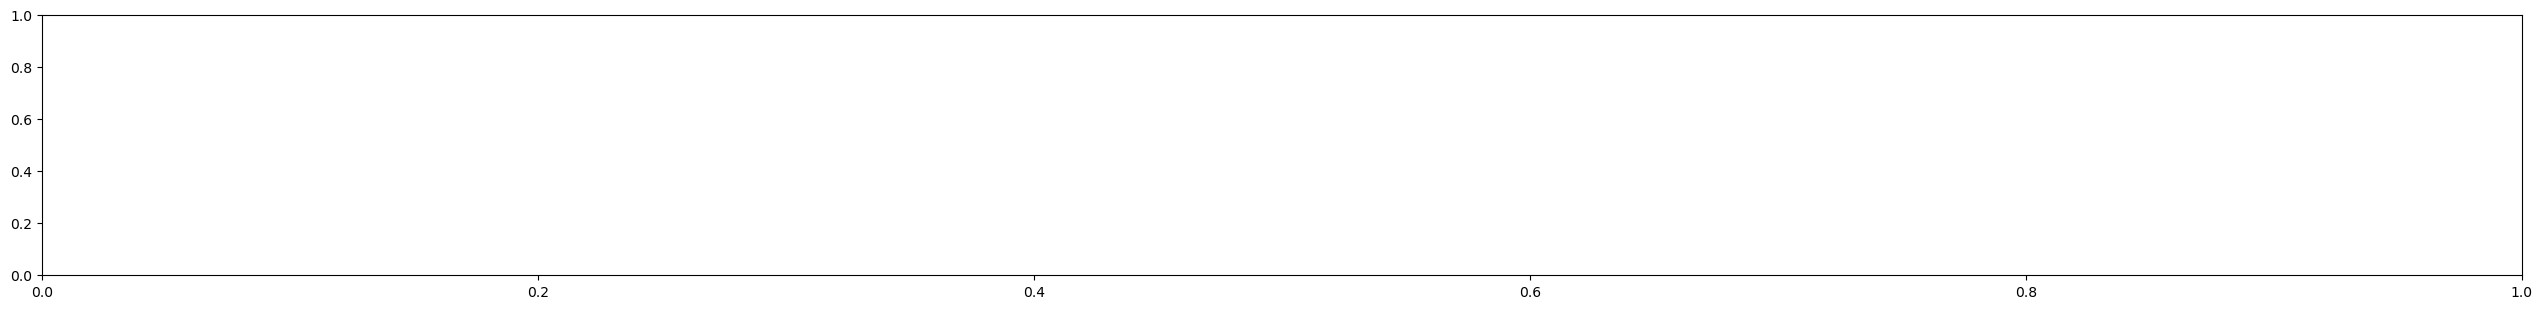

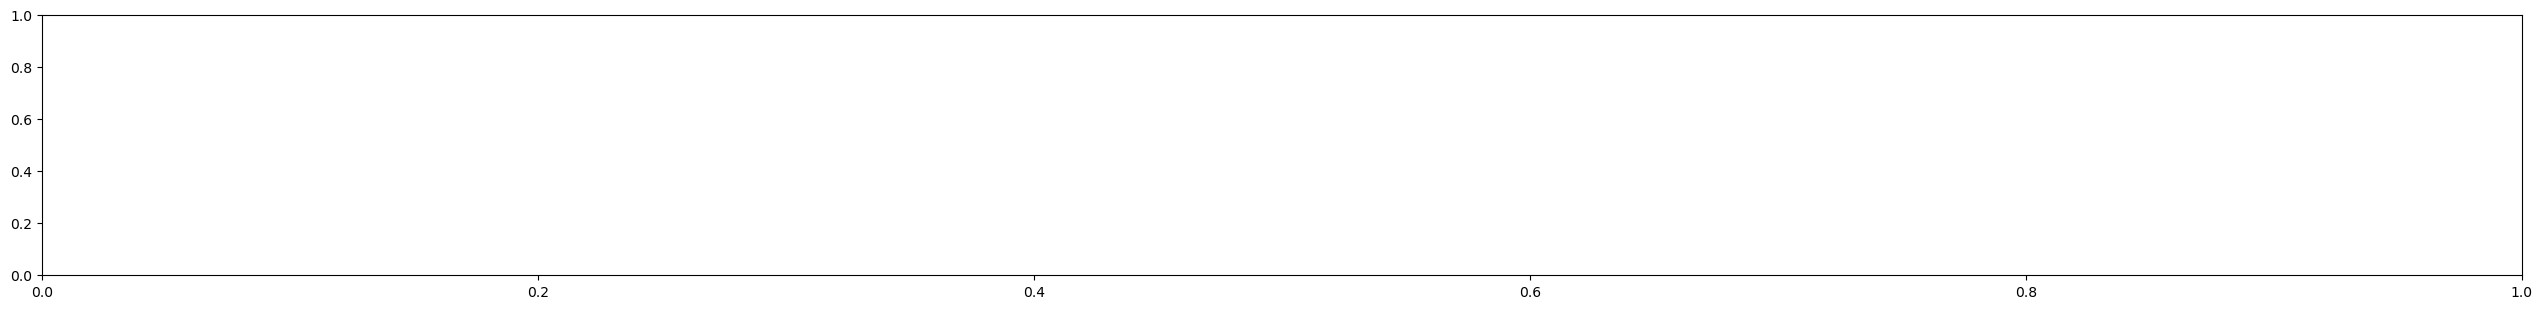

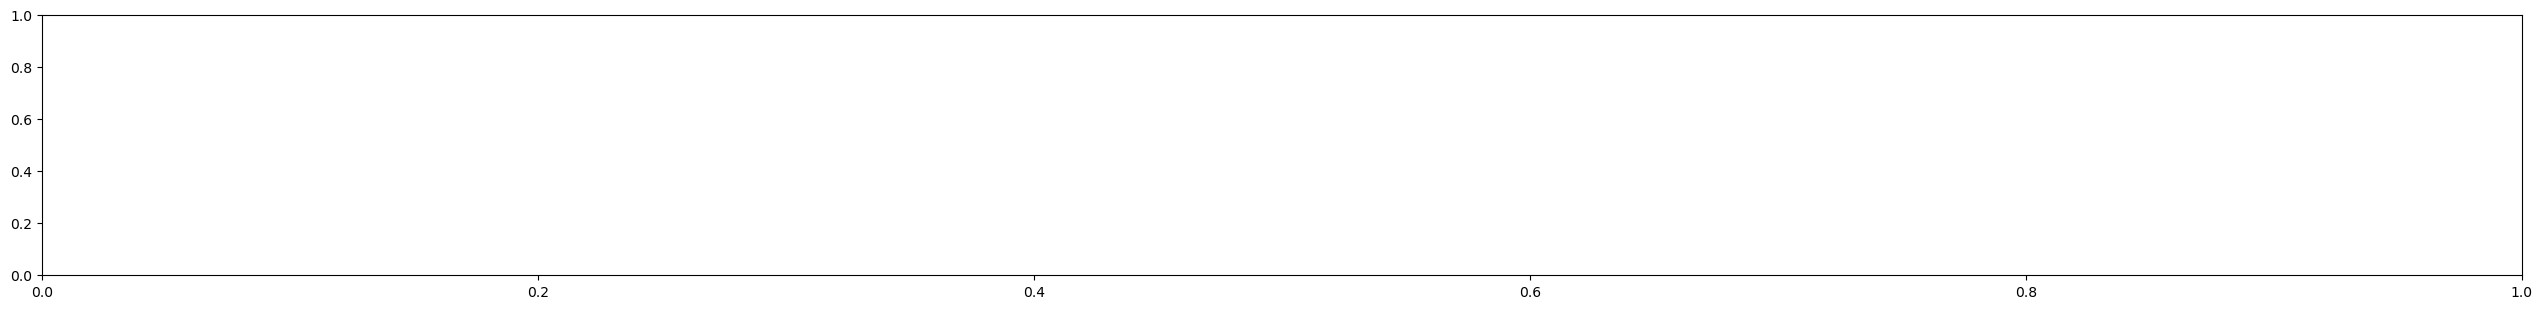

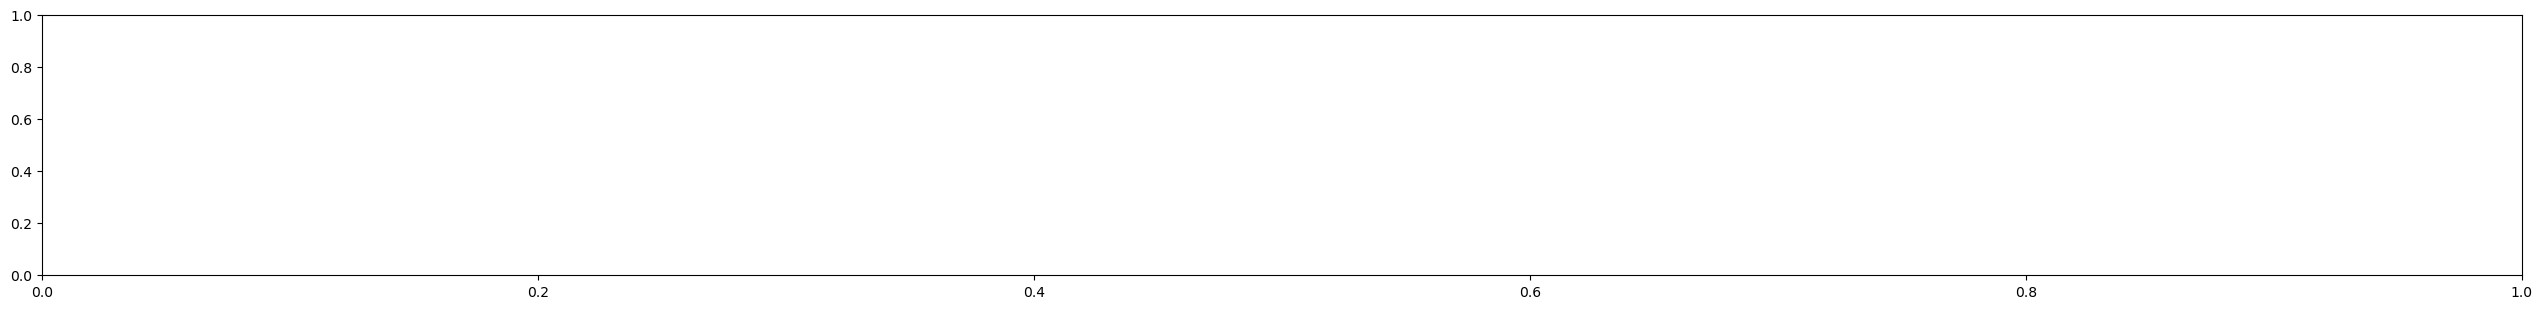

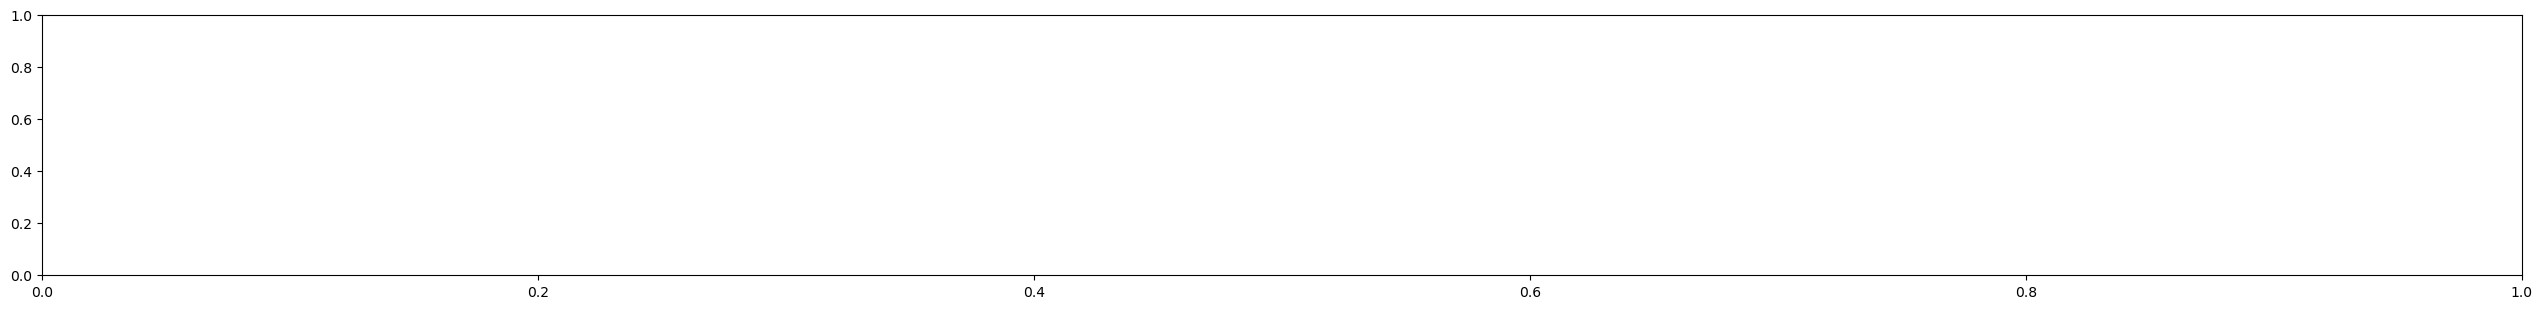

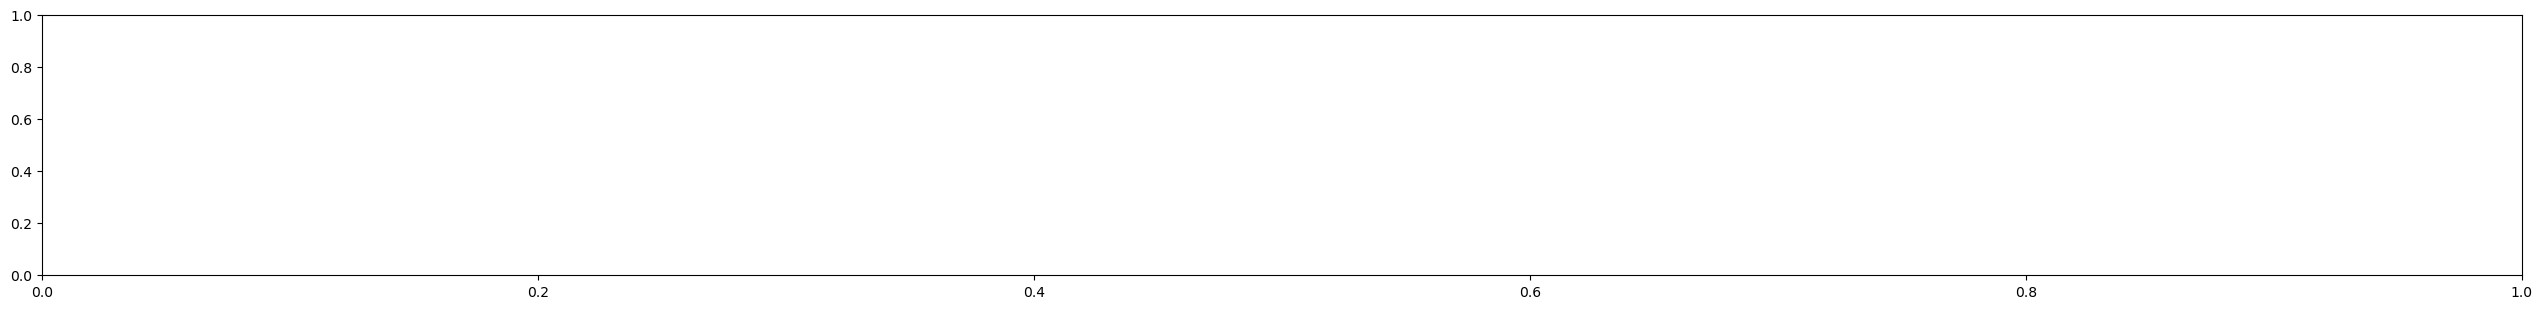

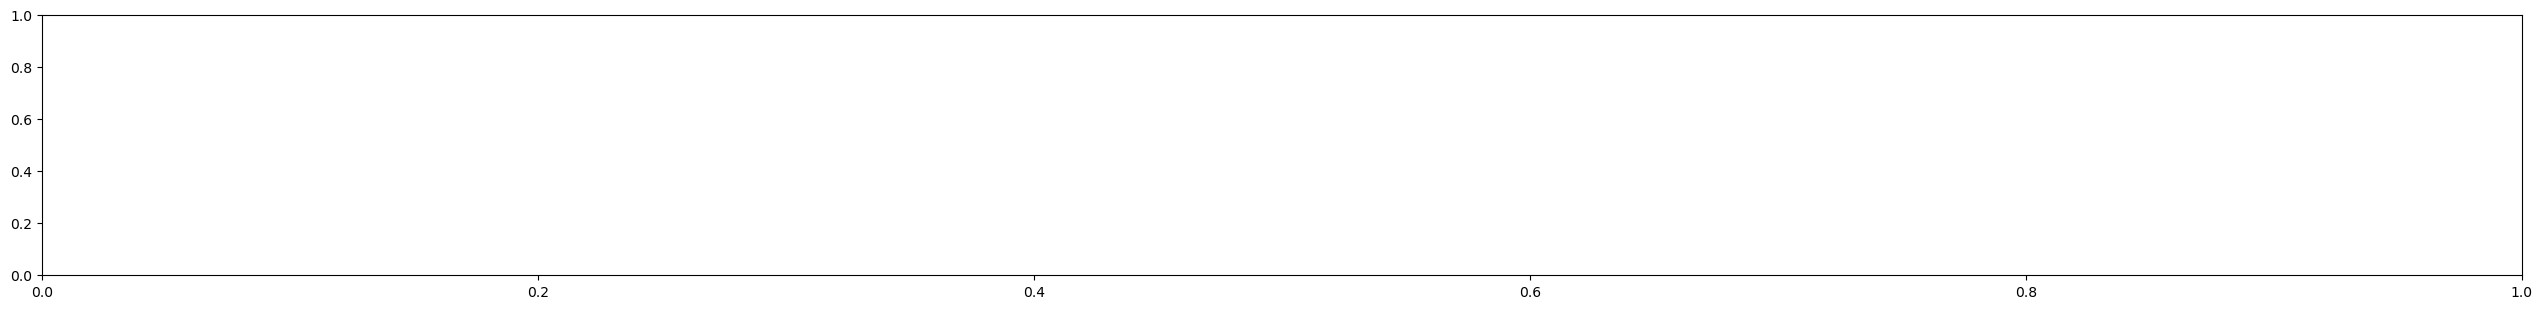

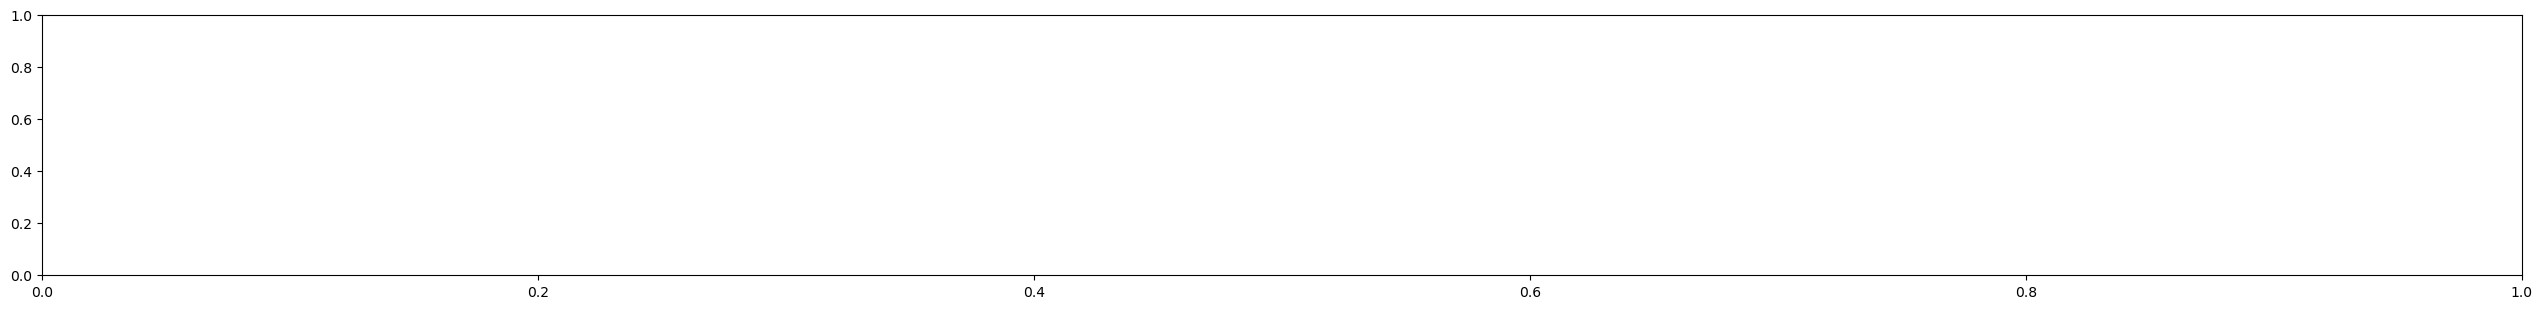

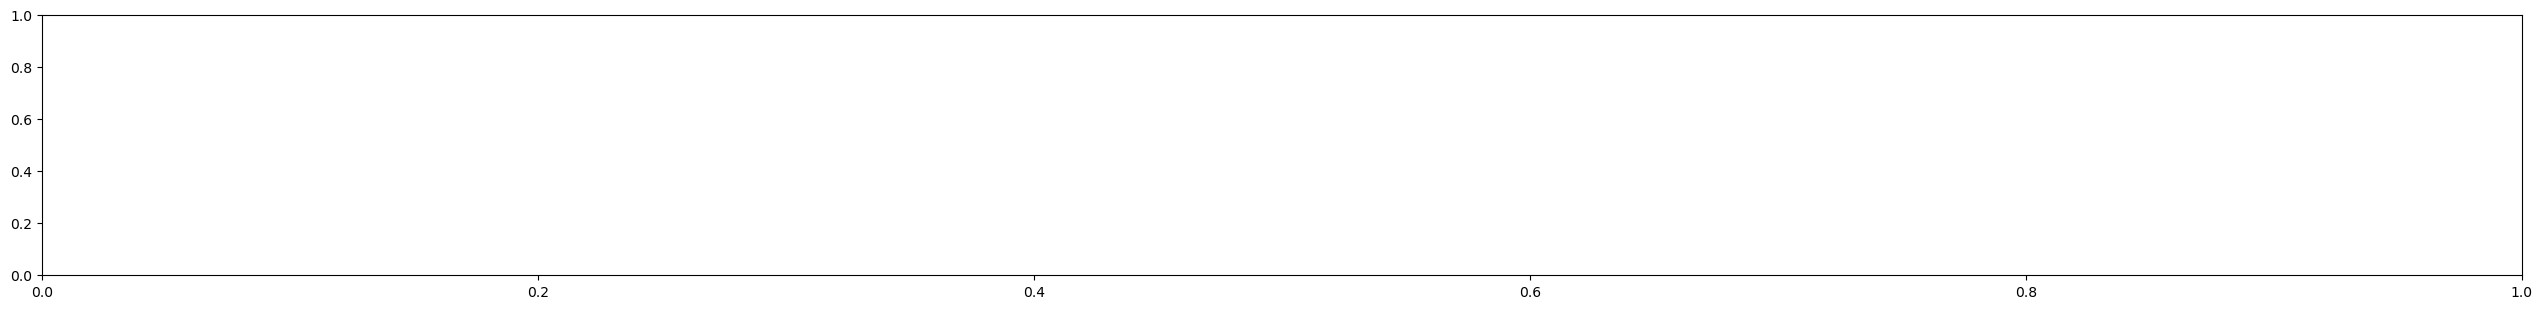

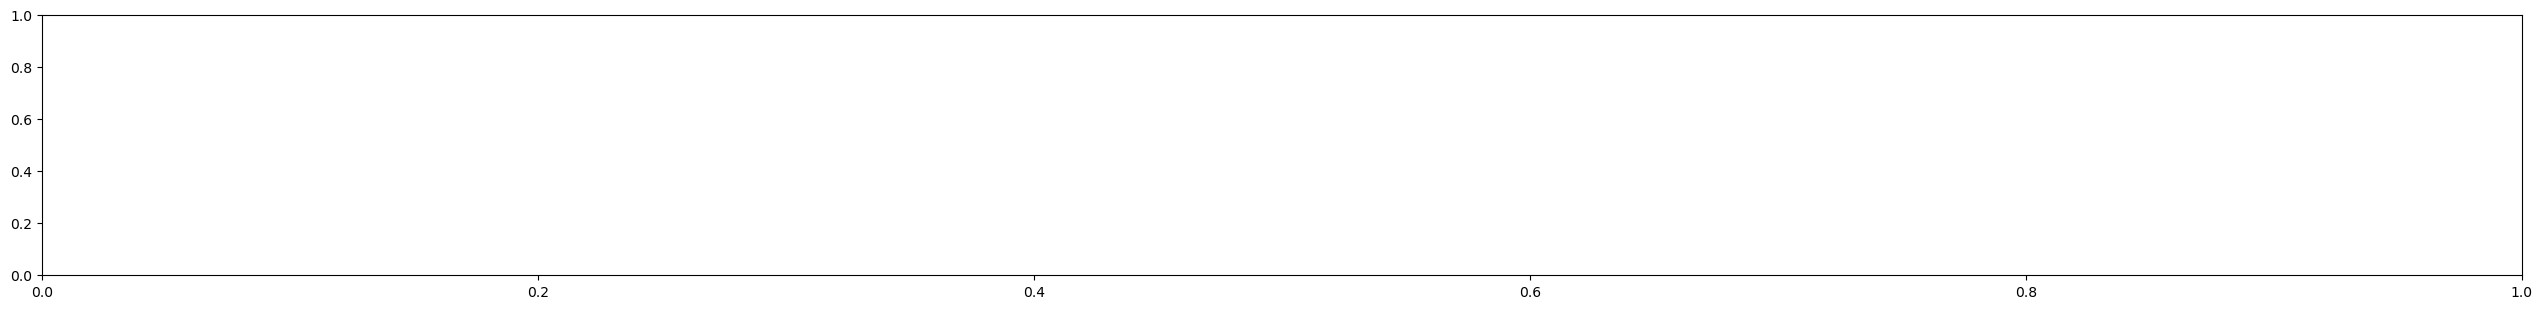

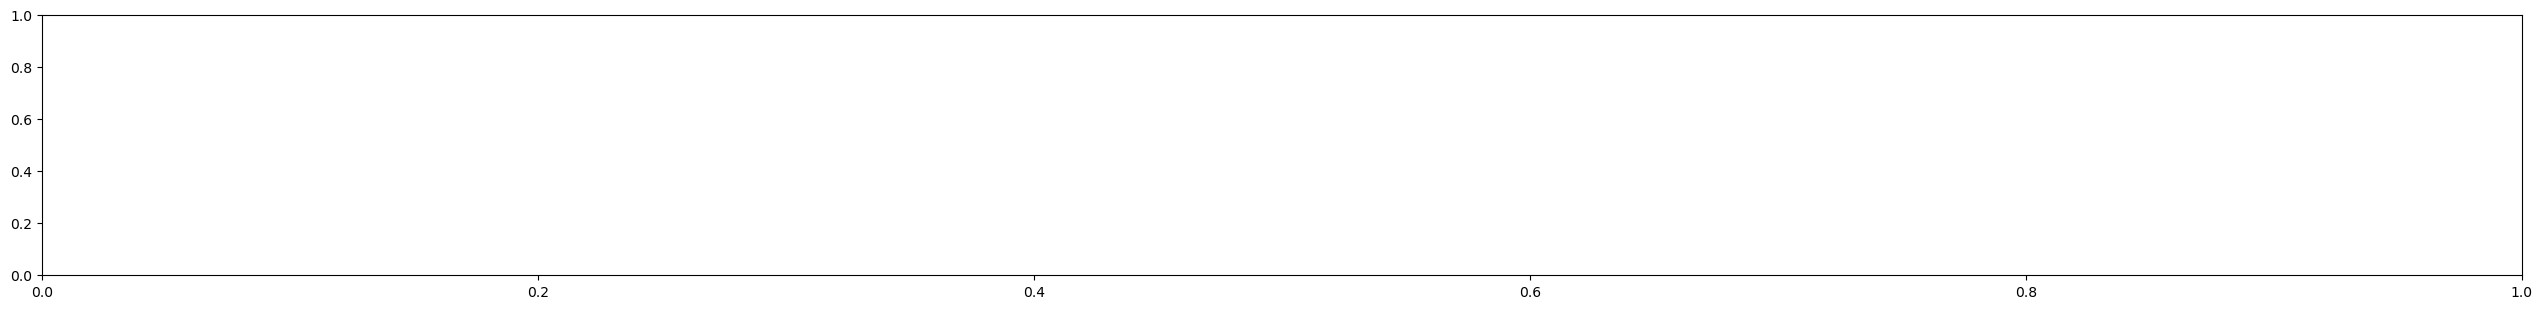

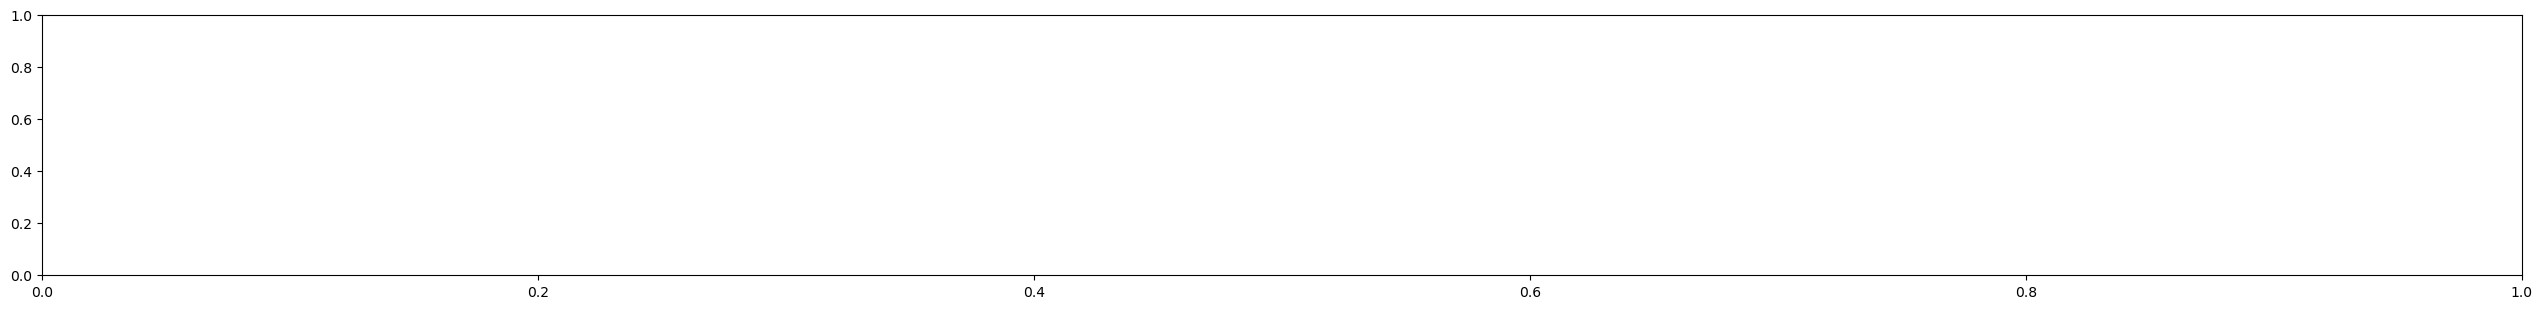

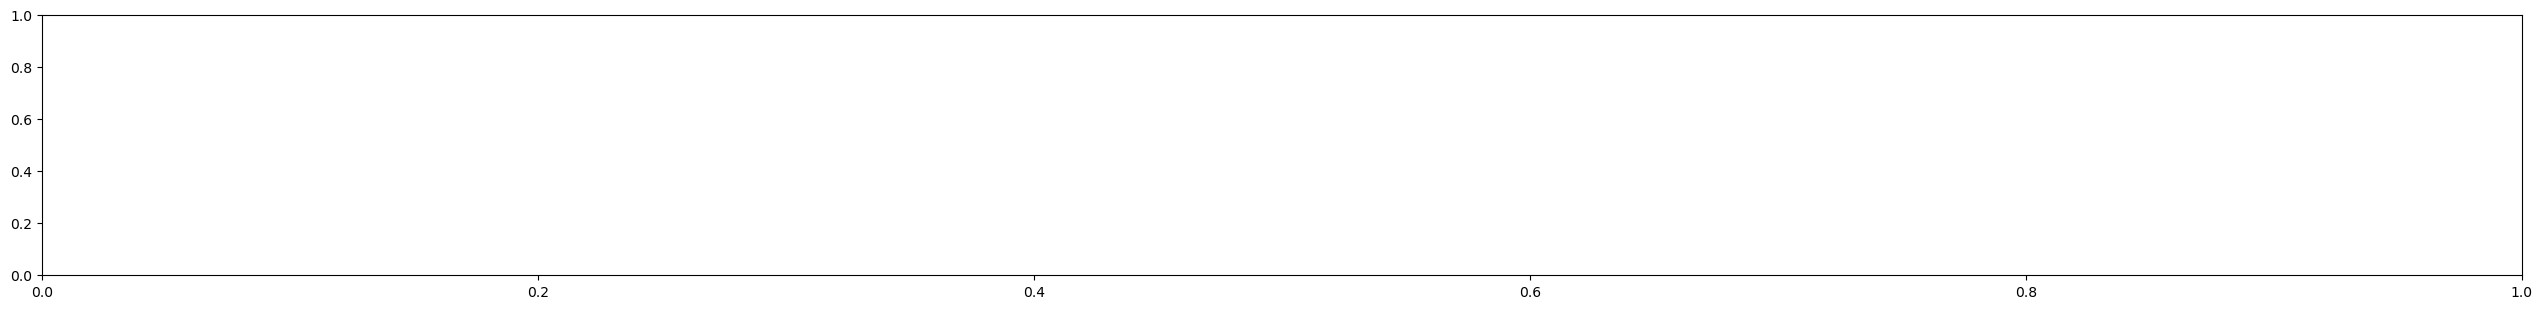

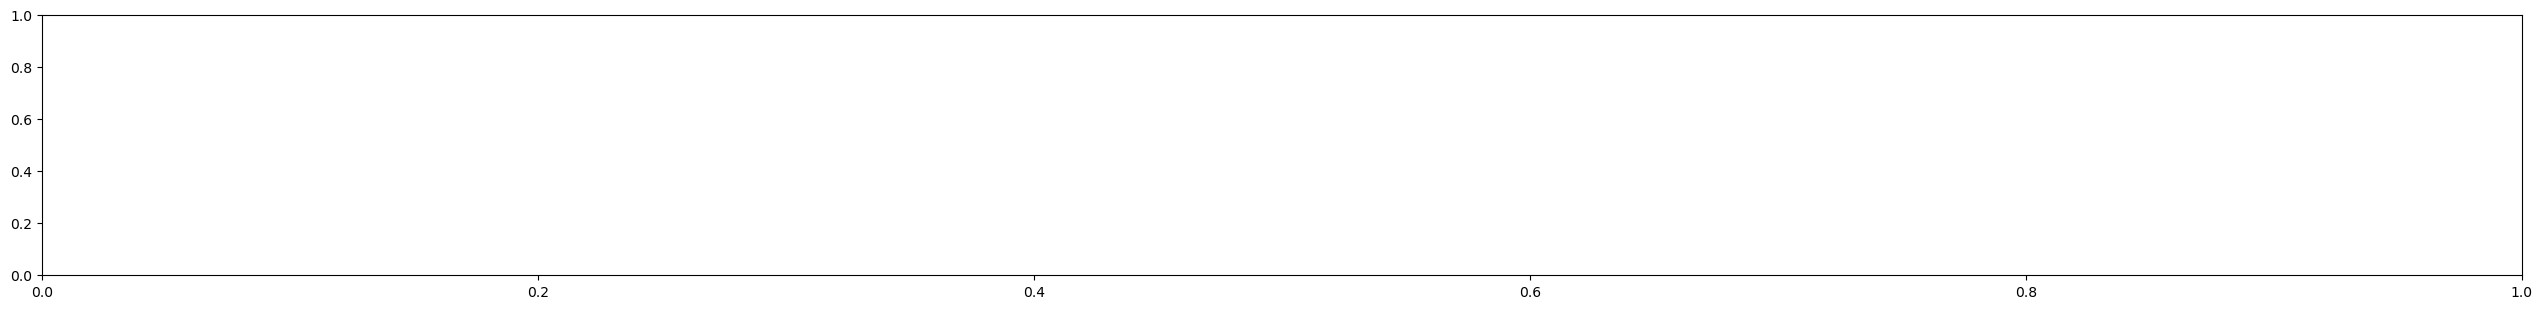

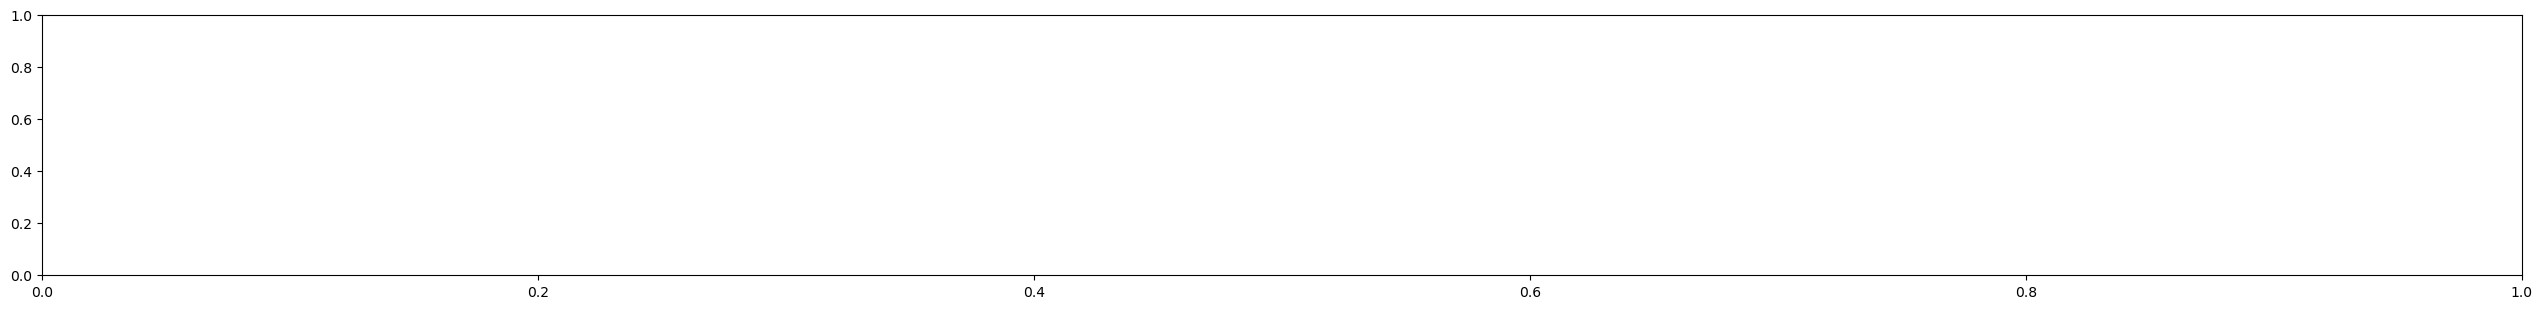

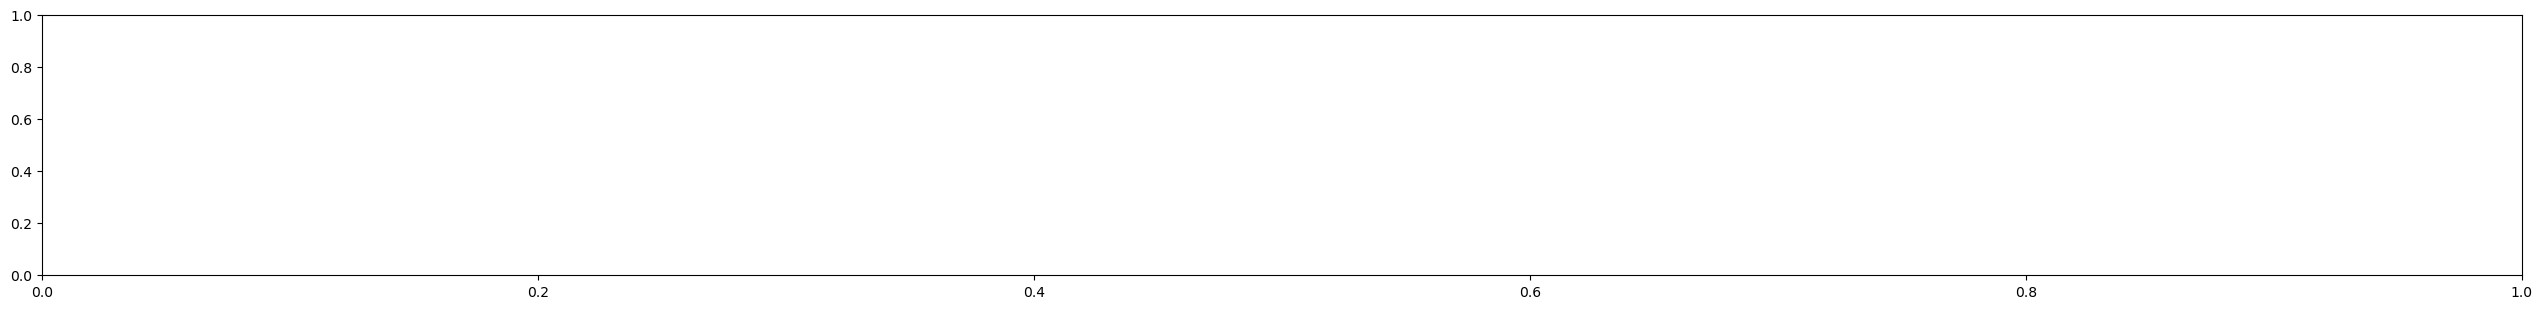

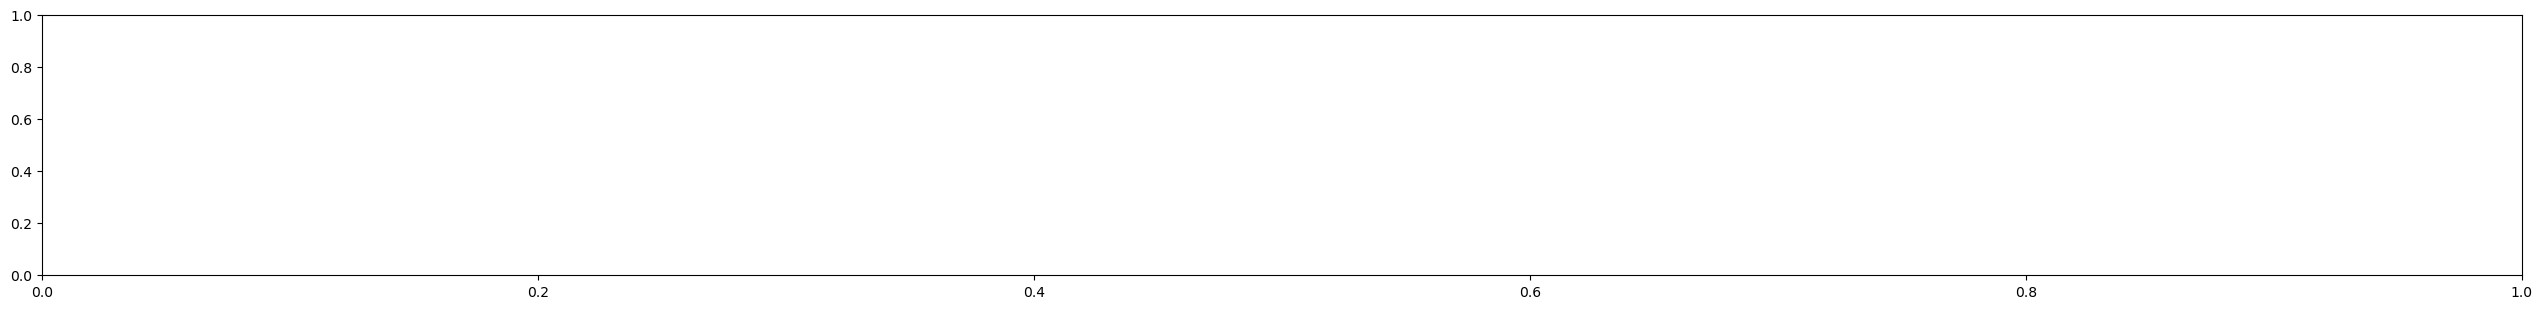

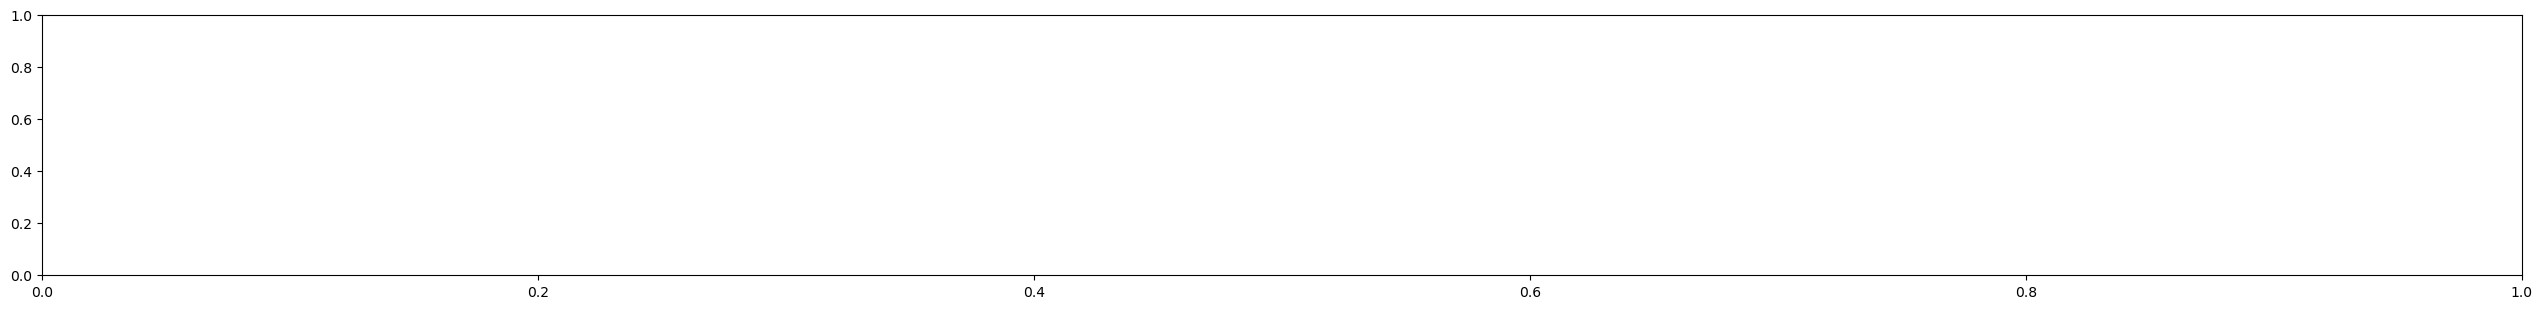

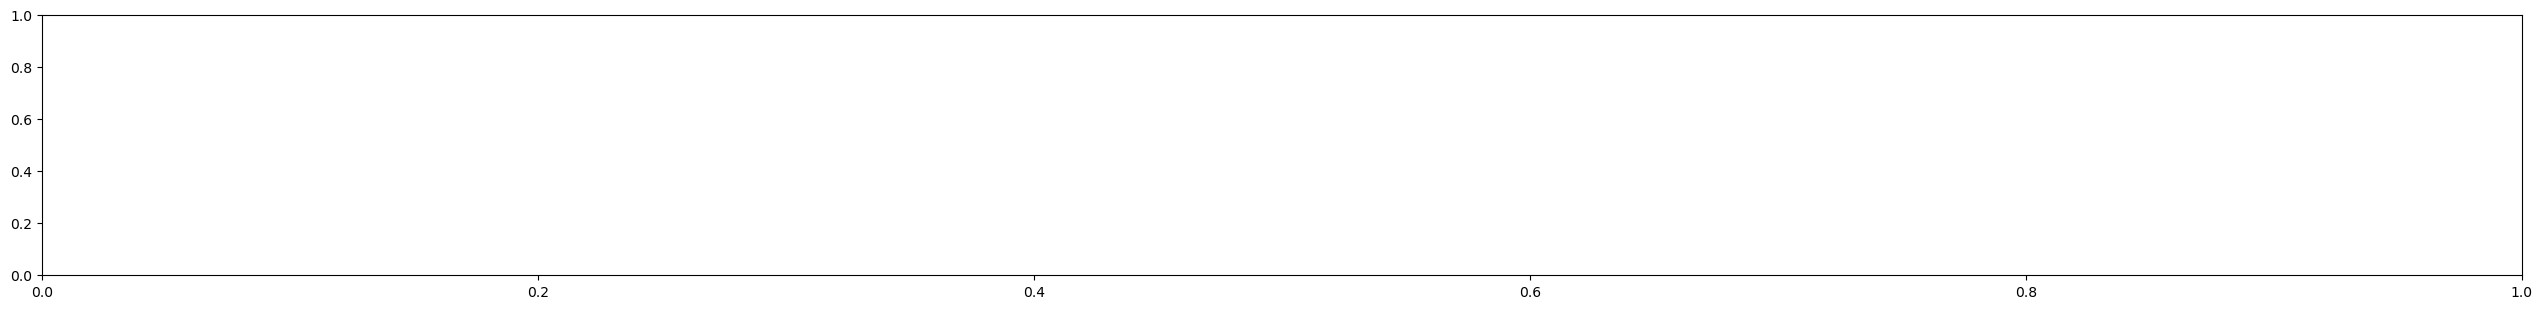

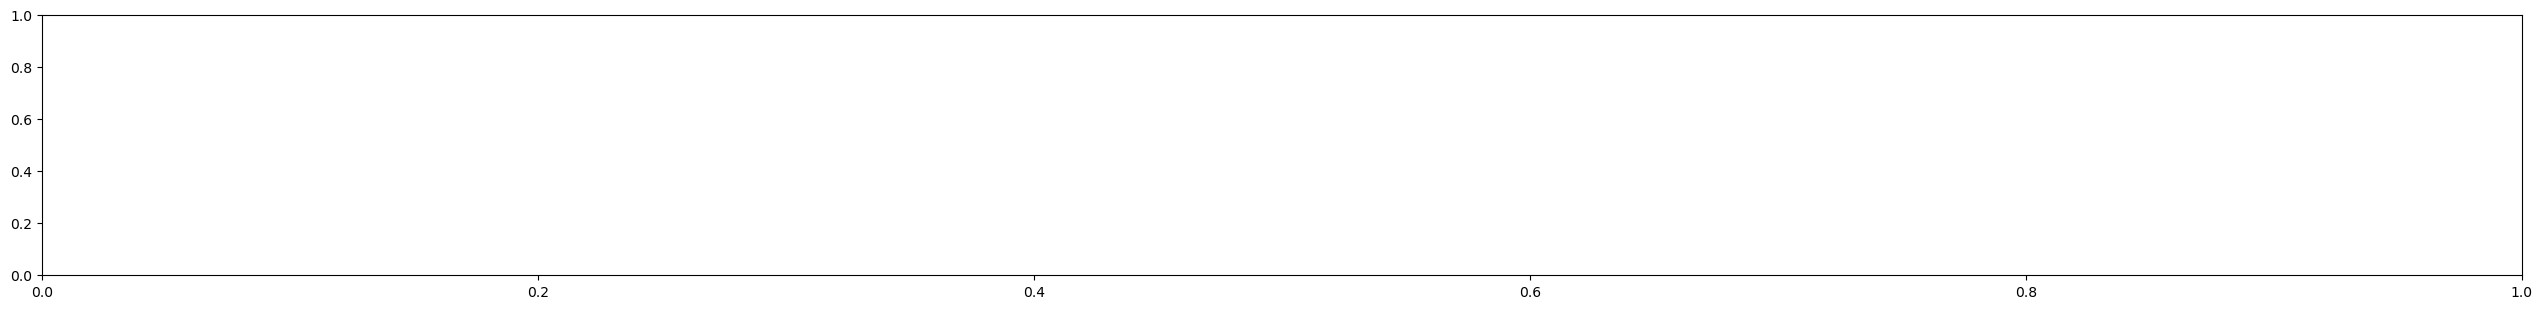

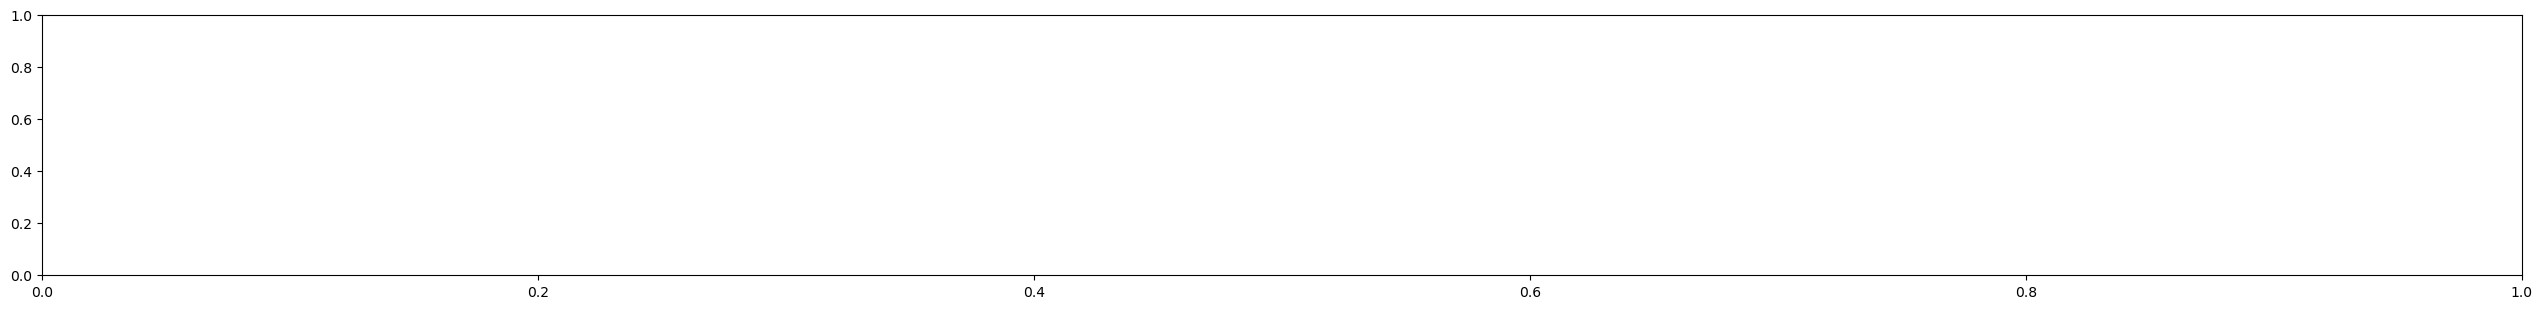

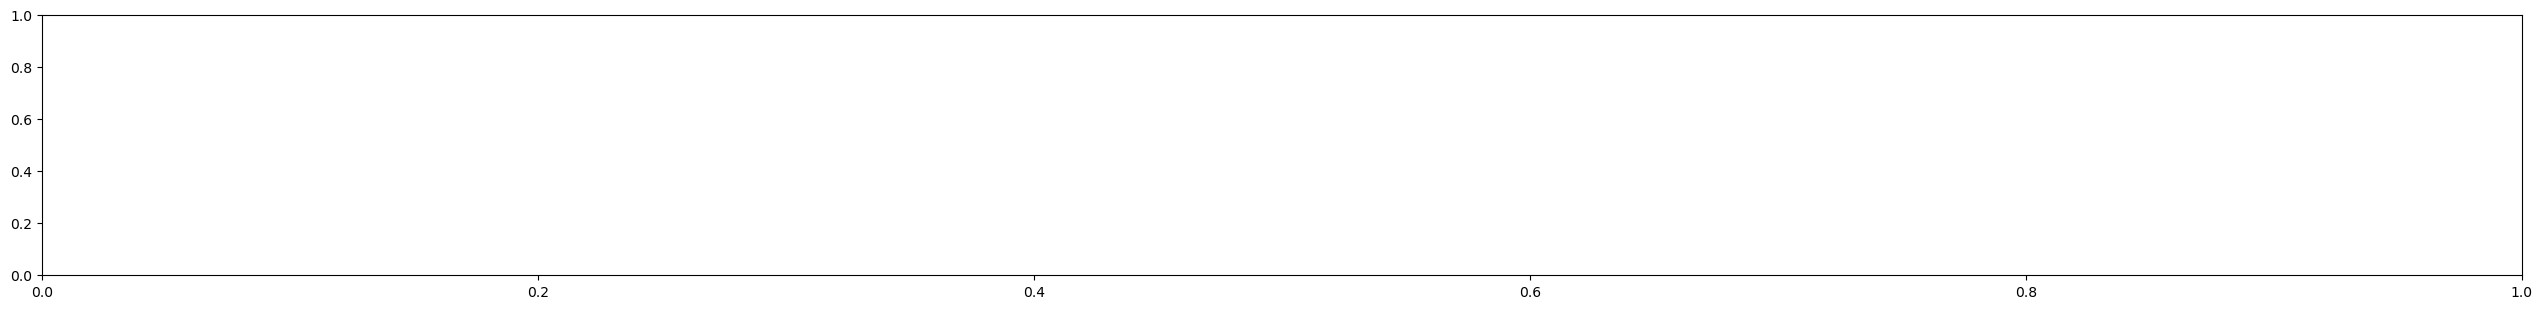

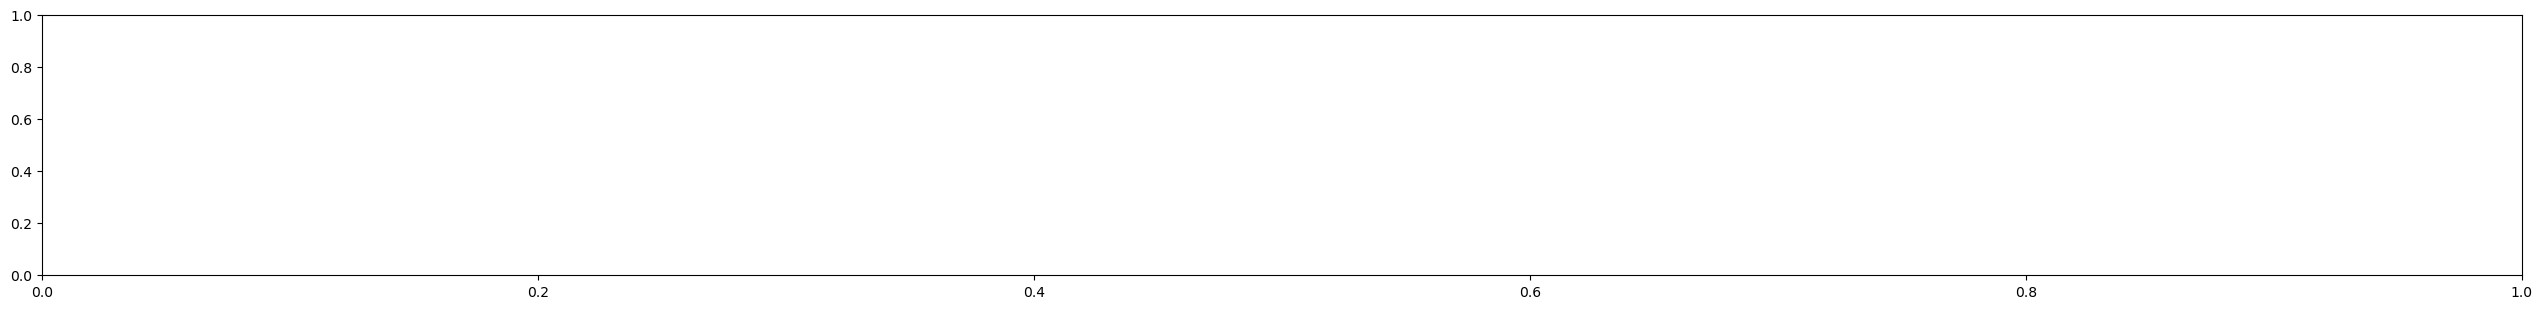

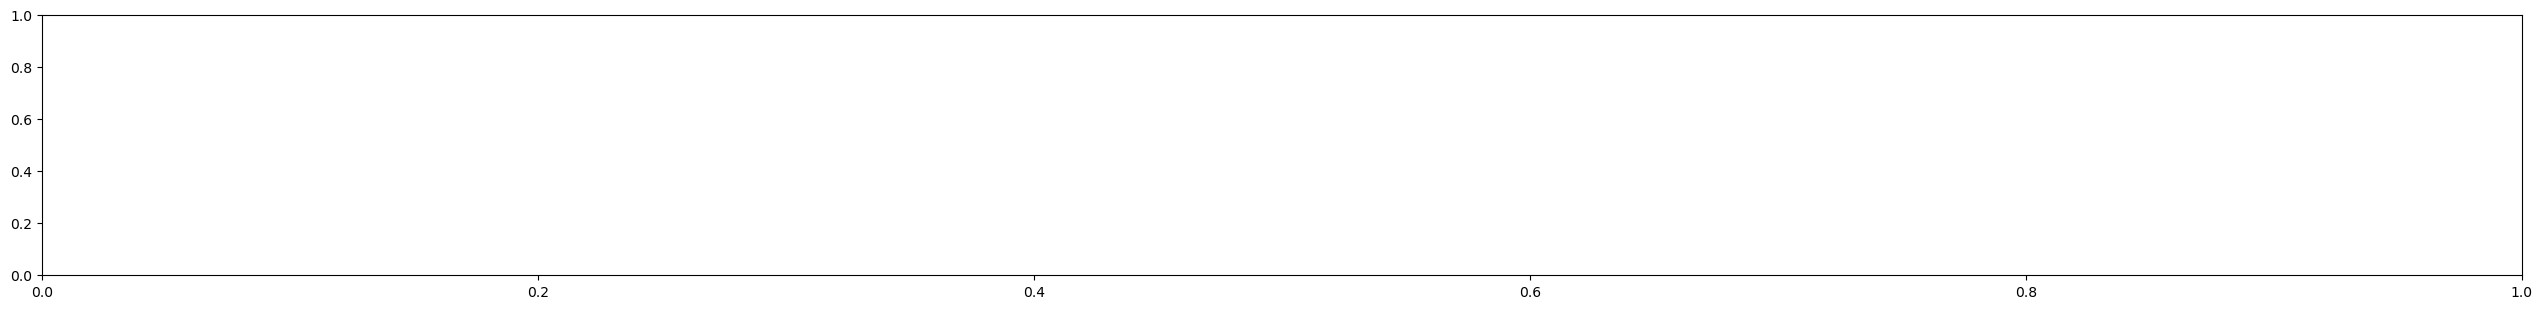

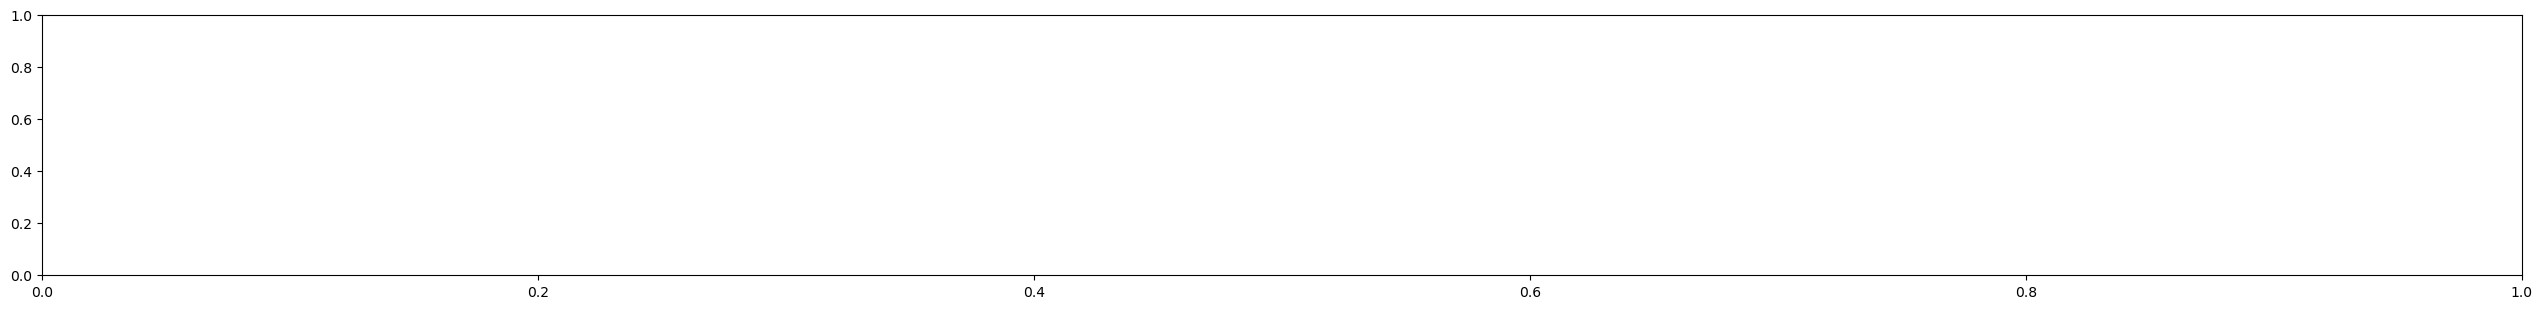

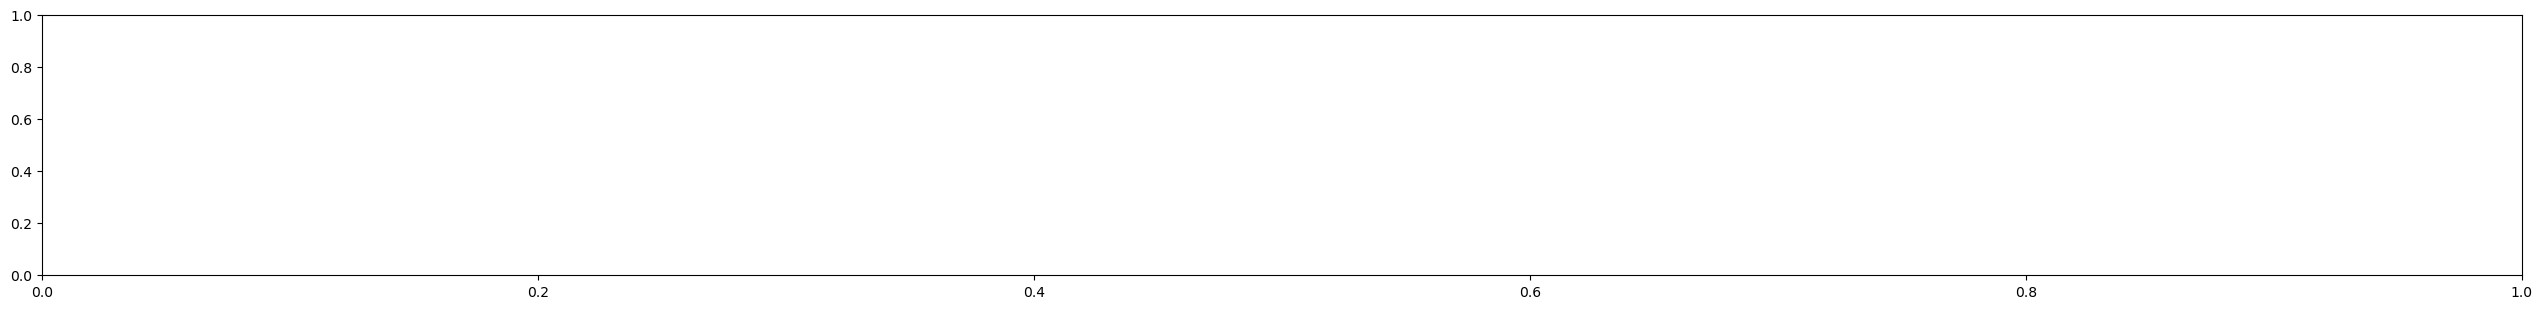

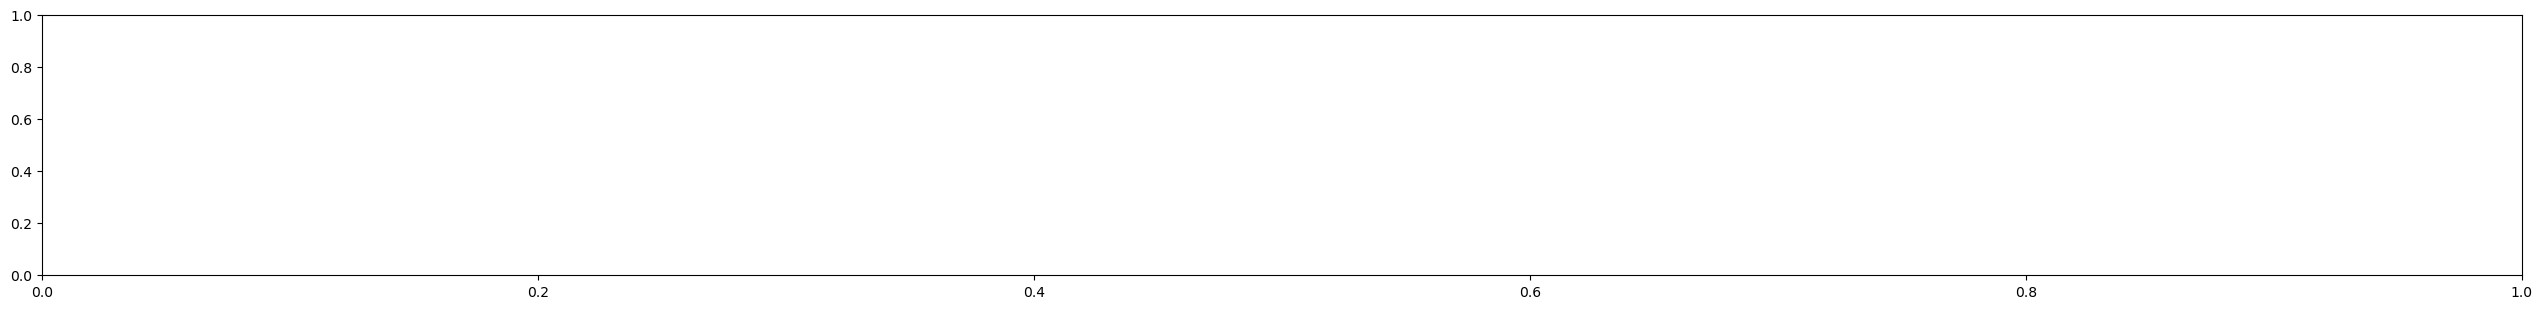

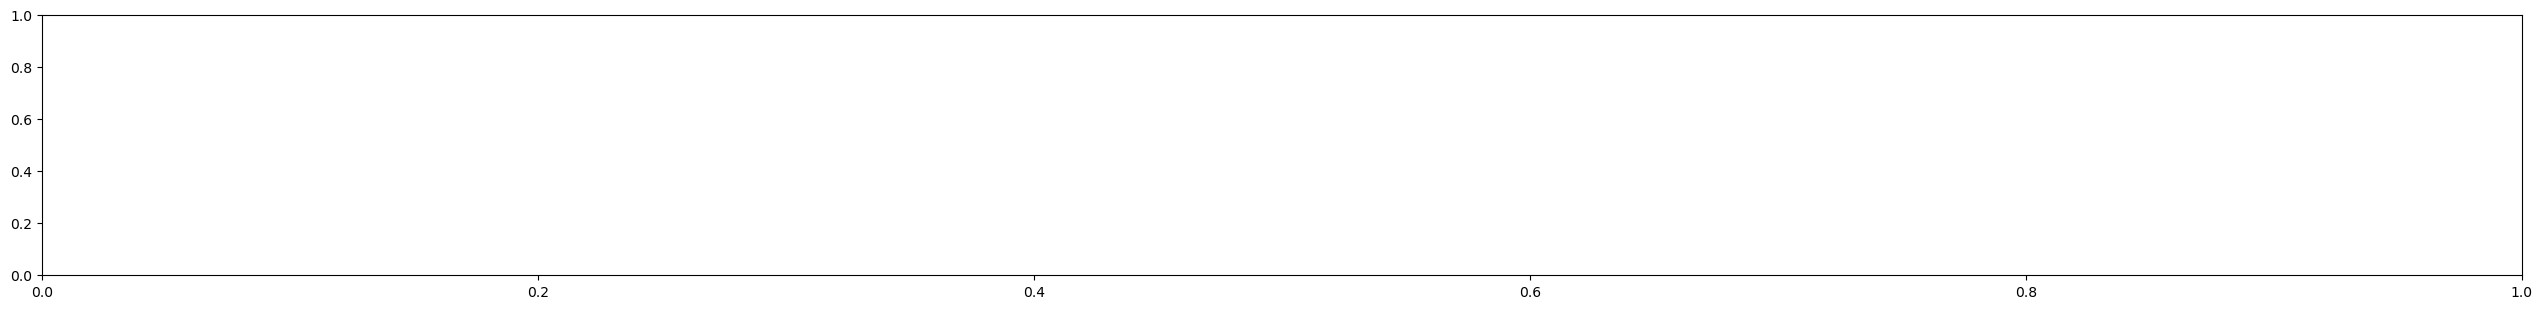

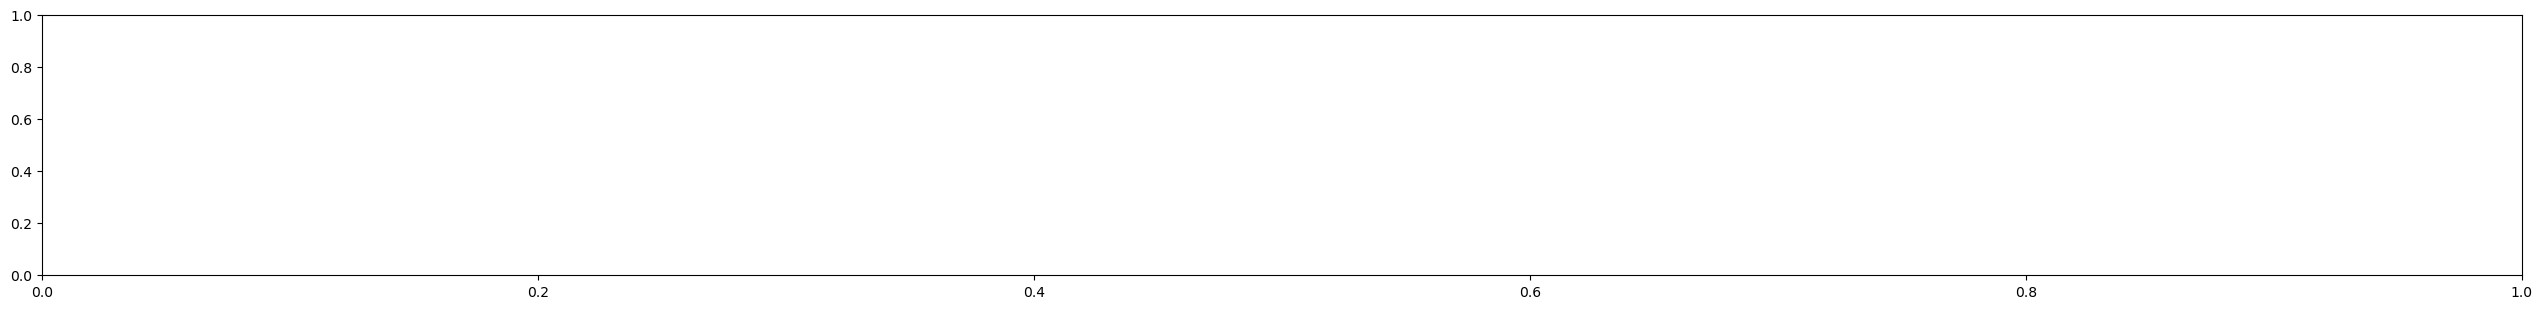

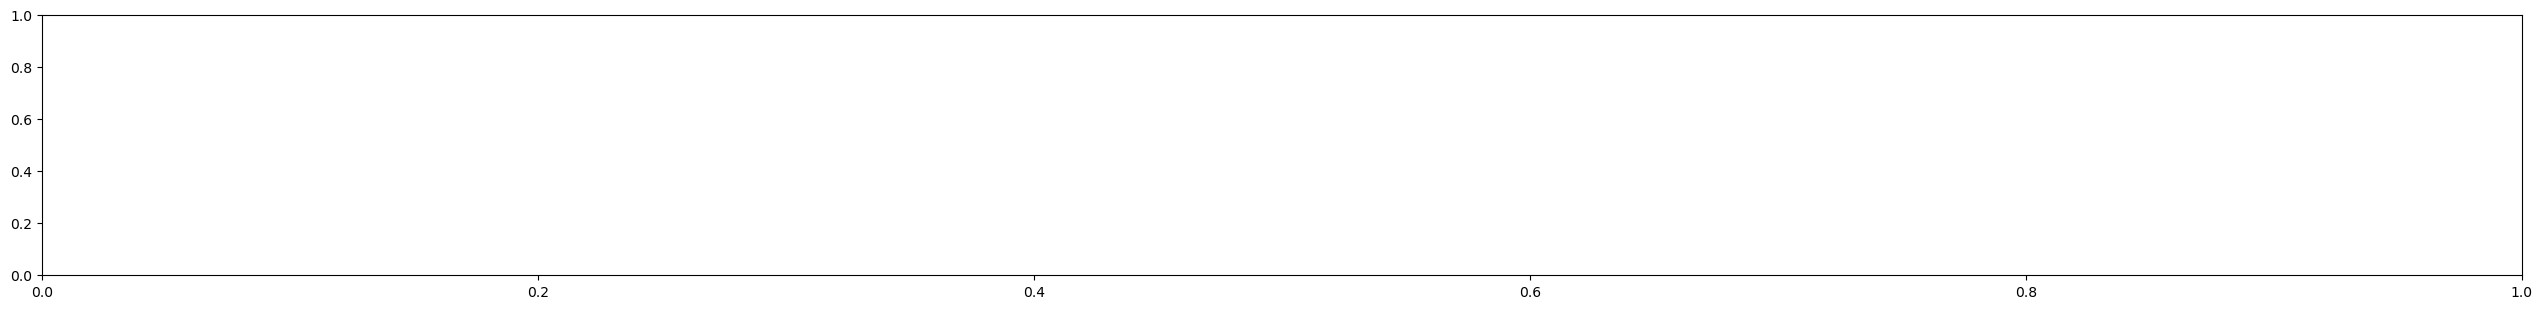

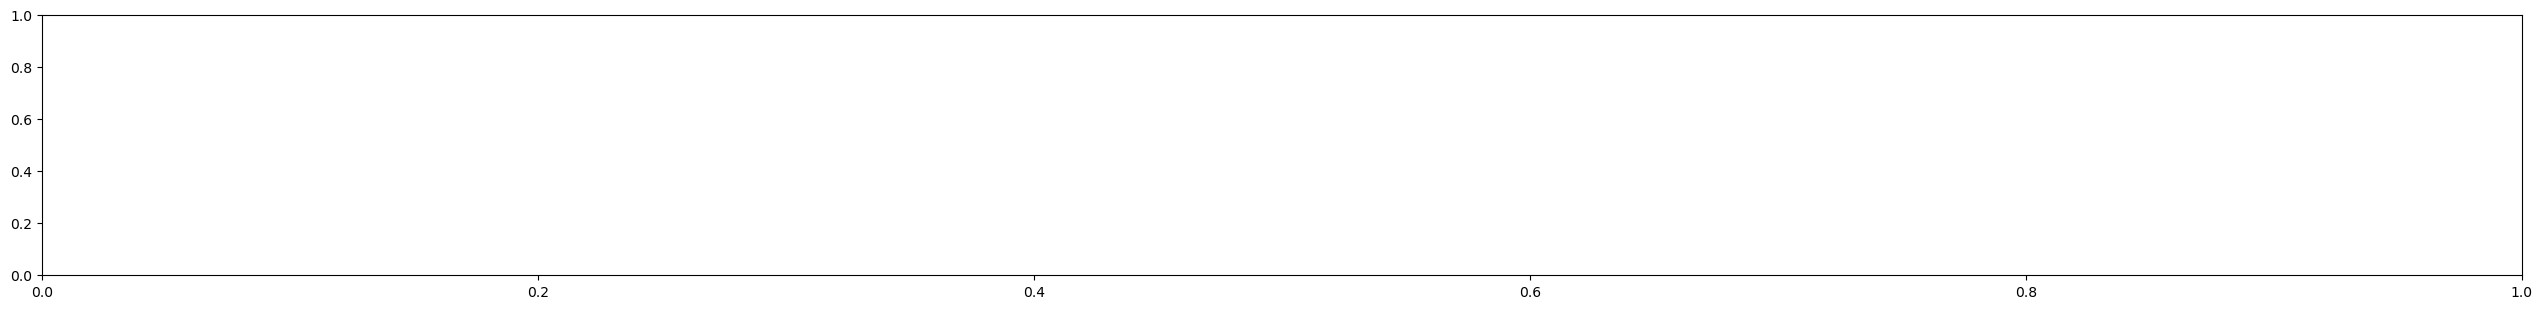

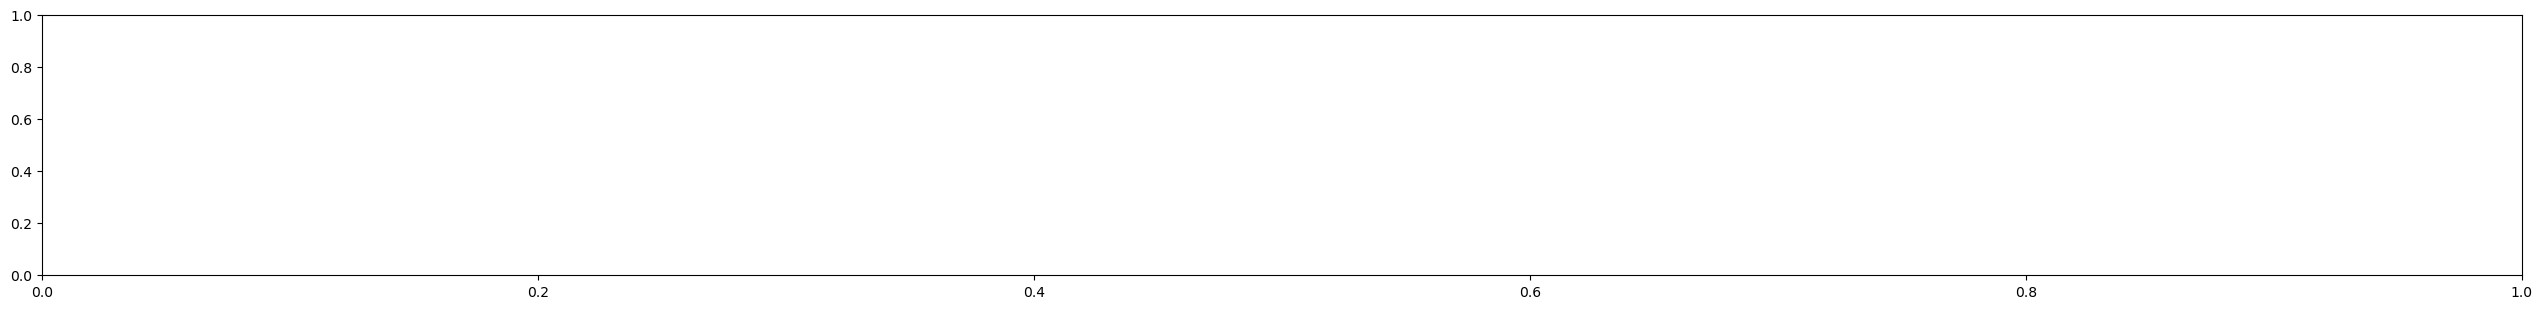

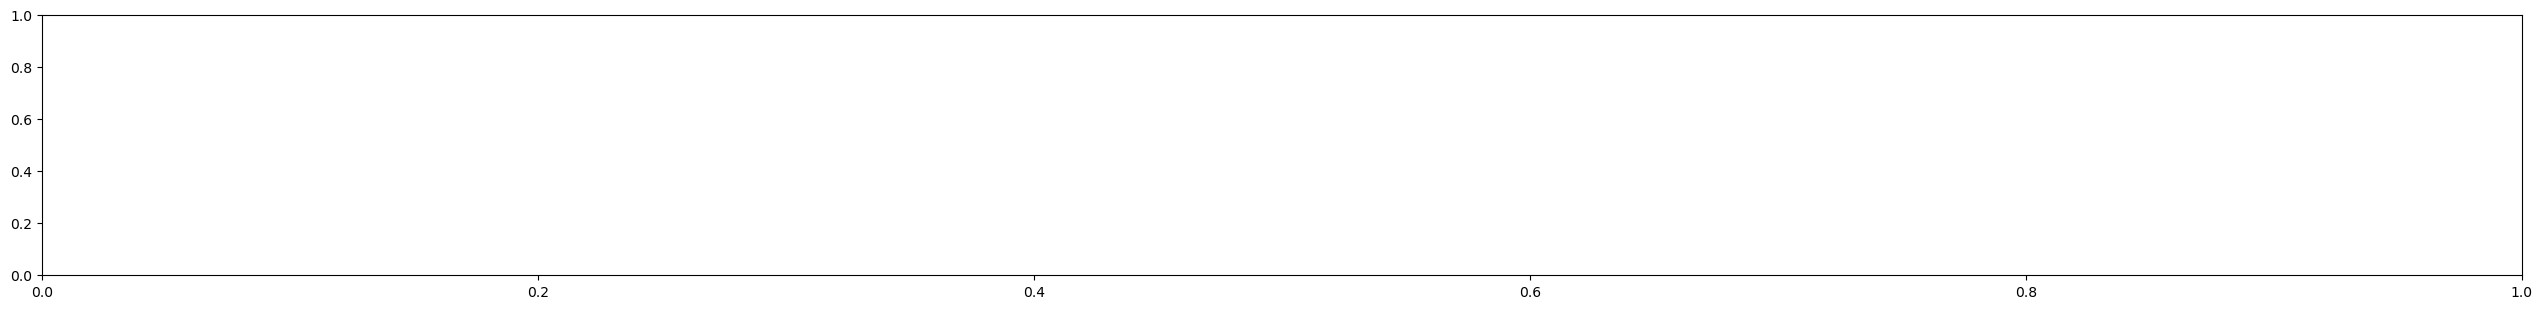

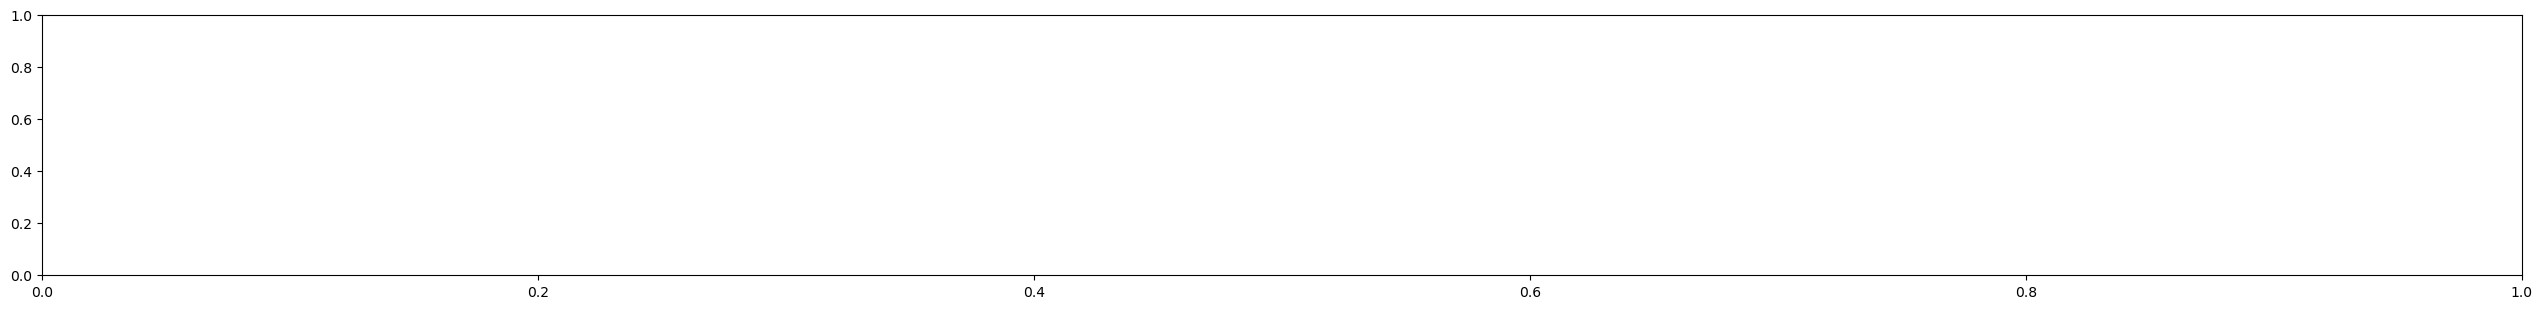

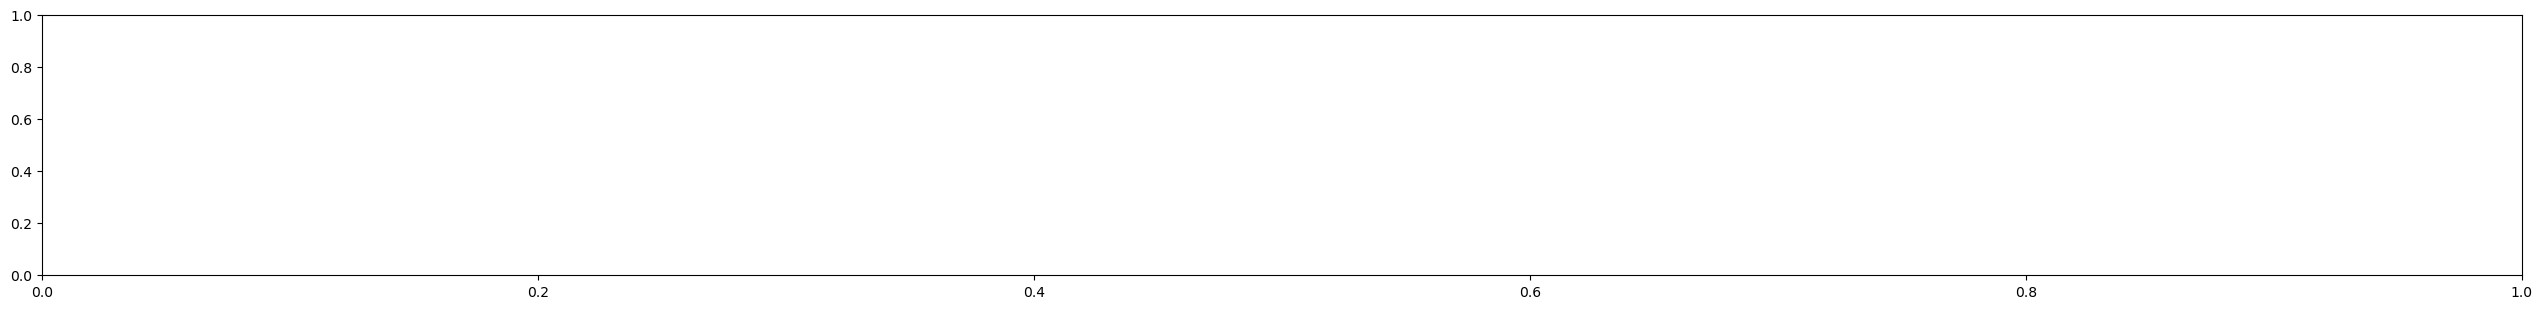

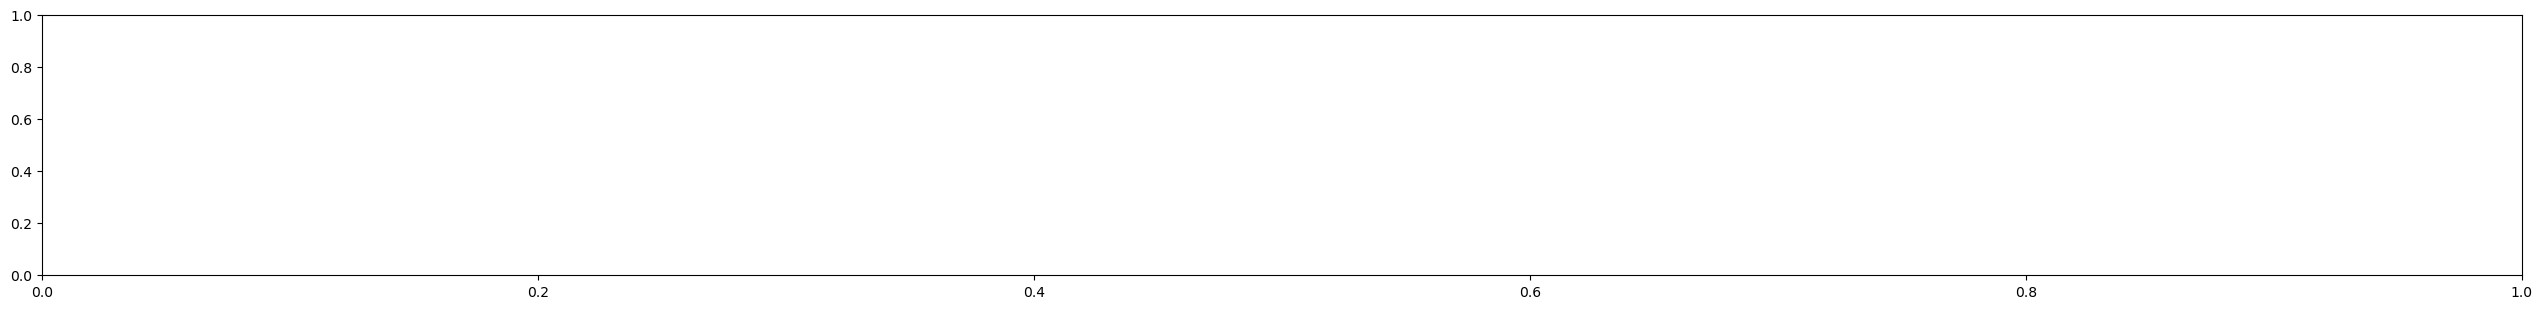

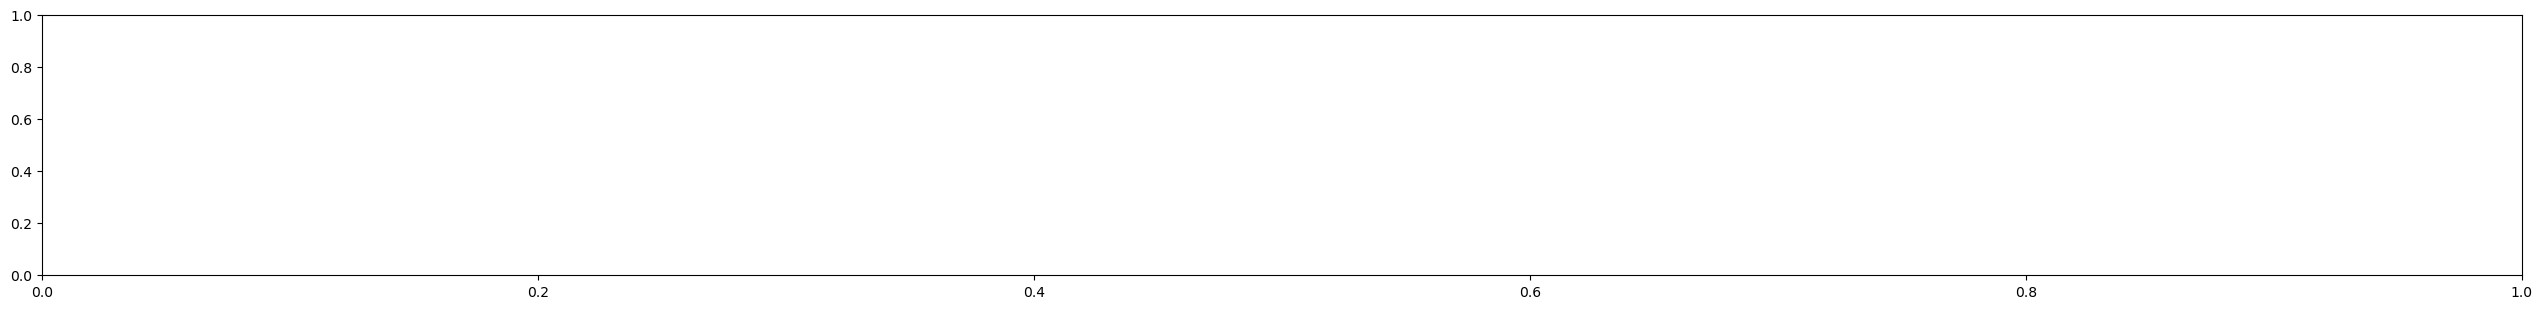

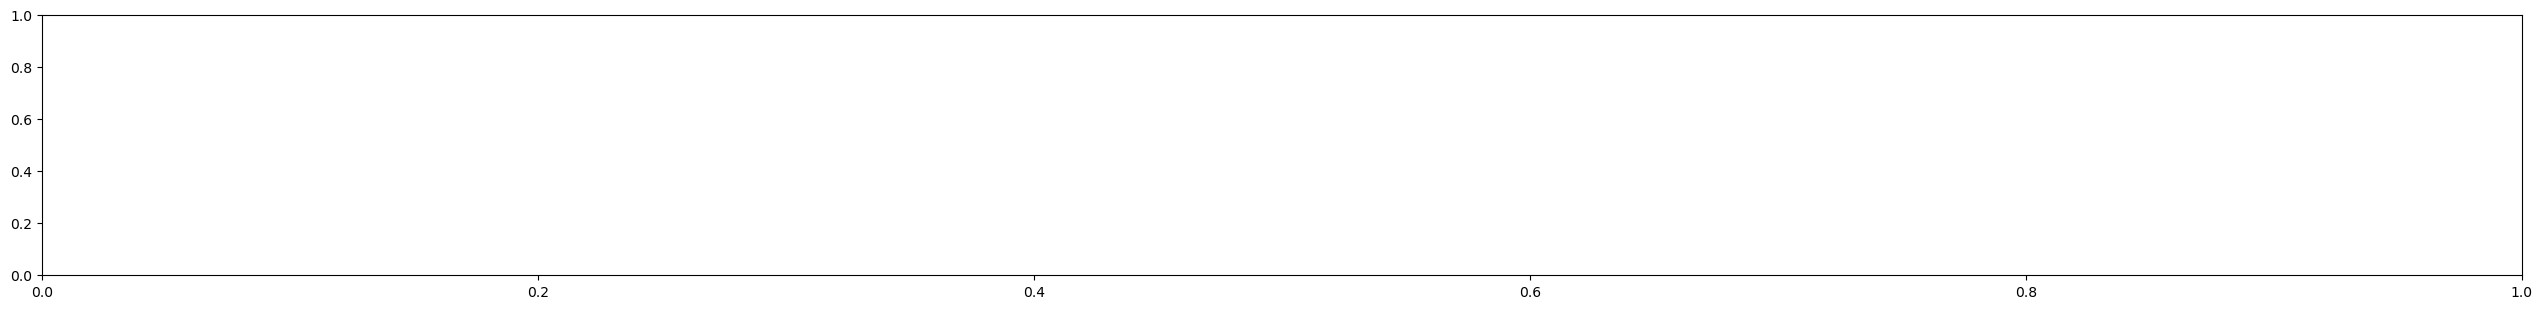

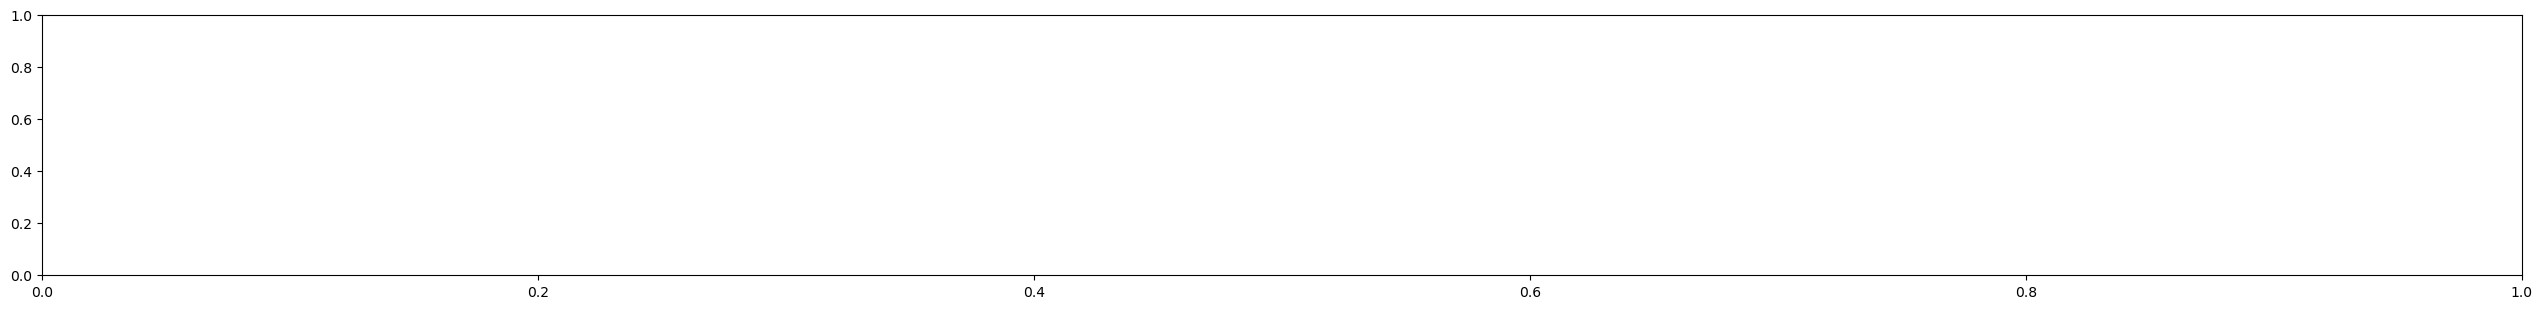

In [30]:
import gc
import matplotlib.pyplot as plt
import pandas as pd
import ast
import random
import matplotlib.dates as mdates
import os
from tqdm import tqdm

save_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\Figures\school_weekly_plots_v3"
os.makedirs(save_dir, exist_ok=True)

# --- Step 1. Expand visits_by_each_hour to hourly ---
def get_hourly_visits_in_a_row(row):
    start = pd.to_datetime(row['date_range_start'], errors='coerce')  # , utc=True
    end   = pd.to_datetime(row['date_range_end'], errors='coerce')
    hours = pd.date_range(start=start, end=end, freq='h', inclusive="left")
    visits = ast.literal_eval(row['visits_by_each_hour'])
    return pd.DataFrame({'hour_local': hours, 'visits': visits})

# --- Step 3. Plotting helper ---
def overlay_weekly_lines_v0(ax, df_weeks, hours_s, title, month=None, year=None):
    # if monthly: trim weekly lines to month boundaries
    if month is not None and year is not None:
        tz = getattr(hours_s.index, "tz", None)
        month_start = pd.Timestamp(year=year, month=month, day=1, tz=tz)
        month_end   = (month_start + pd.offsets.MonthEnd(1)) + pd.Timedelta(days=1)
    else:
        month_start, month_end = None, None
    
    for i, row in df_weeks.iterrows():  # each row is a week
        start = row['date_range_start']
        end   = row['date_range_end']
        # trim to month bounds if provided
        if month_start is not None:
            start = max(start, month_start)
            end   = min(end, month_end)
            # print(f"Trimmed week {i} to {start} - {end}")
            if start >= end:
                continue
        ax.hlines(
            y=row['raw_visitor_counts'],
            xmin=start,
            xmax=end,
            colors='tab:orange',
            linewidth=2,
            linestyle='--',
            label='raw_visitor_counts' if i == df_weeks.index[0] else ""
        )

    # plot hourly visits
    ax.plot(hours_s.index, hours_s.values, alpha=0.7, label='hourly visits', linewidth=0.9)  # , color='tab:orange'
    ax.set_title(title)
    ax.set_ylabel("count")
    ax.legend(loc="upper left")

    # add shaded region between 7AM and 4PM for each day
    if month is not None and year is not None:
        tz = getattr(hours_s.index, "tz", None)
        days = pd.date_range(start=month_start.normalize(),
                             end=month_end.normalize(),
                             freq='D',
                             tz=tz,
                             inclusive='left')
        for d in days:
            start = d + pd.Timedelta(hours=7)  # school hours: 7AM to 4PM
            end   = d + pd.Timedelta(hours=16)
            ax.axvspan(start, end, color='gray', alpha=0.2)  # translucent shading

            start = d + pd.Timedelta(hours=17)  # after school hours: 5PM to 9PM
            end   = d + pd.Timedelta(hours=21)
            ax.axvspan(start, end, color='blue', alpha=0.1)  # translucent shading

        # format x-axis for monthly panels: show only month-day
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
        for label in ax.get_xticklabels():
            label.set_rotation(0)

# --- Main loop ---
for placekey in tqdm(all_school_keys[:], total=len(all_school_keys)):  
    placekey = random.choice(all_school_keys)
    # placekey = 'zzw-222@5s7-27j-2x5'
    try:
        con.execute(f"""
            SELECT *
            FROM highschools
            WHERE placekey = '{placekey}'
        """)
        school_df = con.fetchdf()
        if school_df['raw_visitor_counts'].median() < 100:
            continue
        school_df['poi_cbg'] = school_df['poi_cbg'].str.replace(".0", "").str.zfill(12)
        school_name = school_df.iloc[0]['location_name']
        county_FIPS = school_df.iloc[0]['poi_cbg'][:5]

        try:
            State_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'STATE_NAME'].values[0]
        except IndexError:
            State_name = ""
            print("State name not found for STATEFP:", county_FIPS)

        try:
            county_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'COUNTY_NAME'].values[0]
        except IndexError:
            county_name = ""
            print("County name not found for COUNTYFP:", county_FIPS)

        school_df = school_df[school_df['visits_by_each_hour'].notna()].copy()
        school_df['date_range_start'] = pd.to_datetime(school_df['date_range_start'], errors='coerce')
        school_df['date_range_end']   = pd.to_datetime(school_df['date_range_end'], errors='coerce')

        # Keep only 2022
        school_df = school_df[school_df['date_range_start'].dt.year == 2022].copy()

        # Expand hourly visits
        hourly_dfs = school_df.apply(get_hourly_visits_in_a_row, axis=1).to_list()
        school_hourly_df = pd.concat(hourly_dfs, ignore_index=True)
        school_hourly_df = school_hourly_df[school_hourly_df['hour_local'].dt.year == 2022]

        # --- Step 4. Figure layout (12 rows × 1 col for months) ---
        fig = plt.figure(figsize=(32, 48))   # tall figure for 12 months
        gs = fig.add_gridspec(12, 1)         # 12 rows, 1 column

        # Monthly plots
        for m in range(1, 13):
            ax = fig.add_subplot(gs[m-1, 0])

            df_month = school_df[
                school_df['date_range_start'].dt.month == m
            ]
            hours_m  = school_hourly_df[
                school_hourly_df['hour_local'].dt.month == m
            ].set_index('hour_local')['visits']

            if df_month.empty and hours_m.empty:
                ax.set_title(f"Month {m} (no data)")
                ax.axis('off')
            else:
                overlay_weekly_lines(ax, df_month, hours_m, f"Month {m}", month=m, year=2022)
                
        fig.suptitle(f"Weekly Hourly Visits for {school_name} ({placekey}) in 2022\n{county_name} County, {State_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.98])  

        plt.savefig(os.path.join(save_dir, f"{State_name}_{county_name}_{school_name}_{placekey}.png"), dpi=150)
        
        plt.show()
        plt.clf()
        plt.close(fig)
        plt.close('all')

        # del school_df, school_hourly_df, hourly_dfs, fig, gs, ax
        gc.collect()
        break
        
    except Exception as e:
        print(f"Error processing placekey {placekey}: {e}")
        continue


In [ ]:
school_df[['date_range_start', 'date_range_end', 'raw_visitor_counts', 'visits_by_each_hour', 'raw_visit_counts']]

In [ ]:
# school_df[['date_range_start', 'date_range_end', 'raw_visitor_counts', 'visits_by_each_hour', 'raw_visit_counts']]

# select 2022 weeks only
school_hourly_df = school_hourly_df[school_hourly_df['date_range_start'].dt.year == 2022]
school_hourly_df = school_hourly_df[school_hourly_df['date_range_end'].dt.year == 2022]

date_range_starts = school_hourly_df['date_range_start'].unique()
date_range_ends   = school_hourly_df['date_range_end'].unique()

for start, end in zip(date_range_starts, date_range_ends):
    mask = (school_hourly_df['date_range_start'] == start) & (school_hourly_df['date_range_end'] == end)
    subset = school_hourly_df.loc[mask]# 
    noon_visits = subset[subset['hour_local'].dt.hour == 13]['visits']# .quantile(0.8)
    noon_visit_expected =  noon_visits.quantile(0.8, interpolation='nearest')
    print("----"    )
    print(f"Week {start} to {end}:")
    print(f"Noon visits: {noon_visits.tolist()}")
    print(f"Expected noon visits (80th percentile): {noon_visit_expected}")
    # print("\n")

school_hourly_df

In [ ]:
mask = (school_hourly_df['hour_local'].dt.hour >= 7) & (school_hourly_df['hour_local'].dt.hour <= 16)
school_hourly_df.loc[mask]


In [ ]:
# create a school hour range from 7AM to 6 PM 
school_hour_range = pd.timedelta_range(start='0 days 07:00:00', end='0 days 18:00:00'
                                 , freq='H')
print(school_hour_range)

school_hourly_df.set_index('hour_local').loc[school_hour_range]


In [ ]:
school_hour = pd.timedelta_range(start='0 days', periods=24, freq='H')
chool_hourly_df

In [ ]:
df_month[['date_range_start', 'date_range_end', 'raw_visitor_counts', 'visits_by_each_hour', 'raw_visit_counts']]
# hours_m

In [ ]:
# df_month.columns
school_hourly_df

In [ ]:
df_month[['date_range_start', 'date_range_end', 'raw_visitor_counts', 'visits_by_each_hour', 'raw_visit_counts']]